In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import glob
import math
import subprocess
from matplotlib import colormaps
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import seaborn as sns
import csv
import pandas as pd
from scipy.optimize import curve_fit
from math import prod

import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import dewpoint_from_relative_humidity
#from metpy.io import get_test_data

import sys, os
import requests
import pyart

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

#%matplotlib notebook

plt.style.use('default')


#import dask
#from dask.distributed import Client, progress, wait
#dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
#client = Client()
#client

#dask.config.set(scheduler='threads', num_workers=2)

from dask.distributed import Client
import dask

# Dashboard config for JupyterHub (optional)
dask.config.config.get('distributed').get('dashboard').update({
    'link': '{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'
})

# Start Dask client with controlled resources
client = Client(n_workers=4, threads_per_worker=2, memory_limit='12GB') # This will use 4*2=8 CPU threads
#client



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



2025-11-19 11:58:59,130 - distributed.nanny - WARNING - Restarting worker
2025-11-19 12:01:12,315 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44949' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('open_dataset-z_mc-d73812c992a94b26c1c62bbba98a2ffd', 0, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 25, 6, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 29, 1, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 21, 4, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 29, 5, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 21, 6, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 29, 3, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 25, 1, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 25, 5, 0), ('open_dataset-z_mc-4bef43802065e4dcfb48b695cf7f4883', 0, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 21, 1, 0), ('mean_chunk-ff563e656e192882abefd6ef41af50e6', 25, 3, 0), ('mean_chunk-ff563e656

In [2]:
print(dir(scipy.integrate))

NameError: name 'scipy' is not defined

In [ ]:
## ORCESTRA 3 Sept 2024 domain

lon1 = [np.rad2deg(-1.907365), np.rad2deg(-1.478035)];
lat1 = [np.rad2deg(0.3955399), np.rad2deg(0.8262644)];

lon2 = [np.rad2deg(-1.835135), np.rad2deg(-1.550694)];
lat2 = [np.rad2deg(0.4688762), np.rad2deg(0.7529294)];

lon3 = [np.rad2deg(-1.781484), np.rad2deg(-1.604435)];
lat3 = [np.rad2deg(0.522396), np.rad2deg(0.6993479)];

lon4 = [np.rad2deg(-1.728496), np.rad2deg(-1.657436)];
lat4 = [np.rad2deg(0.5753464), np.rad2deg(0.6463881)];

#lon2 = [-22., -38.];
#lat2 = [-0., 17.];

#lon3 = [-25., -35.];
#lat3 = [4, 14.];

#lon4 = [-28., -32.];
#lat4 = [7., 11.];

print(np.min(lon1), np.max(lon1))
print(np.min(lat1), np.max(lat1))

fontsize = 12

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and features for context
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


ax.plot([lon1[0], lon1[1], lon1[1], lon1[0], lon1[0]], 
        [lat1[0], lat1[0], lat1[1], lat1[1], lat1[0]], 
        color='black', linewidth=2, linestyle='-', transform=ccrs.PlateCarree())

ax.plot([lon2[0], lon2[1], lon2[1], lon2[0], lon2[0]], 
        [lat2[0], lat2[0], lat2[1], lat2[1], lat2[0]], 
        color='black', linewidth=2, linestyle='-.', transform=ccrs.PlateCarree())

ax.plot([lon3[0], lon3[1], lon3[1], lon3[0], lon3[0]], 
        [lat3[0], lat3[0], lat3[1], lat3[1], lat3[0]], 
        color='black', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())

ax.plot([lon4[0], lon4[1], lon4[1], lon4[0], lon4[0]], 
        [lat4[0], lat4[0], lat4[1], lat4[1], lat4[0]], 
        color='black', linewidth=2, linestyle=':', transform=ccrs.PlateCarree())

ax.text(-97., 47.5, "R3B7 [D-1]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-97., 43.5, "R3B8 [D-2]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-97., 40.5, "R3B9 [D-3]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-97., 37.5, "R3B10 [D-4]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')

ax.set_xlim(-115., -80.)
ax.set_ylim(20., 50.)
ax.set_xticks(range(-115, -80, 5))  
ax.set_yticks(range(20, 50, 5))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_xlabel("Longitude (°W)", fontsize=fontsize)
ax.set_ylabel("Latitude (°N)", fontsize=fontsize)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')
ax.set_title('MC3E simulation domain', fontsize=fontsize)#, fontweight='bold')

# Add oceans and continents features
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
#ax.text(-30, 26, "Atlantic Ocean", transform=ccrs.PlateCarree(), fontsize=24, fontweight='bold', ha='center', color='blue')
#ax.text(-14, 14, "Senegal", transform=ccrs.PlateCarree(), fontsize=14, fontweight='bold', ha='center', color='blue')
#ax.text(-46, -8, "Brazil", transform=ccrs.PlateCarree(), fontsize=18, fontweight='bold', ha='center', color='blue')

plt.show()

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Define bounding boxes (in degrees)
lon1 = [np.rad2deg(-1.907365), np.rad2deg(-1.478035)];
lat1 = [np.rad2deg(0.3955399), np.rad2deg(0.8262644)];

lon2 = [np.rad2deg(-1.835135), np.rad2deg(-1.550694)];
lat2 = [np.rad2deg(0.4688762), np.rad2deg(0.7529294)];

lon3 = [np.rad2deg(-1.781484), np.rad2deg(-1.604435)];
lat3 = [np.rad2deg(0.522396), np.rad2deg(0.6993479)];

lon4 = [np.rad2deg(-1.728496), np.rad2deg(-1.657436)];
lat4 = [np.rad2deg(0.5753464), np.rad2deg(0.6463881)];

#lon1[0] = -1*lon1[0]
#lon1[1] = -1*lon1[1]

#lon2[0] = -1*lon2[0]
#lon2[1] = -1*lon2[1]

#lon3[0] = -1*lon3[0]
#lon3[1] = -1*lon3[1]

#lon4[0] = -1*lon4[0]
#lon4[1] = -1*lon4[1]

#print(lon1, lat1)
#print(lon2, lat2)
#print(lon3, lat3)
#print(lon4, lat4)

fontsize = 12
fnt = 12;

proj = ccrs.PlateCarree()

plt.style.use('default')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Plot base map
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Plot bounding boxes
for lon, lat, style in zip(
    [lon1, lon2, lon3, lon4],
    [lat1, lat2, lat3, lat4],
    ['-', '-.', '--', ':']
):
    ax.plot([lon[0], lon[1], lon[1], lon[0], lon[0]],
            [lat[0], lat[0], lat[1], lat[1], lat[0]],
            color='black', linewidth=1.5, linestyle=style, transform=proj)


# Labels
ax.text(-100., 47.5, "R3B7 [D-1]", transform=proj, fontsize=fontsize)
ax.text(-100., 43.5, "R3B8 [D-2]", transform=proj, fontsize=fontsize)
ax.text(-100., 40.4, "R3B9 [D-3]", transform=proj, fontsize=fontsize)
ax.text(-100., 37.4, "R3B10 [D-4]", transform=proj, fontsize=fontsize)

# Map limits
ax.set_xlim(-115., -80.)
ax.set_ylim(20., 50.)
ax.set_xticks(range(-115, -80, 5))  
ax.set_yticks(range(20, 50, 5))

xticks = range(-115, -79, 5)  # x-ticks from -50 to -10 with step 5
yticks = range(20, 50, 5)  # y-ticks from -10 to 30 with step 5

xtick_labels = [f"{abs(x)}°W" if x < 0 else f"{x}°E" for x in xticks]
ytick_labels = [f"{abs(y)}°N" if y >= 0 else f"{abs(y)}°S" for y in yticks]


ax.tick_params(axis='x', labelsize=fnt)
ax.tick_params(axis='y', labelsize=fnt)
ax.set_xticklabels(xtick_labels[:-1], fontsize=fnt)
ax.set_yticklabels(ytick_labels, fontsize=fnt)

ax.tick_params(axis='both', labelsize=fontsize+4)
ax.set_xlabel("Longitude", fontsize=fontsize+4)
ax.set_ylabel("Latitude", fontsize=fontsize+4)
ax.set_title('MC3E simulation domain', fontsize=fontsize+4)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')


plt.show()


In [5]:

#ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/nosip/mc3e_2mom_nosip/NWP_*20110511*.nc');
#ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/control/mc3e_2mom_sip/NWP_*2011051*.nc');


file_path='/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/sull_ds'
ds_nosip = xr.open_mfdataset(f'{file_path}/nosip/mc3e_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_4sip = xr.open_mfdataset(f'{file_path}/4sip/mc3e_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);


/home/b/b382718/own_env/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'earthkit' loading failed:
unsupported operand type(s) for |: 'type' and 'types.GenericAlias'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [6]:

#file_path='/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat'
#ds_4sip_int_ccn = xr.open_mfdataset(f'{file_path}/ds_check_new_start_time/mc3e_2mom_sip/NWP_*20110511*.nc');
#ds_nosip_int_ccn = xr.open_mfdataset(f'{file_path}/new_start_time_nosip/mc3e_2mom_sip/NWP_*20110511*.nc');
#ds_sullds_int_ccn = xr.open_mfdataset(f'{file_path}/new_start_time_sull18_ds/mc3e_2mom_sip/NWP_*20110511*.nc');


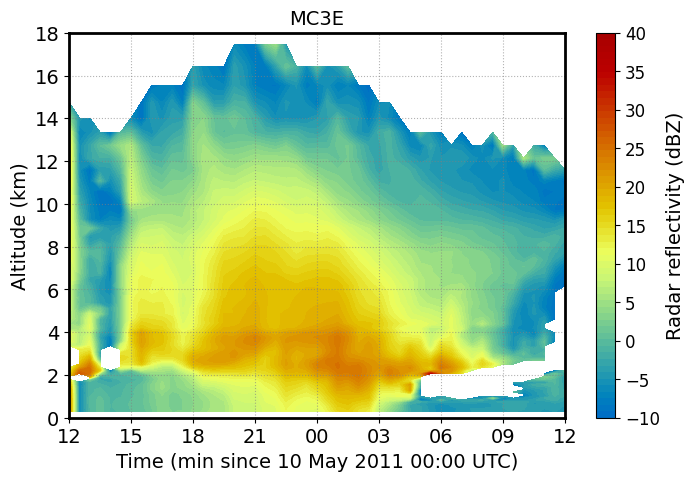

In [8]:

from matplotlib.colors import ListedColormap

avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = ds_4sip.dbz.where(ds_4sip.dbz > -10).mean(dim=('ncells'))

colors = ['cyan', 'deepskyblue', 'mediumblue', 'lawngreen', 'limegreen', 'green', 'yellow', 'gold', 'goldenrod', 
          'coral', 'orangered', 'red', 'lightcoral', 'magenta', 'darkorchid', 'pink']
cmap = ListedColormap(colors)

lnwdth = 3
fontsize = 14
lev = np.linspace(-10, 40, 60)

plt.figure(figsize=(8, 5))
plt.style.use('default')
#contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='HomeyerRainbow', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)

colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 10 May 2011 00:00 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 10, 0, 0) 
end_date = datetime(2011, 5, 12, 12, 0)# Format to show only hours

plt.xticks(fontsize=fontsize)
plt.ylim([0, 18])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E', fontsize=fontsize)

plt.grid(True, linestyle=':', color='grey', alpha=0.6)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')
    
plt.show()

In [14]:

print(ds_kazr_obs.lon.min().values, ds_kazr_obs.lat.min().values)
print(ds_kazr_obs.lon.max().values, ds_kazr_obs.lat.max().values)

-97.485 36.605
-97.485 36.605


36.605


malloc(): invalid size (unsorted)


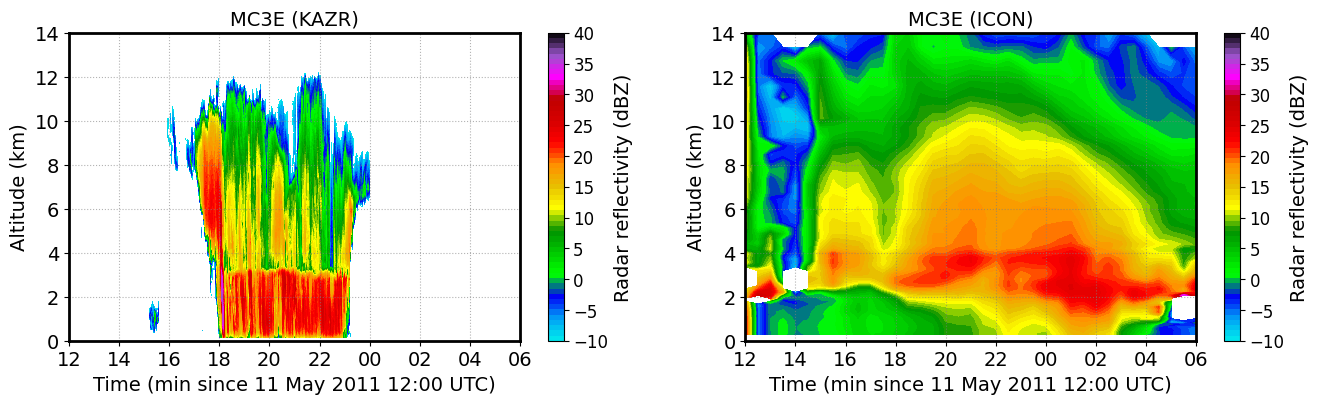

In [9]:

avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = ds_4sip.dbz.where(ds_4sip.dbz > -10).mean(dim=('ncells'))

# ARM KAZR (Ka-band ARM Zenith Radar) data, and it's a vertically pointing radar, 
# the range values effectively represent height above the radar

file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

print(ds_kazr_obs.lat.max().values)
ds_kazr_obs


lnwdth = 3
fontsize = 14
lev = np.linspace(-10, 40, 60)

plt.figure(figsize=(16, 4))
plt.style.use('default')

plt.subplot(1,2,1)
contour = plt.contourf(ds_kazr_obs.time, 1.e-3*ds_kazr_obs.range, ds_kazr_obs.reflectivity_copol.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 12:00 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 12, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E (KAZR)', fontsize=fontsize)

plt.grid(True, linestyle=':', color='grey', alpha=0.6)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')
    
plt.subplot(1,2,2)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 16 UTC)', fontsize=fontsize)
plt.xlabel('Time (min since 11 May 2011 12:00 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 12, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E (ICON)', fontsize=fontsize)

plt.grid(True, linestyle=':', color='grey', alpha=0.6)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')
    
plt.show()


In [42]:
ds_kazr_obs.lon.min().values

array(-97.485, dtype=float32)

36.605


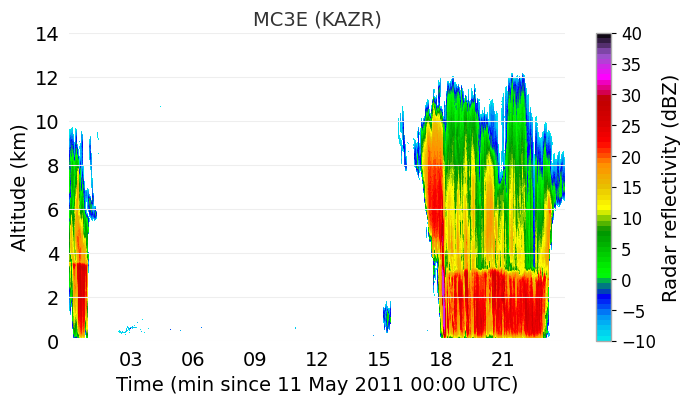

In [32]:
# ARM KAZR (Ka-band ARM Zenith Radar) data, and it's a vertically pointing radar, 
# the range values effectively represent height above the radar

file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

print(ds_kazr_obs.lat.max().values)
ds_kazr_obs


lnwdth = 3
fontsize = 14
lev = np.linspace(-10, 40, 60)

plt.figure(figsize=(8, 4))
plt.style.use('default')

contour = plt.contourf(ds_kazr_obs.time, 1.e-3*ds_kazr_obs.range, ds_kazr_obs.reflectivity_copol.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 00:00 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 0, 0) 
end_date = datetime(2011, 5, 12, 4, 0)# Format to show only hours

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E (KAZR)', fontsize=fontsize)
plt.show()


In [ ]:

avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = ds_4sip.dbz.where(ds_4sip.dbz > -10).mean(dim=('ncells'))

# ARM KAZR (Ka-band ARM Zenith Radar) data, and it's a vertically pointing radar, 
# the range values effectively represent height above the radar

file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

print(ds_kazr_obs.lat.max().values)
ds_kazr_obs


lnwdth = 3
fontsize = 14
lev = np.linspace(-10, 40, 60)

plt.figure(figsize=(16, 4))
plt.style.use('default')

plt.subplot(1,2,1)
contour = plt.contourf(ds_kazr_obs.time, 1.e-3*ds_kazr_obs.range, ds_kazr_obs.reflectivity_copol.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 16 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 16, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E (KAZR)', fontsize=fontsize)

plt.subplot(1,2,2)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 16 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 16, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E (ICON)', fontsize=fontsize)
plt.show()
plt.show()

In [68]:

# Convert target coordinates to radians
#target_lon_rad = np.deg2rad(-97.485)
#target_lat_rad = np.deg2rad(36.60)

#target_lon_rad = np.deg2rad(-97.2)
#target_lat_rad = np.deg2rad(36.3)

target_lon_rad = np.deg2rad(-97.2)
target_lat_rad = np.deg2rad(36.4)

# Extract lon/lat arrays (no parentheses!)
clon = ds_4sip.clon.values
clat = ds_4sip.clat.values

# Define a tolerance (in radians, e.g., ~0.01 rad ≈ 60 km)
tolerance = 0.01

# Find closest cells within the tolerance
distance = np.sqrt((clon - target_lon_rad)**2 + (clat - target_lat_rad)**2)
selected_cells = np.where(distance < tolerance)[0]

print(distance)
# Extract dbz for those cells
dbz_section = ds_4sip['dbz'][:, :, selected_cells]


avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = dbz_section.where(dbz_section > 0).mean(dim=('ncells'))


[0.06220021 0.06194012 0.06182689 ... 0.03705199 0.03703578 0.036814  ]


36.605


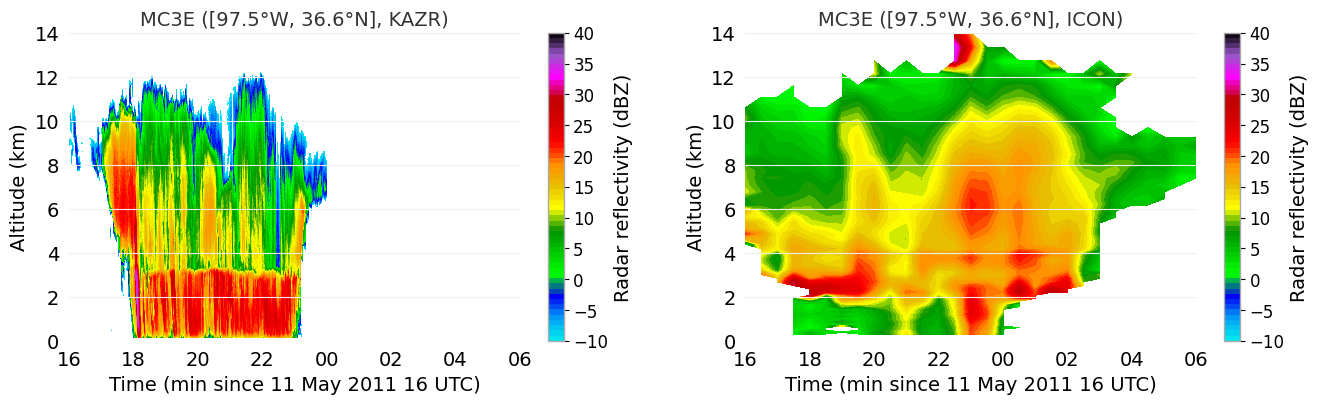

In [69]:

# ARM KAZR (Ka-band ARM Zenith Radar) data, and it's a vertically pointing radar, 
# the range values effectively represent height above the radar

file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

print(ds_kazr_obs.lat.max().values)
ds_kazr_obs


lnwdth = 3
fontsize = 14
lev = np.linspace(-10, 40, 60)

plt.figure(figsize=(16, 4))
plt.style.use('default')

plt.subplot(1,2,1)
contour = plt.contourf(ds_kazr_obs.time, 1.e-3*ds_kazr_obs.range, ds_kazr_obs.reflectivity_copol.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 16 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 16, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E ([97.5°W, 36.6°N], KAZR)', fontsize=fontsize)

plt.subplot(1,2,2)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)
plt.xlabel('Time (min since 11 May 2011 16 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 16, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('MC3E ([97.5°W, 36.6°N], ICON)', fontsize=fontsize)
plt.show()


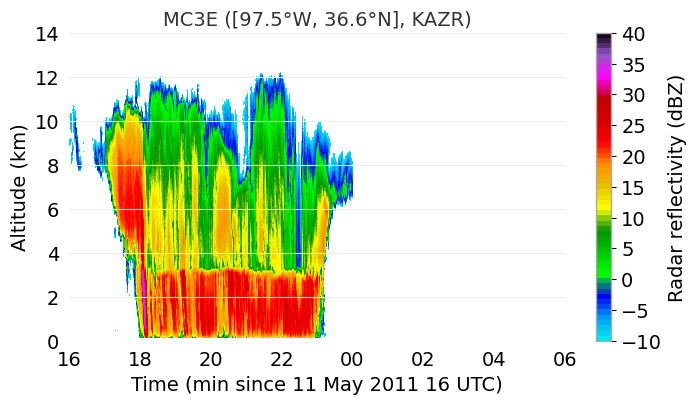

In [10]:
ln = 3
fnt = 14
lev = np.linspace(-10, 40, 60)

#plt.figure(figsize=(16, 4))
plt.figure(figsize=(8, 4))
plt.style.use('default')

#plt.subplot(1,2,1)
contour = plt.contourf(ds_kazr_obs.time, 1.e-3*ds_kazr_obs.range, ds_kazr_obs.reflectivity_copol.T, cmap='pyart_NWSRef', levels=lev)
colorbar = plt.colorbar(contour, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=fnt)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fnt)
plt.xlabel('Time (min since 11 May 2011 16 UTC)', fontsize=fnt)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 16, 0) 
end_date = datetime(2011, 5, 12, 6, 0)# Format to show only hours
plt.xlim(start_date, end_date)

plt.xticks(fontsize=fnt)
plt.ylim([0, 14])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=fnt)
plt.ylabel('Altitude (km)', fontsize=fnt)
plt.title('MC3E ([97.5°W, 36.6°N], KAZR)', fontsize=fnt)

#plt.subplot(1,2,2)
plt.show()


In [14]:
print(refl_flat.shape, alt_flat.shape) 

(13563880,) (580,)


In [3]:

ds_4sip_no_rad_coupl = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/no_rad_phy_coupling/mc3e_2mom_sip/NWP_*20110511*.nc');


In [2]:

file_path='/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/sull_ds'
grid_mc3e = xr.open_dataset(f'{file_path}/4sip/mc3e_2mom/domain4_DOM04.nc');

clon_deg = np.degrees(grid_mc3e.clon)
clat_deg = np.degrees(grid_mc3e.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-98., 37.])
#print(okla_x), print(okla_y)
dx_deg = 1.; dy_deg = 1.
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)

window_cell = (
    (grid_mc3e.clat >= np.deg2rad(bottom_bound))
    & (grid_mc3e.clat <= np.deg2rad(top_bound))
    & (grid_mc3e.clon >= np.deg2rad(left_bound))
    & (grid_mc3e.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_mc3e.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_mc3e.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid



new_grid_mc3e = reindex_grid(grid_mc3e, selected_indices, vars_to_renumber)

mask=np.isin(ds_4sip['ncells'], selected_indices.cell)
mask_cells_mc3e = mask


-99.03552665544457
-94.96409774195314
32.964920475901934
37.03531286609763
-99.0
-97.0
38.0
36.0
window_vertex_indices :: [    3     6    16 ... 27924 27928 27933]
window_edge_indices :: [   12    13    14 ... 79031 79032 79033]


NameError: name 'ds_4sip' is not defined

In [10]:

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['tq'] = ds_4sip.qc+ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl

ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['tq'] = ds_nosip.qc+ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

ht_4sip_avg = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
tempc_4sip_avg = ds_4sip.tempc.mean(dim=('time','ncells'))

ht_nosip_avg = 1.e-3*ds_nosip.z_mc.mean(dim=('time','ncells'))
tempc_nosip_avg = ds_nosip.tempc.mean(dim=('time','ncells'))

In [4]:

ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['tq'] = ds_nosip.qc+ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

In [7]:

ds_4sip_no_rad_coupl['w_vel'] = -1.*ds_4sip_no_rad_coupl.omega/(9.8*ds_4sip_no_rad_coupl.rho)
ds_4sip_no_rad_coupl['tempc'] = ds_4sip_no_rad_coupl.temp-273.16;
ds_4sip_no_rad_coupl['lwc_gperm3']  = ds_4sip_no_rad_coupl.qc*ds_4sip_no_rad_coupl.rho*1.e3 # kgperm3 to gperm3
ds_4sip_no_rad_coupl['tqi'] = ds_4sip_no_rad_coupl.qi+ds_4sip_no_rad_coupl.qs+ds_4sip_no_rad_coupl.qg+ds_4sip_no_rad_coupl.qh
ds_4sip_no_rad_coupl['tq'] = ds_4sip_no_rad_coupl.qc+ds_4sip_no_rad_coupl.qi+ds_4sip_no_rad_coupl.qs+ds_4sip_no_rad_coupl.qg+ds_4sip_no_rad_coupl.qh
ds_4sip_no_rad_coupl['ciwc_gperm3'] = ds_4sip_no_rad_coupl.qi*ds_4sip_no_rad_coupl.rho*1.e3 # kgperm3 to gperm3
ds_4sip_no_rad_coupl['tiwc_gperm3'] = (ds_4sip_no_rad_coupl.qi+ds_4sip_no_rad_coupl.qs+ds_4sip_no_rad_coupl.qg+ds_4sip_no_rad_coupl.qh)*ds_4sip_no_rad_coupl.rho*1.e3 # kgperm3 to gperm3
ds_4sip_no_rad_coupl['cdnc_percm3'] = ds_4sip_no_rad_coupl.qnc*ds_4sip_no_rad_coupl.rho*1.e-6  # perkg to percm3
ds_4sip_no_rad_coupl['inc_perl'] = (ds_4sip_no_rad_coupl.qni+ds_4sip_no_rad_coupl.qns+ds_4sip_no_rad_coupl.qng+ds_4sip_no_rad_coupl.qnh)*ds_4sip_no_rad_coupl.rho*1.e-3 # perkg to perl


In [25]:
ds_4sip.time

<xarray.DataArray 'time' (time: 48)>
array(['2011-05-11T00:00:00.000000000', '2011-05-11T00:30:00.000000000',
       '2011-05-11T01:00:00.000000000', '2011-05-11T01:30:00.000000000',
       '2011-05-11T02:00:00.000000000', '2011-05-11T02:30:00.000000000',
       '2011-05-11T03:00:00.000000000', '2011-05-11T03:30:00.000000000',
       '2011-05-11T04:00:00.000000000', '2011-05-11T04:30:00.000000000',
       '2011-05-11T05:00:00.000000000', '2011-05-11T05:30:00.000000000',
       '2011-05-11T06:00:00.000000000', '2011-05-11T06:30:00.000000000',
       '2011-05-11T07:00:00.000000000', '2011-05-11T07:30:00.000000000',
       '2011-05-11T08:00:00.000000000', '2011-05-11T08:30:00.000000000',
       '2011-05-11T09:00:00.000000000', '2011-05-11T09:30:00.000000000',
       '2011-05-11T10:00:00.000000000', '2011-05-11T10:30:00.000000000',
       '2011-05-11T11:00:00.000000000', '2011-05-11T11:30:00.000000000',
       '2011-05-11T12:00:00.000000000', '2011-05-11T12:30:00.000000000',
       '2011-05-11T13:00:00.000000000', '2011-05-11T13:30:00.000000000',
       '2011-05-11T14:00:00.000000000', '2011-05-11T14:30:00.000000000',
       '2011-05-11T15:00:00.000000000', '2011-05-11T15:30:00.000000000',
       '2011-05-11T16:00:00.000000000', '2011-05-11T16:30:00.000000000',
       '2011-05-11T17:00:00.000000000', '2011-05-11T17:30:00.000000000',
       '2011-05-11T18:00:00.000000000', '2011-05-11T18:30:00.000000000',
       '2011-05-11T19:00:00.000000000', '2011-05-11T19:30:00.000000000',
       '2011-05-11T20:00:00.000000000', '2011-05-11T20:30:00.000000000',
       '2011-05-11T21:00:00.000000000', '2011-05-11T21:30:00.000000000',
       '2011-05-11T22:00:00.000000000', '2011-05-11T22:30:00.000000000',
       '2011-05-11T23:00:00.000000000', '2011-05-11T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-05-11 ... 2011-05-11T23:30:00
Attributes:
    standard_name:  time
    axis:           T

## CFAD of ICON and KAZR

In [20]:
ds_kazr_obs

<xarray.Dataset> Size: 760MB
Dimensions:                         (time: 23386, range: 580)
Coordinates:
  * time                            (time) datetime64[ns] 187kB 2011-05-11T00...
  * range                           (range) float32 2kB 160.6 ... 1.752e+04
Data variables: (12/20)
    base_time                       datetime64[ns] 8B ...
    time_offset                     (time) datetime64[ns] 187kB dask.array<chunksize=(23386,), meta=np.ndarray>
    reflectivity_copol              (time, range) float32 54MB dask.array<chunksize=(23386, 580), meta=np.ndarray>
    qc_reflectivity_copol           (time, range) int32 54MB dask.array<chunksize=(23386, 580), meta=np.ndarray>
    reflectivity_xpol               (time, range) float32 54MB dask.array<chunksize=(23386, 580), meta=np.ndarray>
    qc_reflectivity_xpol            (time, range) int32 54MB dask.array<chunksize=(23386, 580), meta=np.ndarray>
    ...                              ...
    signal_to_noise_ratio_copol     (time, range) float32 54MB dask.array<chunksize=(23386, 580), meta=np.ndarray>
    signal_to_noise_ratio_xpol      (time, range) float32 54MB dask.array<chunksize=(23386, 580), meta=np.ndarray>
    rx_noise                        (time) float32 94kB dask.array<chunksize=(23386,), meta=np.ndarray>
    lat                             float32 4B ...
    lon                             float32 4B ...
    alt                             float32 4B ...
Attributes: (12/53)
    command_line:                               kazrcal_vap -s sgp -f C1 -b 2...
    process_version:                            vap-kazrcal-1.3-0.el6
    dod_version:                                kazrge-b1-2.1
    location_description:                       Southern Great Plains (SGP), ...
    site_id:                                    sgp
    facility_id:                                C1
    ...                                         ...
    qc_bit_2_assessment:                        Bad
    qc_bit_3_description:                       Value is greater than the val...
    qc_bit_3_assessment:                        Bad
    qc_bit_4_description:                       Difference between current an...
    qc_bit_4_assessment:                        Indeterminate
    history:                                    created by user ydi on machin...

In [9]:

################## KAZR #################
file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

filt_refl_obs = xr.where(ds_kazr_obs.reflectivity_copol > -10., ds_kazr_obs.reflectivity_copol, np.nan)
alt_km = 1.e-3*ds_kazr_obs.range

# Altitude and refl_obs are not the same dimension, so,
alt_2d = np.broadcast_to(alt_km.values, filt_refl_obs.shape)

# 3. Flatten both arrays to 1D for histogramming
refl_flat = filt_refl_obs.values.flatten()
alt_flat = alt_2d.flatten()

# 4. Filter out NaNs and physically unrealistic values
mask = (~np.isnan(refl_flat)) & (~np.isnan(alt_flat)) & (refl_flat > -10) & (alt_flat >= 0)
refl_flat = refl_flat[mask]
alt_flat = alt_flat[mask]

# 5. Define bins
#dbz_bins = np.arange(-10, 81, 3)   # dBZ bins from -10 to 80 in 1 dBZ steps
#alt_bins = np.arange(0., 20.1, 1.0) # Altitude bins from 0 to 15 km in 0.1 km steps

dbz_bins = np.linspace(-10, 81, 25)   # dBZ bins from -10 to 80 in 1 dBZ steps
alt_bins = np.linspace(0, 16.1, 25) # Altitude bins from 0 to 15 km in 0.1 km steps

# 6. 2D Histogram (CFAD)
cfad, xedges, yedges = np.histogram2d(refl_flat, alt_flat, bins=[dbz_bins, alt_bins])
################## End KAZR #############

med_refl_obs = filt_refl_obs.median('time')
mean_alt_km_obs = 1.e-3*ds_kazr_obs.range


In [15]:

print(ds_kazr_obs.lon.min().values,ds_kazr_obs.lat.min().values)
print(ds_kazr_obs.lon.max().values,ds_kazr_obs.lat.max().values)

-97.485 36.605
-97.485 36.605


In [5]:

file_path='/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/sull_ds'
grid_mc3e = xr.open_dataset(f'{file_path}/4sip/mc3e_2mom/domain4_DOM04.nc');

clon_deg = np.degrees(grid_mc3e.clon)
clat_deg = np.degrees(grid_mc3e.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

########################################################
## Get coordinates corresponding to the KAZR location ##
########################################################

okla_x, okla_y = np.array([-97.5, 36.6])
okla_x, okla_y = np.array([-97.5, 36.6])
#print(okla_x), print(okla_y)
dx_deg = 0.5; dy_deg = 0.5
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_mc3e.clat >= np.deg2rad(bottom_bound))
    & (grid_mc3e.clat <= np.deg2rad(top_bound))
    & (grid_mc3e.clon >= np.deg2rad(left_bound))
    & (grid_mc3e.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_mc3e.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
#print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_mc3e.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
#print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)


vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_mc3e = reindex_grid(grid_mc3e, selected_indices, vars_to_renumber)

mask_ncells_mc3e=np.isin(ds_4sip['ncells'], selected_indices.cell)


-99.03552665544457
-94.96409774195314
32.964920475901934
37.03531286609763
-98.0
-97.0
37.1
36.1


In [11]:

################## ICON #################
#ds_4sip1 = ds_4sip.copy(deep=True)
ds_filt = ds_4sip.sel(ncells=mask_ncells_mc3e, time=slice('2011-05-11T17:00:00.000000000','2011-05-12T00:00:00.000000000'))
filt_refl_4sip = xr.where(ds_filt.dbz > -10., ds_filt.dbz, np.nan);
alt_4sip_km = 1.e-3*ds_filt.z_mc

# 3. Flatten both arrays to 1D for histogramming
refl_4sip_flat = filt_refl_4sip.values.flatten()
alt_4sip_flat = alt_4sip_km.values.flatten()

# 4. Filter out NaNs and physically unrealistic values
mask_4sip = (~np.isnan(refl_4sip_flat)) & (~np.isnan(alt_4sip_flat)) & (refl_4sip_flat > -10) & (alt_4sip_flat >= 0)
refl_4sip_flat = refl_4sip_flat[mask_4sip]
alt_4sip_flat = alt_4sip_flat[mask_4sip]

# 5. Define bins
#dbz_4sip_bins = np.arange(-10, 81, 3)   # dBZ bins from -10 to 80 in 1 dBZ steps
#alt_4sip_bins = np.arange(0.2, 20.1, 1) # Altitude bins from 0 to 15 km in 0.1 km steps

dbz_4sip_bins = np.linspace(-10, 81, 25)   # dBZ bins from -10 to 80 in 1 dBZ steps
alt_4sip_bins = np.linspace(0., 16.1, 25) # Altitude bins from 0 to 15 km in 0.1 km steps

# 6. 2D Histogram (CFAD)
cfad_4sip, xedges_4sip, yedges_4sip = np.histogram2d(refl_4sip_flat, alt_4sip_flat, bins=[dbz_4sip_bins, alt_4sip_bins])

################## End ICON #################

med_refl_4sip = filt_refl_4sip.median(dim=('time','ncells'))
mean_alt_4sip = alt_4sip_km.mean(dim=('time','ncells'))

med_refl_4sip = xr.where(mean_alt_4sip < 13.35, med_refl_4sip, np.nan)

In [40]:

################## ICON intermediate ccn #################
#ds_4sip1 = ds_4sip.copy(deep=True)
ds_filt_int_ccn = ds_4sip_int_ccn.sel(ncells=mask_ncells_mc3e, time=slice('2011-05-11T17:00:00.000000000','2011-05-12T00:00:00.000000000'))
filt_refl_int_ccn_4sip = xr.where(ds_filt_int_ccn.dbz > -10., ds_filt_int_ccn.dbz, np.nan);
alt_int_ccn_4sip_km = 1.e-3*ds_filt_int_ccn.z_mc

# 3. Flatten both arrays to 1D for histogramming
refl_int_ccn_4sip_flat = filt_refl_int_ccn_4sip.values.flatten()
alt_int_ccn_4sip_flat = alt_int_ccn_4sip_km.values.flatten()

# 4. Filter out NaNs and physically unrealistic values
mask_int_ccn_4sip = (~np.isnan(refl_int_ccn_4sip_flat)) & (~np.isnan(alt_int_ccn_4sip_flat)) & (refl_int_ccn_4sip_flat > -10) & (alt_int_ccn_4sip_flat >= 0)
refl_int_ccn_4sip_flat = refl_int_ccn_4sip_flat[mask_int_ccn_4sip]
alt_int_ccn_4sip_flat = alt_int_ccn_4sip_flat[mask_int_ccn_4sip]

# 5. Define bins
#dbz_4sip_bins = np.arange(-10, 81, 3)   # dBZ bins from -10 to 80 in 1 dBZ steps
#alt_4sip_bins = np.arange(0.2, 20.1, 1) # Altitude bins from 0 to 15 km in 0.1 km steps

dbz_int_ccn_4sip_bins = np.linspace(-10, 81, 25)   # dBZ bins from -10 to 80 in 1 dBZ steps
alt_int_ccn_4sip_bins = np.linspace(0., 16.1, 25) # Altitude bins from 0 to 15 km in 0.1 km steps

# 6. 2D Histogram (CFAD)
cfad_int_ccn_4sip, xedges_int_ccn_4sip, yedges_int_ccn_4sip = np.histogram2d(refl_int_ccn_4sip_flat, alt_int_ccn_4sip_flat, 
                                                                             bins=[dbz_int_ccn_4sip_bins, alt_int_ccn_4sip_bins])

################## End ICON #################

med_refl_int_ccn_4sip = filt_refl_int_ccn_4sip.median(dim=('time','ncells'))
mean_alt_int_ccn_4sip = alt_int_ccn_4sip_km.mean(dim=('time','ncells'))

med_refl_int_ccn_4sip = xr.where(mean_alt_int_ccn_4sip < 14, med_refl_int_ccn_4sip, np.nan)


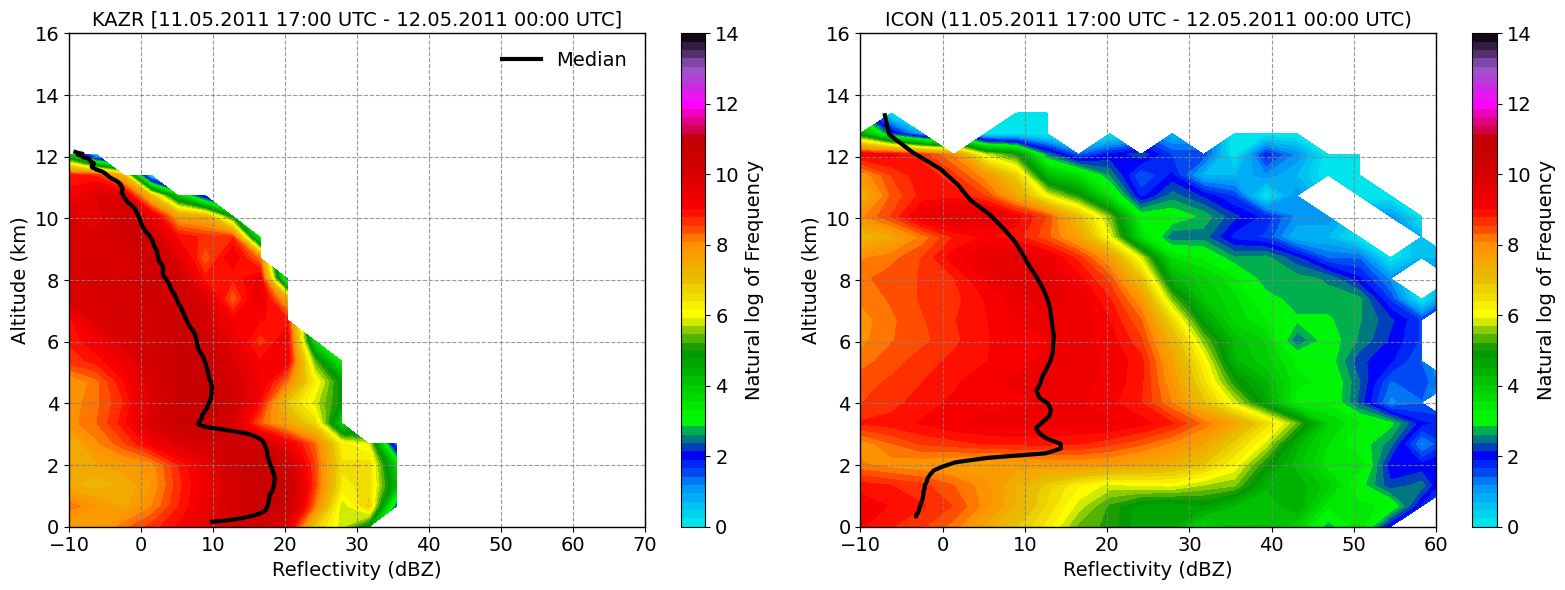

In [13]:
ln=3
fnt=14
lev=np.linspace(0,14,60)
# 7. Plot CFAD

plt.figure(figsize=(16, 6))
plt.style.use('default')

plt.subplot(1,2,1)
#X, Y = np.meshgrid(dbz_bins, alt_bins)
#pcm = plt.pcolormesh(X, Y, np.log(cfad.T), cmap='pyart_NWSRef', shading='auto')


pcm = plt.contourf(dbz_bins[:-1], alt_bins[:-1], np.log(cfad.T), cmap='pyart_NWSRef', levels=lev)  # altitude is adjusted to match the actual  
                                                                                                      # station (34.022°N, 106.89°W) altitude (~1.1 km) 
#pcm = plt.contourf(dbz_bins[:-1], alt_bins[:-1], np.log(cfad.T), cmap='HomeyerRainbow', levels=lev)

plt.plot(med_refl_obs, mean_alt_km_obs, 'k-', linewidth=ln, label='Median')
plt.xlabel('Reflectivity (dBZ)', fontsize=fnt)
plt.ylabel('Altitude (km)', fontsize=fnt)
plt.title('KAZR [11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC]', fontsize=fnt)
cbar = plt.colorbar(pcm, ticks=[0, 2, 4, 6, 8, 10, 12, 14])#, label='Natural log of Frequency')
cbar.ax.tick_params(labelsize=fnt)
cbar.set_label(label='Natural log of Frequency', size=fnt)

plt.ylim(0, 16)
plt.xlim(-10, 70)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.grid(True, linestyle='--', color='grey', alpha=0.8)
plt.legend(frameon=False, loc='best', fontsize=fnt)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.subplot(1,2,2)
X, Y = np.meshgrid(dbz_bins, alt_bins)
#pcm = plt.pcolormesh(X, Y, np.log(cfad.T), cmap='pyart_NWSRef', shading='auto')


pcm = plt.contourf(dbz_4sip_bins[:-1], alt_4sip_bins[:-1], np.log(cfad_4sip.T), cmap='pyart_NWSRef', levels=lev)
#pcm = plt.contourf(dbz_bins[:-1], alt_bins[:-1], np.log(cfad.T), cmap='HomeyerRainbow', levels=lev)

plt.plot(med_refl_4sip, mean_alt_4sip, 'k-', linewidth=ln)
#plt.text(40,14,'11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC', fontsize=fnt)

plt.xlabel('Reflectivity (dBZ)', fontsize=fnt)
plt.ylabel('Altitude (km)', fontsize=fnt)
plt.title('ICON (11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC)', fontsize=fnt)
cbar = plt.colorbar(pcm, ticks=[0, 2, 4, 6, 8, 10, 12, 14])#, label='Natural log of Frequency')
cbar.ax.tick_params(labelsize=fnt)
cbar.set_label(label='Natural log of Frequency', size=fnt)

plt.ylim(0, 16)
plt.xlim(-10, 60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.grid(True, linestyle='--', color='grey', alpha=0.8)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.tight_layout()
plt.show()

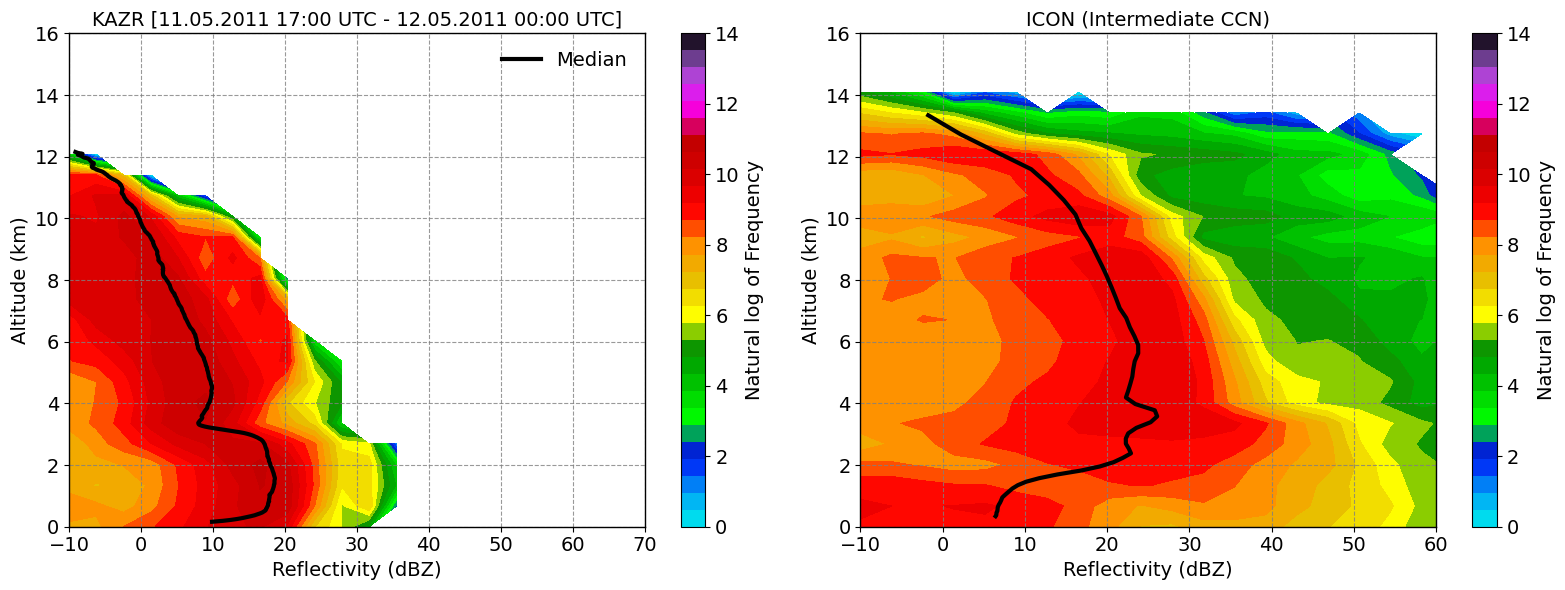

In [41]:
ln=3
fnt=14
lev=np.linspace(0,14,30)
# 7. Plot CFAD

plt.figure(figsize=(16, 6))
plt.style.use('default')

plt.subplot(1,2,1)
#X, Y = np.meshgrid(dbz_bins, alt_bins)
#pcm = plt.pcolormesh(X, Y, np.log(cfad.T), cmap='pyart_NWSRef', shading='auto')


pcm = plt.contourf(dbz_bins[:-1], alt_bins[:-1], np.log(cfad.T), cmap='pyart_NWSRef', levels=lev)  # altitude is adjusted to match the actual  
                                                                                                      # station (34.022°N, 106.89°W) altitude (~1.1 km) 
#pcm = plt.contourf(dbz_bins[:-1], alt_bins[:-1], np.log(cfad.T), cmap='HomeyerRainbow', levels=lev)

plt.plot(med_refl_obs, mean_alt_km_obs, 'k-', linewidth=ln, label='Median')
plt.xlabel('Reflectivity (dBZ)', fontsize=fnt)
plt.ylabel('Altitude (km)', fontsize=fnt)
plt.title('KAZR [11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC]', fontsize=fnt)
cbar = plt.colorbar(pcm, ticks=[0, 2, 4, 6, 8, 10, 12, 14])#, label='Natural log of Frequency')
cbar.ax.tick_params(labelsize=fnt)
cbar.set_label(label='Natural log of Frequency', size=fnt)

plt.ylim(0, 16)
plt.xlim(-10, 70)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.grid(True, linestyle='--', color='grey', alpha=0.8)
plt.legend(frameon=False, loc='best', fontsize=fnt)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.subplot(1,2,2)
X, Y = np.meshgrid(dbz_bins, alt_bins)
#pcm = plt.pcolormesh(X, Y, np.log(cfad.T), cmap='pyart_NWSRef', shading='auto')


pcm = plt.contourf(dbz_int_ccn_4sip_bins[:-1], alt_int_ccn_4sip_bins[:-1], np.log(cfad_int_ccn_4sip.T), cmap='pyart_NWSRef', levels=lev)
#pcm = plt.contourf(dbz_bins[:-1], alt_bins[:-1], np.log(cfad.T), cmap='HomeyerRainbow', levels=lev)

plt.plot(med_refl_int_ccn_4sip, mean_alt_int_ccn_4sip, 'k-', linewidth=ln)
#plt.text(40,14,'11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC', fontsize=fnt)

plt.xlabel('Reflectivity (dBZ)', fontsize=fnt)
plt.ylabel('Altitude (km)', fontsize=fnt)
plt.title('ICON (Intermediate CCN)', fontsize=fnt)
cbar = plt.colorbar(pcm, ticks=[0, 2, 4, 6, 8, 10, 12, 14])#, label='Natural log of Frequency')
cbar.ax.tick_params(labelsize=fnt)
cbar.set_label(label='Natural log of Frequency', size=fnt)

plt.ylim(0, 16)
plt.xlim(-10, 60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.grid(True, linestyle='--', color='grey', alpha=0.8)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.tight_layout()
plt.show()

## Normalized CFAD

In [30]:
nbin=20;

################## KAZR #################

################## KAZR #################
file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

filt_refl_obs = xr.where(ds_kazr_obs.reflectivity_copol > -10., ds_kazr_obs.reflectivity_copol, np.nan)
alt_km_kazr = 1.e-3*ds_kazr_obs.range

# Altitude and refl_obs are not the same dimension, so,
alt_2d = np.broadcast_to(alt_km_kazr.values, filt_refl_obs.shape)

# 3. Flatten both arrays to 1D for histogramming
refl_kazr_flat = filt_refl_obs.values.flatten()
alt_kazr_flat = alt_2d.flatten()

# 4. Filter out NaNs and physically unrealistic values
mask = (~np.isnan(refl_kazr_flat)) & (~np.isnan(alt_kazr_flat)) & (refl_kazr_flat > -10) & (alt_kazr_flat >= 0)
refl_kazr_flat = refl_kazr_flat[mask]
alt_kazr_flat = alt_kazr_flat[mask]

# 5. Define bins
#dbz_bins = np.arange(-10, 81, 3)   # dBZ bins from -10 to 80 in 1 dBZ steps
#alt_bins = np.arange(0., 20.1, 1.0) # Altitude bins from 0 to 15 km in 0.1 km steps

#dbz_kazr_bins = np.linspace(-10, 81, 25)   # dBZ bins from -10 to 80 in 1 dBZ steps
#alt_kazr_bins = np.linspace(0, 16.1, 25) # Altitude bins from 0 to 15 km in 0.1 km steps

dbz_kazr_bins = np.linspace(np.nanmin(refl_kazr_flat), np.nanmax(refl_kazr_flat), nbin)   # dBZ bins from -10 to 80 in 1 dBZ steps
alt_kazr_bins = np.linspace(np.nanmin(alt_kazr_flat), np.nanmax(alt_kazr_flat), nbin) # Altitude bins from 0 to 15 km in 0.1 km steps

# 6. 2D Histogram (CFAD)
cfad_refl_kazr, xedges, yedges = np.histogram2d(refl_kazr_flat, alt_kazr_flat, bins=[dbz_kazr_bins, alt_kazr_bins])

cfad_refl_kazr_norm = cfad_refl_kazr / np.sum(cfad_refl_kazr, axis=0, keepdims=True) # normalized by height

med_refl_kazr = filt_refl_obs.median('time')
median_refl_kazr = filt_refl_obs.median('time')
mean_refl_kazr = filt_refl_obs.mean('time')
mean_alt_km_kazr = 1.e-3*ds_kazr_obs.range

################## End KAZR #############



################## ICON #################
nbin=20
ds_filt = ds_4sip.sel(ncells=mask_ncells_mc3e, time=slice('2011-05-11T17:00:00.000000000','2011-05-12T00:00:00.000000000'))
filt_refl_4sip = xr.where(ds_filt.dbz > -10., ds_filt.dbz, np.nan);
alt_4sip_km = 1.e-3*ds_filt.z_mc

# 3. Flatten both arrays to 1D for histogramming
refl_4sip_flat = filt_refl_4sip.values.flatten()
alt_4sip_flat = alt_4sip_km.values.flatten()

# 4. Filter out NaNs and physically unrealistic values
mask_4sip = (~np.isnan(refl_4sip_flat)) & (~np.isnan(alt_4sip_flat)) & (refl_4sip_flat > -10) & (alt_4sip_flat >= 0)
refl_4sip_flat = refl_4sip_flat[mask_4sip]
alt_4sip_flat = alt_4sip_flat[mask_4sip]

# 5. Define bins
#dbz_4sip_bins = np.arange(-10, 81, 3)   # dBZ bins from -10 to 80 in 1 dBZ steps
#alt_4sip_bins = np.arange(0.2, 20.1, 1) # Altitude bins from 0 to 15 km in 0.1 km steps

dbz_4sip_bins = np.linspace(np.nanmin(refl_4sip_flat), np.nanmax(refl_4sip_flat), nbin)   # dBZ bins from -10 to 80 in 1 dBZ steps
alt_4sip_bins = np.linspace(np.nanmin(alt_4sip_flat), np.nanmax(alt_4sip_flat), nbin) # Altitude bins from 0 to 15 km in 0.1 km steps

# 6. 2D Histogram (CFAD)
cfad_4sip, xedges_4sip, yedges_4sip = np.histogram2d(refl_4sip_flat, alt_4sip_flat, bins=[dbz_4sip_bins, alt_4sip_bins])

cfad_4sip_norm = cfad_4sip / np.sum(cfad_4sip, axis=0, keepdims=True) # normalized by height


med_refl_4sip = filt_refl_4sip.median(dim=('time','ncells'))
median_refl_4sip = filt_refl_4sip.median(dim=('time','ncells'))
mean_alt_4sip = alt_4sip_km.mean(dim=('time','ncells'))

med_refl_4sip = xr.where(mean_alt_4sip < 13.35, med_refl_4sip, np.nan)

median_refl_4sip = median_refl_4sip.values
mean_alt_4sip = mean_alt_4sip.values


################## End ICON #################


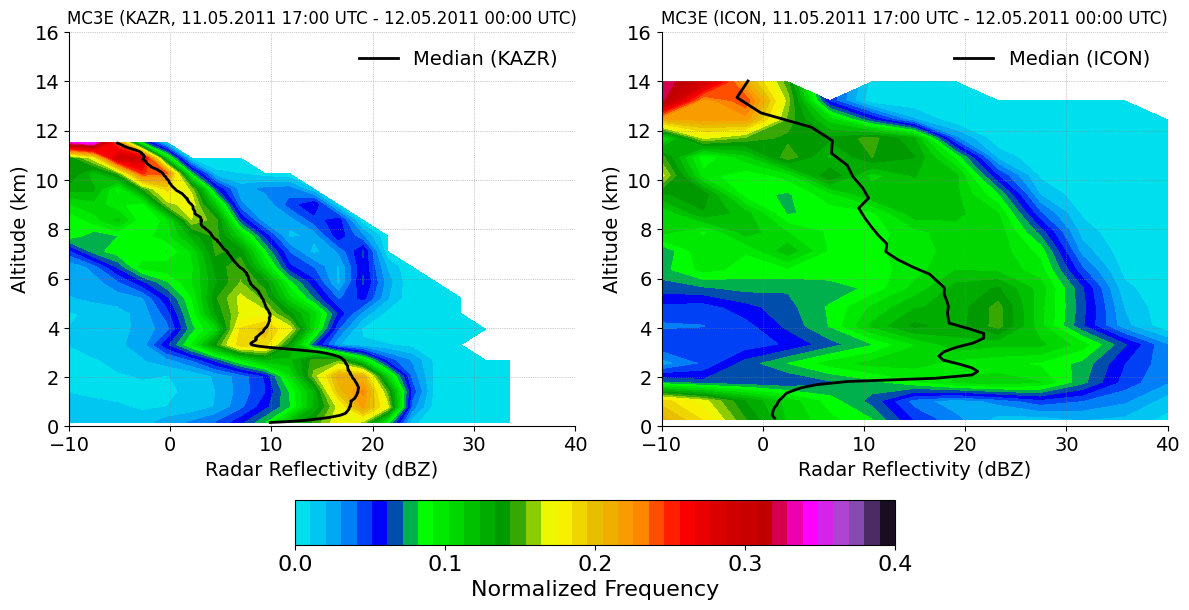

In [31]:


mean_refl_kazr = mean_refl_kazr[:median_refl_kazr.shape[0]]
median_refl_kazr1 = median_refl_kazr
median_refl_kazr1[alt_km_kazr > 11.5] = np.nan


#height_bin_centers = 0.5 * (alt_ec_bins[:-1] + alt_ec_bins[1:])
#cfad_refl_kazr_norm[:, height_bin_centers > 13.] = np.nan

cfad_refl_kazr_norm[cfad_refl_kazr_norm <= 0.] = np.nan

cfad_4sip_norm[cfad_4sip_norm <= 0.] = np.nan
median_refl_4sip[mean_alt_4sip > 14.5] = np.nan


fnt = 14
lev1 = np.linspace(0., 0.4, 40)
lev2 = np.linspace(0., 0.4, 40)
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
cnt = plt.contourf(dbz_kazr_bins[:-1], alt_kazr_bins[:-1], (cfad_refl_kazr_norm.T), levels=lev1, cmap='pyart_NWSRef')
plt.plot(median_refl_kazr1, alt_km_kazr, 'k-', linewidth=2, label='Median (KAZR)')

plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fnt, loc='best')

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.xlabel("Radar Reflectivity (dBZ)", fontsize=fnt)
plt.ylabel("Altitude (km)", fontsize=fnt)
plt.title("MC3E (KAZR, 11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC)", fontsize=fnt-2)

plt.xlim(-10, 40)
plt.ylim(0, 16)
#cbar = plt.colorbar(contour, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], label='Normalized Frequency', orientation='vertical')
#cbar.ax.tick_params(labelsize=fnt)
#cbar.set_label(label='Normalized Frequency', size=fnt)

# Customize tick labels and rotation
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.xticks(rotation=0)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)
#contour = plt.contourf(refl_4sip_bins[:-1], avg_alt_4sip, np.log(cfad_refl_4sip.T), levels=lev, cmap='turbo')
cnt = plt.contourf(dbz_4sip_bins[:-1], alt_4sip_bins[:-1], (cfad_4sip_norm.T), levels=lev2, cmap='pyart_NWSRef')#pyart_NWSRef')
plt.plot(median_refl_4sip, mean_alt_4sip, color='k', linewidth=2, label='Median (ICON)')
#plt.plot(median_refl_ec1, mean_alt_ec_filt1, 'k--', linewidth=2, label='Median (EarthCARE-CPR)')


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fnt, loc='best')

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.xlabel("Radar Reflectivity (dBZ)", fontsize=fnt)
plt.ylabel("Altitude (km)", fontsize=fnt)
plt.title("MC3E (ICON, 11.05.2011 17:00 UTC - 12.05.2011 00:00 UTC)", fontsize=fnt-2)

plt.xlim(-10, 40)
plt.ylim(0, 16)
##cbar = plt.colorbar(contour, ticks=[0, 2, 4, 6, 8, 10], label='Natural log of Frequency', orientation='vertical')
#cbar = plt.colorbar(contour, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], label='Normalized Frequency', orientation='vertical')
#cbar.ax.tick_params(labelsize=fnt)
#cbar.set_label(label='Normalized Frequency', size=fnt)

# Customize tick labels and rotation
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.xticks(rotation=0)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


fig = plt.gcf()
cbar_ax1 = fig.add_axes([0.25, -0.1, 0.5, 0.09])  # [left, bottom, width, height]
cbar1 = fig.colorbar(cnt, cax=cbar_ax1, orientation='horizontal', ticks=[0, 0.1, 0.2, 0.3, 0.4])
cbar1.set_label('Normalized Frequency', fontsize=fnt+2)
cbar1.ax.tick_params(labelsize=fnt+2)

plt.tight_layout()
plt.show()

In [15]:

#file_path='/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY';
#ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf');

ds_kazr_obs.reflectivity_copol

<xarray.DataArray 'reflectivity_copol' (time: 23386, range: 580)> Size: 54MB
dask.array<open_dataset-reflectivity_copol, shape=(23386, 580), dtype=float32, chunksize=(23386, 580), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 187kB 2011-05-11T00:00:00.749755 ... 2011-...
  * range    (range) float32 2kB 160.6 190.6 220.6 ... 1.749e+04 1.752e+04
Attributes:
    long_name:            Reflectivity, co-polarization
    units:                dBZ
    ancillary_variables:  qc_reflectivity_copol
    valid_min:            -100.0
    valid_max:            40.0

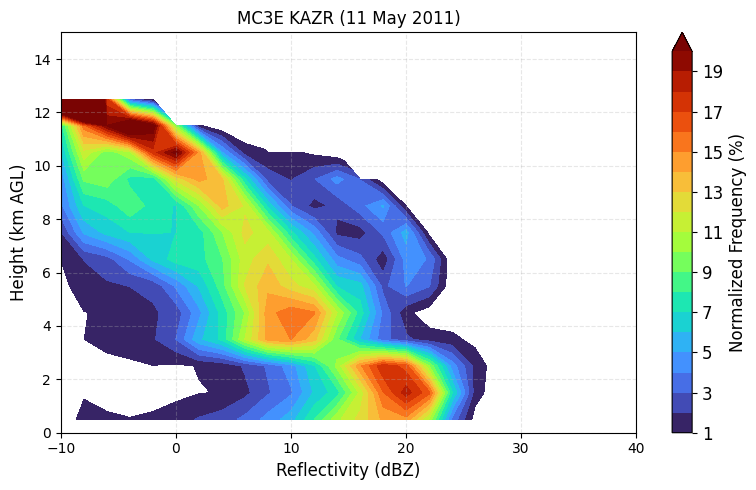

CFAD Statistics:
Total valid points: 2,241,256
Height range: 0.16 - 12.15 km
Reflectivity range: -10.00 - 35.98 dBZ
Max normalized frequency: 45.27%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Load MC3E KAZR data
file_path = '/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY'
ds_kazr_obs = xr.open_mfdataset(f'{file_path}/sgpkazrgeC1.b1.20110511.000000.cdf')

# Filter reflectivity data
filt_refl_obs = xr.where(ds_kazr_obs.reflectivity_copol > -10., 
                         ds_kazr_obs.reflectivity_copol, 
                         np.nan)

# Get height in km (KAZR range is already height above ground for vertical pointing)
alt_km = 1.e-3 * ds_kazr_obs.range  # Convert to km

# Extract reflectivity values
refl_obs = filt_refl_obs.values  # shape: (time, range)

# Create 2D height array matching reflectivity shape
# For KAZR, each time step has the same height levels
height_km_obs = np.tile(alt_km.values, (refl_obs.shape[0], 1))

# =====================================================
# Create CFAD (Contoured Frequency by Altitude Diagram)
# =====================================================

# Define bins
dbz_bins = np.arange(-15, 50, 2)   # 2 dBZ bins (typical for CFAD)
height_bins = np.arange(0, 20, 1)  # 1 km bins 

# Flatten arrays for histogram calculation
refl_obs_flat = refl_obs.flatten()
height_obs_flat = height_km_obs.flatten()

# Remove invalid data (NaN, masked values)
valid_mask_obs = ~np.isnan(refl_obs_flat) & ~np.isnan(height_obs_flat)
refl_obs_valid = refl_obs_flat[valid_mask_obs]
height_obs_valid = height_obs_flat[valid_mask_obs]

# Create 2D histogram
hist_obs_2d, height_obs_edges, dbz_obs_edges = np.histogram2d(
    height_obs_valid, refl_obs_valid,
    bins=[height_bins, dbz_bins]
)

# Normalize by altitude (each height level sums to 1)
# This is the key feature of CFAD diagrams
hist_obs_normalized = np.zeros_like(hist_obs_2d)
for i in range(hist_obs_2d.shape[0]):
    row_obs_sum = hist_obs_2d[i, :].sum()
    if row_obs_sum > 0:
        hist_obs_normalized[i, :] = hist_obs_2d[i, :] / row_obs_sum

# Convert to percentage
freq_percent_obs = hist_obs_normalized * 100

# Mask zeros for better visualization
freq_percent_obs_masked = np.ma.masked_where(freq_percent_obs == 0, freq_percent_obs)

# Calculate median reflectivity at each height level
median_dbz_obs = []
median_heights_obs = []
for i in range(len(height_bins)-1):
    h_min_obs = height_bins[i]
    h_max_obs = height_bins[i+1]
    mask_obs = (height_obs_valid >= h_min_obs) & (height_obs_valid < h_max_obs)
    
    if mask_obs.sum() > 0:
        median_val_obs = np.median(refl_obs_valid[mask_obs])
        median_dbz_obs.append(median_val_obs)
        median_heights_obs.append((h_min_obs + h_max_obs) / 2.)
        
# =====================================================
# Plot CFAD
# =====================================================

fnt = 12
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 5))

# Create meshgrid for plotting - use bin centers instead of edges
height_obs_centers = (height_obs_edges[:-1] + height_obs_edges[1:]) / 2
dbz_obs_centers = (dbz_obs_edges[:-1] + dbz_obs_edges[1:]) / 2
H_obs, D_obs = np.meshgrid(height_obs_centers, dbz_obs_centers)

# Filled contours
lev = np.linspace(1, 20, 20)

contourf = ax.contourf(D_obs, H_obs, freq_percent_obs_masked.T, 
                       levels=lev, 
                       cmap='turbo', 
                       extend='max')

# Colorbar
cbar = plt.colorbar(contourf, ax=ax, label='Normalized Frequency (%)')
cbar.ax.tick_params(labelsize=fnt)
cbar.set_label(label='Normalized Frequency (%)', size=fnt)

# Labels and title
ax.set_xlabel('Reflectivity (dBZ)', fontsize=fnt)
ax.set_ylabel('Height (km AGL)', fontsize=fnt)
ax.set_title('MC3E KAZR (11 May 2011)', fontsize=fnt)

# Set reasonable axis limits
ax.set_xlim([-10, 40])
ax.set_ylim([0, 15])

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# =====================================================
# Optional: Print statistics
# =====================================================

print("CFAD Statistics:")
print(f"Total valid points: {len(refl_obs_valid):,}")
print(f"Height range: {height_obs_valid.min():.2f} - {height_obs_valid.max():.2f} km")
print(f"Reflectivity range: {refl_obs_valid.min():.2f} - {refl_obs_valid.max():.2f} dBZ")
print(f"Max normalized frequency: {freq_percent_obs_masked.max():.2f}%")

In [22]:

stime='2011-05-11T00:00:00.000000000'
etime='2011-05-12T00:00:00.000000000'

#lon_min, lon_max = 75, 76
#lat_min, lat_max = 17, 18
#mask = (
#    (np.rad2deg(ds_4sip.clon) >= lon_min) &
#    (np.rad2deg(ds_4sip.clon) <= lon_max) &
#    (np.rad2deg(ds_4sip.clat) >= lat_min) &
#    (np.rad2deg(ds_4sip.clat) <= lat_max)
#).compute()

#ds_4sip_refl = ds_4sip.where(mask, drop=True)

#ds_4sip_refl = ds_4sip_refl.sel(time=slice(stime, etime))
ds_4sip_refl = ds_4sip.sel(time=slice(stime, etime))

#mask_refl = (ds_4sip.dbz > -10.) & (np.abs(ds_4sip.w_vel) < 6.) & (ds_4sip_filt.tq > 1.e-6)
filt_refl_4sip = xr.where((ds_4sip_refl.dbz > -10.), ds_4sip_refl.dbz, np.nan)

alt_4sip_km = 1.e-3*ds_4sip_refl.z_mc

# Extract reflectivity and height data
refl_4sip = filt_refl_4sip.values   # shape: (time, height, ncells)
height_4sip = alt_4sip_km.values    # shape: (time, height, ncells) or (height, ncells)

# Flatten all dimensions to 1D arrays
refl_4sip_flat = refl_4sip.flatten()
height_4sip_flat = height_4sip.flatten()


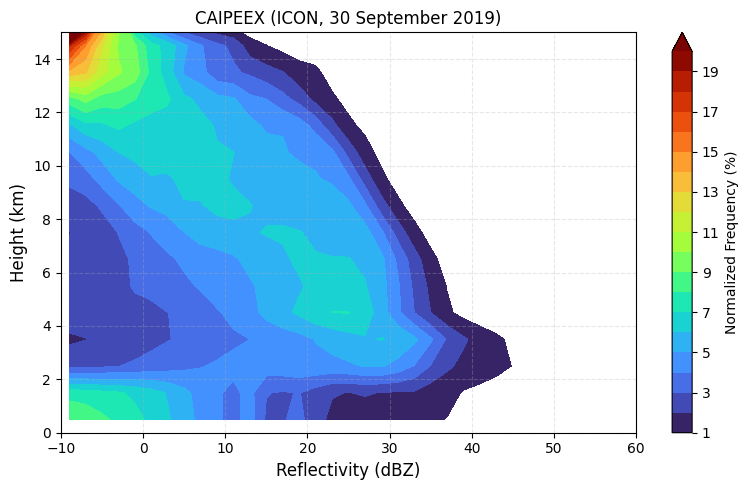

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr



# Remove invalid data (NaN values)
valid_4sip_mask = ~np.isnan(refl_4sip_flat) & ~np.isnan(height_4sip_flat)  
refl_4sip_valid = refl_4sip_flat[valid_4sip_mask]
height_4sip_valid = height_4sip_flat[valid_4sip_mask]

# =====================================================
# Create CFAD for ICON data
# =====================================================

# Define bins (same as radar CFAD for comparison)
dbz_bins = np.arange(-14, 50, 2)  # 2 dBZ bins
height_bins = np.arange(0, 20, 1.0)  # 400 m bins (0.4 km)

# Create 2D histogram
hist_4sip_2d, height_4sip_edges, dbz_4sip_edges = np.histogram2d(
    height_4sip_valid, refl_4sip_valid,
    bins=[height_bins, dbz_bins]
)

# Normalize by altitude (each height level sums to 1)
hist_4sip_normalized = np.zeros_like(hist_4sip_2d)
for i in range(hist_4sip_2d.shape[0]):
    row_sum_4sip = hist_4sip_2d[i, :].sum()
    if row_sum_4sip > 0:
        hist_4sip_normalized[i, :] = hist_4sip_2d[i, :] / row_sum_4sip

# Convert to percentage
freq_percent_4sip = hist_4sip_normalized * 100

# Mask zeros for better visualization
freq_percent_masked_4sip = np.ma.masked_where(freq_percent_4sip == 0, freq_percent_4sip)

# =====================================================
# Calculate median and mode
# =====================================================

# Calculate median reflectivity at each height bin
median_dbz_4sip = []
median_heights_4sip = []
for i in range(len(height_bins)-1):
    h_min_4sip = height_bins[i]
    h_max_4sip = height_bins[i+1]
    mask_4sip = (height_4sip_valid >= h_min_4sip) & (height_4sip_valid < h_max_4sip)
    
    if mask_4sip.sum() > 0:
        median_val_4sip = np.median(refl_4sip_valid[mask_4sip])
        median_dbz_4sip.append(median_val_4sip)
        median_heights_4sip.append((h_min_4sip + h_max_4sip) / 2.)

# Find mode (most frequent reflectivity) at each height
mode_dbz_4sip = []
mode_heights_4sip = []
for i in range(len(height_bins)-1):
    if hist_4sip_normalized[i, :].sum() > 0:
        max_idx_4sip = np.argmax(hist_4sip_normalized[i, :])
        mode_dbz_4sip.append((dbz_bins[max_idx_4sip] + dbz_bins[max_idx_4sip+1]) / 2)
        mode_heights_4sip.append((height_bins[i] + height_bins[i+1]) / 2)

# =====================================================
# Plot CFAD
# =====================================================
fnt=12
lev=np.linspace(1,20,20)

fig, ax = plt.subplots(figsize=(8, 5))

# Create meshgrid for plotting - use bin centers
height_4sip_centers = (height_4sip_edges[:-1] + height_4sip_edges[1:]) / 2
dbz_4sip_centers = (dbz_4sip_edges[:-1] + dbz_4sip_edges[1:]) / 2
H_4sip, D_4sip = np.meshgrid(height_4sip_centers, dbz_4sip_centers)

# Filled contours
levels = np.arange(0, freq_percent_masked_4sip.max() + 1, 1)  # 1% intervals
contourf = ax.contourf(D_4sip, H_4sip, freq_percent_masked_4sip.T, 
                       levels=lev, 
                       cmap='turbo', 
                       extend='max')

# Add contour lines for clarity
#contour_lines = ax.contour(D, H, freq_percent_masked.T, 
#                           levels=[1, 2, 5, 10, 15, 20], 
#                           colors='black', 
#                           linewidths=0.5, 
#                           alpha=0.5)
#ax.clabel(contour_lines, inline=True, fontsize=fnt, fmt='%d%%')

# Plot mode and median lines
#ax.plot(mode_dbz, mode_heights, 'k-', linewidth=2.5, label='Mode', zorder=10)
#ax.plot(median_dbz, median_heights, 'w-', linewidth=2.5, zorder=11)
#ax.plot(median_dbz, median_heights, 'r--', linewidth=2, label='Median', zorder=12)

# Colorbar
cbar = plt.colorbar(contourf, ax=ax, label='Normalized Frequency (%)')

# Labels and title
ax.set_xlabel('Reflectivity (dBZ)', fontsize=fnt)#, fontweight='bold')
ax.set_ylabel('Height (km)', fontsize=fnt)#, fontweight='bold')
ax.set_title('CAIPEEX (ICON, 30 September 2019)', fontsize=fnt)#, fontweight='bold')

# Set reasonable axis limits
ax.set_xlim([-10, 60])
ax.set_ylim([0, 15])

# Grid and legend
ax.grid(True, alpha=0.3, linestyle='--')
#ax.legend(loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()


# =====================================================
# Print statistics
# =====================================================

#print("CFAD Statistics (ICON 4SIP):")
#print(f"Total valid points: {len(refl_valid):,}")
#print(f"Height range: {height_valid.min():.2f} - {height_valid.max():.2f} km")
#print(f"Reflectivity range: {refl_valid.min():.2f} - {refl_valid.max():.2f} dBZ")
#print(f"Max normalized frequency: {freq_percent_masked.max():.2f}%")
#print(f"Time steps: {refl_icon.shape[0]}")
#print(f"Height levels: {refl_icon.shape[1]}")
#print(f"Number of cells: {refl_icon.shape[2]}")

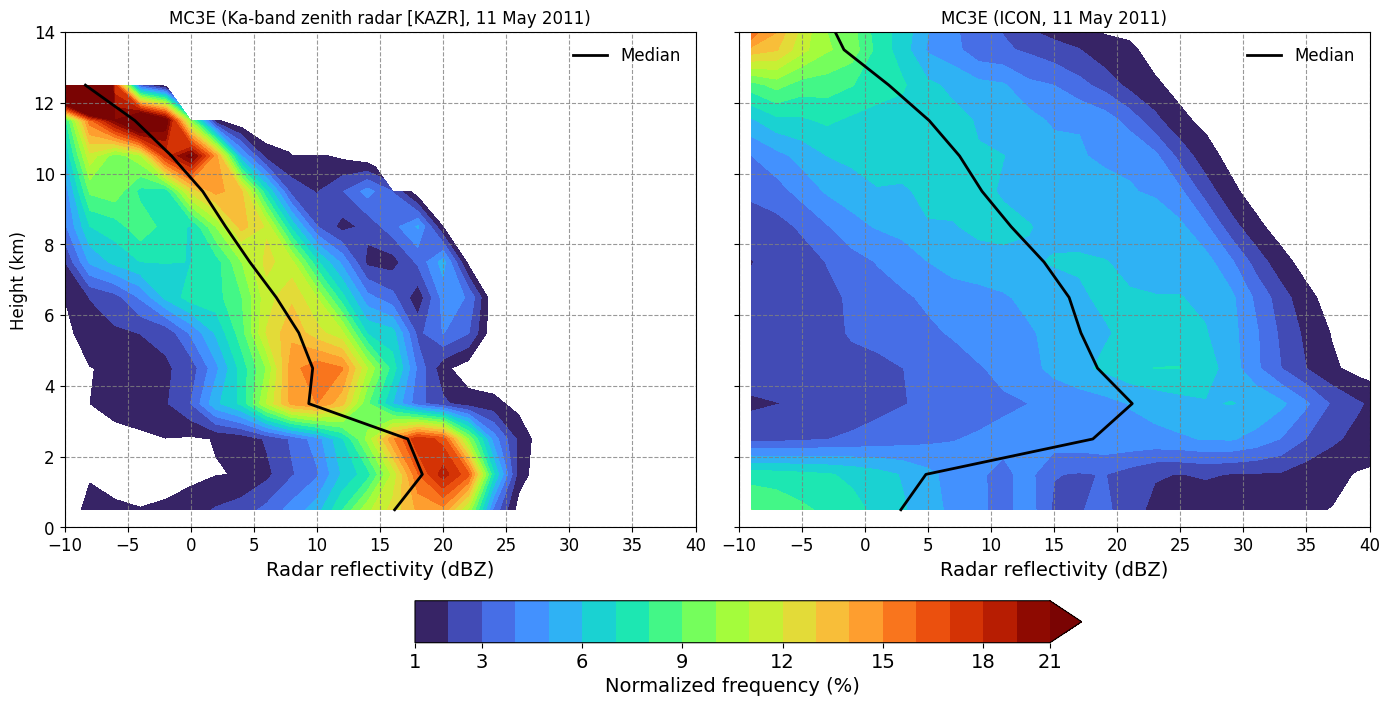

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create data (make sure D_obs, H_obs, freq_percent_obs_masked, etc. are defined)
lev = np.linspace(1, 20, 20)

fnt = 12
ln=2;

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First subplot (DCMEX Observations)
cnt1 = ax1.contourf(D_obs, H_obs, freq_percent_obs_masked.T, 
                        levels=lev, 
                        cmap='turbo', 
                        extend='max')

# Colorbar for first subplot
#cbar1 = plt.colorbar(contourf, ax=ax1, label='Normalized Frequency (%)')
#cbar1.ax.tick_params(labelsize=fnt)
#cbar1.set_label(label='Normalized Frequency (%)', size=fnt)

ax1.plot(median_dbz_obs, median_heights_obs, 'k-', linewidth=ln, zorder=11, label='Median')

# Labels and title for first subplot
ax1.set_xlabel('Radar reflectivity (dBZ)', fontsize=fnt+2)
ax1.set_ylabel('Height (km)', fontsize=fnt)   # ASL
ax1.set_title('MC3E (Ka-band zenith radar [KAZR], 11 May 2011)', fontsize=fnt)

# Set reasonable axis limits for first subplot
ax1.set_xlim([-10, 40])
ax1.set_ylim([0, 14])
ax1.set_xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
ax1.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])

ax1.tick_params(axis='x', labelsize=fnt)
ax1.tick_params(axis='y', labelsize=fnt)

# Grid for first subplot
ax1.grid(True, linestyle='--', color='grey', alpha=0.8)
ax1.legend(frameon=False, loc='best', fontsize=fnt)

# Second subplot (ICON Simulation)
cnt2 = ax2.contourf(D_4sip, H_4sip, freq_percent_masked_4sip.T, 
                        levels=lev, 
                        cmap='turbo', 
                        extend='max')


ax2.plot(median_dbz_4sip, median_heights_4sip, 'k-', linewidth=ln, zorder=11, label='Median')

# Colorbar for second subplot
#cbar2 = plt.colorbar(contourf, ax=ax2, label='Normalized Frequency (%)')

# Labels and title for second subplot
ax2.set_xlabel('Radar reflectivity (dBZ)', fontsize=fnt+2)
#ax2.set_ylabel('Height (km)', fontsize=fnt)
ax2.set_title('MC3E (ICON, 11 May 2011)', fontsize=fnt)

# Set reasonable axis limits for second subplot
ax2.set_xlim([-10, 40])
ax2.set_ylim([0, 14])
ax2.set_xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
ax2.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])

ax2.set_yticklabels([])

ax2.tick_params(axis='x', labelsize=fnt)

# Grid for second subplot
ax2.grid(True, linestyle='--', color='grey', alpha=0.8)
ax2.legend(frameon=False, loc='best', fontsize=fnt)

fig = plt.gcf()  # Get the current figure
#cbar_ax1 = fig.add_axes([0.25, 0.25, 0.5, 0.04])  # [left, bottom, width, height]
cbar_ax1 = fig.add_axes([0.3, -0.08, 0.5, 0.07])
cbar = fig.colorbar(cnt2, cax=cbar_ax1, ticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], orientation='horizontal')
cbar = fig.colorbar(cnt2, cax=cbar_ax1, ticks=[1, 3, 6, 9, 12, 15, 18, 21], orientation='horizontal')
cbar.set_label('Normalized frequency (%)', fontsize=fnt+2)
cbar.ax.tick_params(labelsize=fnt+2)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show plot
plt.show()


## Precipitation rate

In [35]:

acc_precip_4sip = ds_4sip.tot_prec.mean('ncells')
del_prec_4sip = ds_4sip.tot_prec.diff('time')
precip_rate_4sip = del_prec_4sip/0.5

time_4sip = ds_4sip.time.values
precip_rate_4sip = precip_rate_4sip.mean('ncells').values


acc_precip_int_ccn_4sip = ds_4sip_int_ccn.tot_prec.mean('ncells')
del_prec_int_ccn_4sip = ds_4sip_int_ccn.tot_prec.diff('time')
precip_rate_int_ccn_4sip = del_prec_int_ccn_4sip/0.5

time_int_ccn_4sip = ds_4sip_int_ccn.time.values
precip_rate_int_ccn_4sip = precip_rate_int_ccn_4sip.mean('ncells').values


In [21]:
time_4sip.shape

(121,)

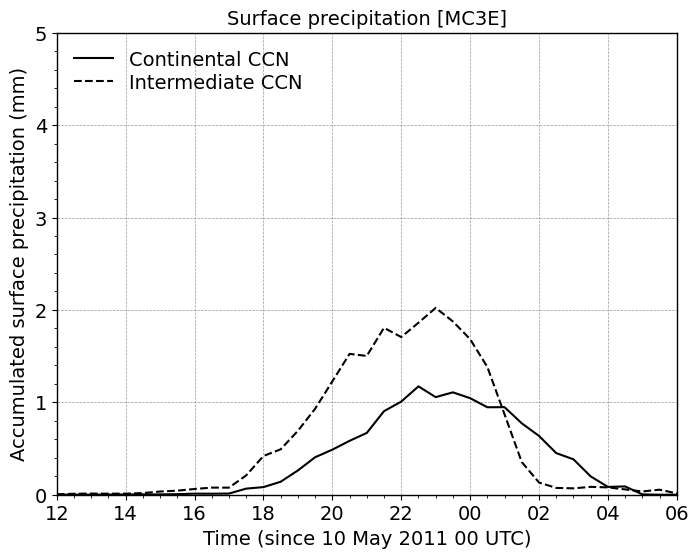

In [38]:

plt.figure(figsize=(8,6))
plt.style.use('default')

plt.plot(time_4sip[:-1], precip_rate_4sip, 'k-', label='Continental CCN')
plt.plot(time_int_ccn_4sip[:-1], precip_rate_int_ccn_4sip, 'k--', label='Intermediate CCN')

plt.grid(True, linestyle='--', color='grey', linewidth=0.5, alpha=0.8)
plt.minorticks_on()
plt.ylim(0, 5)
plt.ylabel('Accumulated surface precipitation (mm)', fontsize=fnt)

plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=fnt)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 12, 0) 
end_date = datetime(2011, 5, 12, 6, 0)

plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.title('Surface precipitation [MC3E]', fontsize=fnt)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fnt, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.grid(True, linestyle='--', color='grey', alpha=0.8)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.show()

In [121]:

ds_precip_obs = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/observations/precipitation/sgp*.cdf');

######################## 

times = pd.to_datetime({
    'year': ds_precip_obs['year'].values,
    'month': ds_precip_obs['month'].values,
    'day': ds_precip_obs['day'].values,
    'hour': ds_precip_obs['hour'].values,
    'minute': ds_precip_obs['minute'].values,
    'second': 0  # optional: include if needed
})

# Assign as coordinate 
ds_precip_obs = ds_precip_obs.assign_coords(time_dim=("time_dim", times))

#########################

ds_precip_obs.time_dim

<xarray.DataArray 'time_dim' (time_dim: 368)> Size: 3kB
array(['2011-04-22T00:00:00.000000000', '2011-04-22T03:00:00.000000000',
       '2011-04-22T06:00:00.000000000', ..., '2011-06-06T15:00:00.000000000',
       '2011-06-06T18:00:00.000000000', '2011-06-06T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_dim  (time_dim) datetime64[ns] 3kB 2011-04-22 ... 2011-06-06T21:00:00

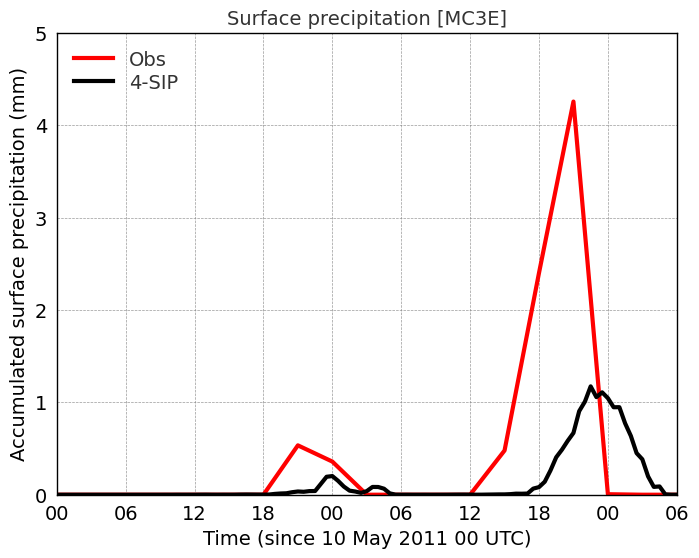

In [129]:
fnt=14
ln = 3
plt.figure(figsize=(8, 6))
plt.plot(ds_precip_obs.time_dim, ds_precip_obs.prec_srf, 'r-', label='Obs', linewidth=ln)
plt.plot(time_4sip[:-1], precip_rate_4sip, 'k-', label='4-SIP', linewidth=ln)

plt.grid(True, linestyle='--', color='grey', linewidth=0.5, alpha=0.8)
plt.minorticks_on()
plt.ylim(0, 5)
plt.ylabel('Accumulated surface precipitation (mm)', fontsize=fnt)

plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=fnt)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 10, 0, 0) 
end_date = datetime(2011, 5, 12, 6, 0)

plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.title('Surface precipitation [MC3E]', fontsize=fnt)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.2, fontsize=fnt, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.grid(True, linestyle='--', color='grey', alpha=0.8)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.show()

In [10]:

aircraft_starttime='2011-05-11T16:30:00.000000000'
#aircraft_endtime='2011-05-11T21:00:00.000000000'
aircraft_endtime='2011-05-12T00:00:00.000000000'

#ds_4sip2 = ds_4sip.copy(deep=True)

ds_filt = ds_4sip.sel(ncells=mask_ncells_mc3e, time=slice('2011-05-11T17:00:00.000000000','2011-05-12T00:00:00.000000000'))

ds_nosip_new = ds_nosip.sel(ncells=mask_ncells_mc3e, time=slice(aircraft_starttime, aircraft_endtime))
ds_4sip_new = ds_4sip.sel(ncells=mask_ncells_mc3e, time=slice(aircraft_starttime, aircraft_endtime))
#ds_norf_new = ds_norf.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nohm_new = ds_nohm.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nobr_new = ds_nobr.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nosb_new = ds_nosb.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))


#ds_4sip_int_ccn_new = ds_4sip_int_ccn.sel(ncells=mask_ncells_mc3e,time=slice(aircraft_starttime, aircraft_endtime))
#ds_4sip_rc_new = ds_4sip.sel(ncells=mask_ncells_mc3e)
#ds_4sip_nrc_new = ds_4sip_no_rad_coupl.sel(ncells=mask)


In [18]:

mean_ht_nosip = ds_nosip.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))

mean_ht_4sip = ds_4sip.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip = ds_4sip.tempc.mean(dim=('time','ncells'))

mean_ht_norf = ds_norf.z_mc.mean(dim=('time','ncells'))
mean_tempc_norf = ds_norf.tempc.mean(dim=('time','ncells'))

mean_ht_nohm = ds_nohm.z_mc.mean(dim=('time','ncells'))
mean_tempc_nohm = ds_nohm.tempc.mean(dim=('time','ncells'))

mean_ht_nobr = ds_nobr.z_mc.mean(dim=('time','ncells'))
mean_tempc_nobr = ds_nobr.tempc.mean(dim=('time','ncells'))

mean_ht_nosb = ds_nosb.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosb = ds_nosb.tempc.mean(dim=('time','ncells'))

w_thres = 2.
# Latent heating rate with No SIP
filt_lhr = xr.where((ds_nosip.tq > 1.e-6) & (ds_nosip.w_vel > w_thres), ds_nosip.d_lhr, np.nan)
lhr_kpers_nosip = (1./1800.) * np.gradient(ds_nosip.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nosip = lhr_kpers_nosip * 86400.
mean_lhr_kperd_nosip = np.mean(lhr_kperd_nosip, axis=(0,2))

# Latent heating rate with 4-SIP
filt_lhr = xr.where((ds_4sip.tq > 1.e-6) & (ds_4sip.w_vel > w_thres), ds_4sip.d_lhr, np.nan)
lhr_kpers_4sip = (1./1800.) * np.gradient(ds_4sip.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip = lhr_kpers_4sip * 86400.
mean_lhr_kperd_4sip = np.mean(lhr_kperd_4sip, axis=(0,2))

# Latent heating rate with No Raindrop Shattering (RF)
filt_lhr = xr.where((ds_norf.tq > 1.e-6) & (ds_norf.w_vel > w_thres), ds_norf.d_lhr, np.nan)
lhr_kpers_norf = (1./1800.) * np.gradient(ds_norf.d_lhr, axis=0) # w.r.t. time
lhr_kperd_norf = lhr_kpers_norf * 86400.
mean_lhr_kperd_norf = np.mean(lhr_kperd_norf, axis=(0,2))

# Latent heating rate with No Hallett-Mossop (HM)
filt_lhr = xr.where((ds_nohm.tq > 1.e-6) & (ds_nohm.w_vel > w_thres), ds_nohm.d_lhr, np.nan)
lhr_kpers_nohm = (1./1800.) * np.gradient(ds_nohm.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nohm = lhr_kpers_nohm * 86400.
mean_lhr_kperd_nohm = np.mean(lhr_kperd_nohm, axis=(0,2))

# Latent heating rate with No ice-ice collision breakup (BR)
filt_lhr = xr.where((ds_nobr.tq > 1.e-6) & (ds_nobr.w_vel > w_thres), ds_nobr.d_lhr, np.nan)
lhr_kpers_nobr = (1./1800.) * np.gradient(ds_nobr.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nobr = lhr_kpers_nobr * 86400.
mean_lhr_kperd_nobr = np.mean(lhr_kperd_nobr, axis=(0,2))

# Latent heating rate with No Sublimation (SB)
filt_lhr = xr.where((ds_nosb.tq > 1.e-6) & (ds_nosb.w_vel > w_thres), ds_nosb.d_lhr, np.nan)
lhr_kpers_nosb = (1./1800.) * np.gradient(ds_nosb.d_lhr, axis=0) # w.r.t. time
lhr_kperd_nosb = lhr_kpers_nosb * 86400.
mean_lhr_kperd_nosb = np.mean(lhr_kperd_nosb, axis=(0,2))


# Change in lhr w.r.t. control
del_lhr_kperd_norf = mean_lhr_kperd_4sip-mean_lhr_kperd_norf
del_lhr_kperd_nohm = mean_lhr_kperd_4sip-mean_lhr_kperd_nohm
del_lhr_kperd_nobr = mean_lhr_kperd_4sip-mean_lhr_kperd_nobr
del_lhr_kperd_nosb = mean_lhr_kperd_4sip-mean_lhr_kperd_nosb
del_lhr_kperd_nosip = mean_lhr_kperd_4sip-mean_lhr_kperd_nosip


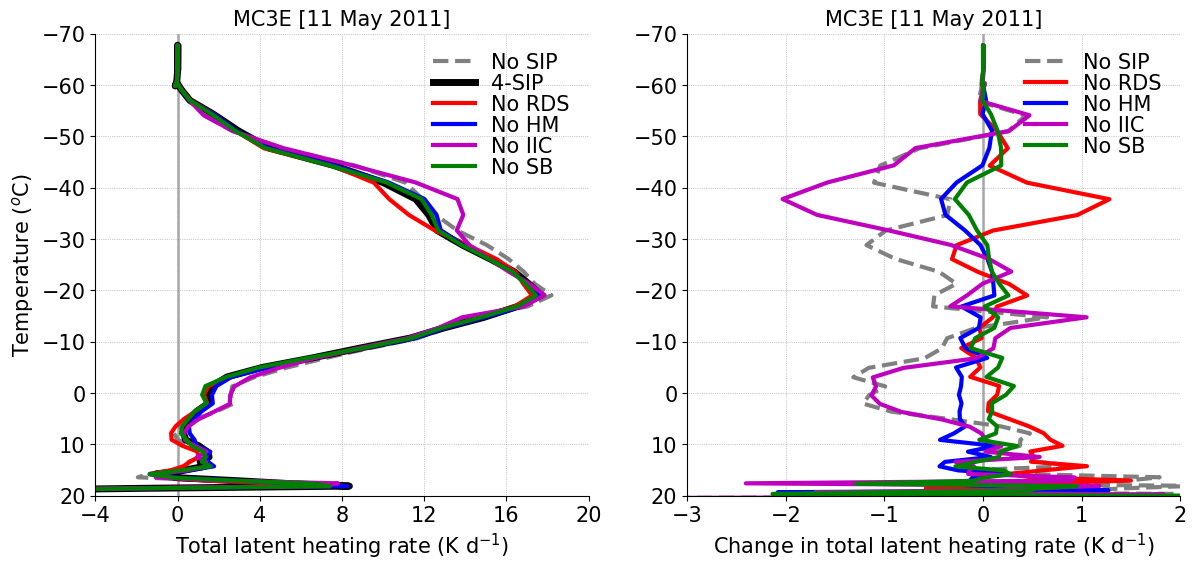

In [21]:

fontsize=15;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_lhr_kperd_nosip, mean_tempc_nosip, '--', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(mean_lhr_kperd_4sip, mean_tempc_4sip, 'k-', linewidth=lnwdth+2, label='4-SIP')
plt.plot(mean_lhr_kperd_norf, mean_tempc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(mean_lhr_kperd_nohm, mean_tempc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(mean_lhr_kperd_nobr, mean_tempc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(mean_lhr_kperd_nosb, mean_tempc_nosb, 'g-', linewidth=lnwdth, label='No SB')

plt.xlim(-4, 20)
plt.ylim(20, -70)
plt.xticks([-4, 0, 4, 8, 12, 16, 20], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('MC3E [11 May 2011]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)

plt.subplot(1,2,2)
plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(del_lhr_kperd_nosip, mean_tempc_nosip, '--', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(del_lhr_kperd_norf, mean_tempc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(del_lhr_kperd_nohm, mean_tempc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(del_lhr_kperd_nobr, mean_tempc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(del_lhr_kperd_nosb, mean_tempc_nosb, 'g-', linewidth=lnwdth, label='No SB')

plt.xlim(-3, 2)
plt.ylim(20, -70)
plt.xticks([-3, -2, -1, 0, 1, 2], fontsize=fontsize)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70], fontsize=fontsize)
plt.xlabel('Change in total latent heating rate (K d$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('MC3E [11 May 2011]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.show()


In [100]:
#print(nice_cip_perm3.shape)
#print(data_v2_new)
print(data_v2_new.shape)
filtered_data_v2 = data_v2[data_v2['time'].isin(data_cip['time'])]
print(filtered_data_v2.shape)
print(data_v2.time)
print(data_cip.time)

(13267, 67)
(13267, 45)
0        56772
1        56773
2        56774
3        56775
4        56776
         ...  
13262    70071
13263    70072
13264    70073
13265    70074
13266    70075
Name: time, Length: 13267, dtype: int64
0        56772
1        56773
2        56774
3        56775
4        56776
         ...  
13300    70072
13301    70073
13302    70074
13303    70075
13304    70076
Name: time, Length: 13305, dtype: int64


In [11]:


w_thres = 2.
###### Without SIP
# lwc gperm3
#filt_lwc_up_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#filt_lwc_dn_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#filt_lwc_st_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.lwc_gperm3, np.nan)

#lwc_up_nosip = filt_lwc_up_perl.mean(dim=('time','ncells'))
#lwc_dn_nosip = filt_lwc_dn_perl.mean(dim=('time','ncells'))
#lwc_st_nosip = filt_lwc_st_perl.mean(dim=('time','ncells'))

#tempc_nosip = ds_nosip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
#filt_tiwc_up_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.tiwc_gperm3, np.nan)
#filt_tiwc_dn_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.tiwc_gperm3, np.nan)
#filt_tiwc_st_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.tiwc_gperm3, np.nan)

#tiwc_up_nosip = filt_tiwc_up_perl.mean(dim=('time','ncells'))
#tiwc_dn_nosip = filt_tiwc_dn_perl.mean(dim=('time','ncells'))
#tiwc_st_nosip = filt_tiwc_st_perl.mean(dim=('time','ncells'))

# CDNC percm3
#filt_cdnc_up_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.cdnc_percm3, np.nan)
#filt_cdnc_dn_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.cdnc_percm3, np.nan)
#filt_cdnc_st_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.cdnc_percm3, np.nan)

#cdnc_up_nosip = filt_cdnc_up_perl.mean(dim=('time','ncells'))
#cdnc_dn_nosip = filt_cdnc_dn_perl.mean(dim=('time','ncells'))
#cdnc_st_nosip = filt_cdnc_st_perl.mean(dim=('time','ncells'))

# inc gperm3
#filt_inc_up_perl = xr.where((ds_nosip_new.inc_perl > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.inc_perl, np.nan)
#filt_inc_dn_perl = xr.where((ds_nosip_new.inc_perl > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.inc_perl, np.nan)
#filt_inc_st_perl = xr.where((ds_nosip_new.inc_perl > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.inc_perl, np.nan)

#inc_up_nosip = filt_inc_up_perl.mean(dim=('time','ncells'))
#inc_dn_nosip = filt_inc_dn_perl.mean(dim=('time','ncells'))
#inc_st_nosip = filt_inc_st_perl.mean(dim=('time','ncells'))


###### With SIP
# lwc gperm3
filt_lwc_up_perl = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
filt_lwc_dn_perl = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
filt_lwc_st_perl = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)

lwc_up_sip = filt_lwc_up_perl.mean(dim=('time','ncells'))
lwc_dn_sip = filt_lwc_dn_perl.mean(dim=('time','ncells'))
lwc_st_sip = filt_lwc_st_perl.mean(dim=('time','ncells'))

tempc_sip = ds_4sip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
filt_tiwc_up_perl = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
filt_tiwc_dn_perl = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
filt_tiwc_st_perl = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.tiwc_gperm3, np.nan)

tiwc_up_sip = filt_tiwc_up_perl.mean(dim=('time','ncells'))
tiwc_dn_sip = filt_tiwc_dn_perl.mean(dim=('time','ncells'))
tiwc_st_sip = filt_tiwc_st_perl.mean(dim=('time','ncells'))

# CDNC percm3
filt_cdnc_up_perl = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
filt_cdnc_dn_perl = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
filt_cdnc_st_perl = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)

cdnc_up_sip = filt_cdnc_up_perl.mean(dim=('time','ncells'))
cdnc_dn_sip = filt_cdnc_dn_perl.mean(dim=('time','ncells'))
cdnc_st_sip = filt_cdnc_st_perl.mean(dim=('time','ncells'))


# inc gperm3
filt_inc_up_perl = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
filt_inc_dn_perl = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
filt_inc_st_perl = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)

inc_up_sip = filt_inc_up_perl.mean(dim=('time','ncells'))
inc_dn_sip = filt_inc_dn_perl.mean(dim=('time','ncells'))
inc_st_sip = filt_inc_st_perl.mean(dim=('time','ncells'))


In [12]:


####================== Boxplot of ICON-LWC
#w_thres = 2.
#thres_q = 1.e-6
####### Without SIP
## lwc gperm3
#lwc_nosip_up_gperm3 = xr.where((ds_nosip_new.qc > thres_q) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#lwc_nosip_dn_gperm3 = xr.where((ds_nosip_new.qc > thres_q) & (ds_nosip_new.w_vel > -1.*w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#lwc_nosip_st_gperm3 = xr.where((ds_nosip_new.qc > thres_q) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.lwc_gperm3, np.nan)
#tempc_nosip = ds_nosip_new.tempc

#lwc_nosip_up_gperm3 = lwc_nosip_up_gperm3.values.flatten()
#lwc_nosip_dn_gperm3 = lwc_nosip_dn_gperm3.values.flatten()
#lwc_nosip_st_gperm3 = lwc_nosip_st_gperm3.values.flatten()
#tempc_nosip = tempc_nosip.values.flatten()

#df_lwc_nosip = pd.DataFrame({
#    'lwc_up': lwc_nosip_up_gperm3,
#    'lwc_dn': lwc_nosip_dn_gperm3,
#    'lwc_st': lwc_nosip_st_gperm3,
#    'tempc': tempc_nosip,
#})

#tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
#tempc_bin = np.sort(tempc_bin)

#df_lwc_nosip['temp_bin'] = np.digitize(df_lwc_nosip['tempc'], bins=tempc_bin, right=False)

#bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
#df_lwc_nosip['temp_bin'] = bin_edges[df_lwc_nosip['temp_bin']]

#df_lwc_up_nosip = df_lwc_nosip[['lwc_up', 'temp_bin']].dropna()
#df_lwc_dn_nosip = df_lwc_nosip[['lwc_dn', 'temp_bin']].dropna()
#df_lwc_st_nosip = df_lwc_nosip[['lwc_st', 'temp_bin']].dropna()

#df_lwc_up_nosip = df_lwc_up_nosip.dropna(subset=['temp_bin'])
#df_lwc_dn_nosip = df_lwc_dn_nosip.dropna(subset=['temp_bin'])
#df_lwc_st_nosip = df_lwc_st_nosip.dropna(subset=['temp_bin'])

#lwc_nosip_up_by_bin = [df_lwc_up_nosip[df_lwc_up_nosip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
#lwc_nosip_dn_by_bin = [df_lwc_dn_nosip[df_lwc_dn_nosip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
#lwc_nosip_st_by_bin = [df_lwc_st_nosip[df_lwc_st_nosip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


In [13]:

####================== Boxplot of ICON-LWC [4-SIP]
w_thres = 2.
thres_q = 1.e-12
###### Without SIP
# lwc gperm3
lwc_sip_up_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_sip_dn_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_sip_st_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)
tempc_sip = ds_4sip_new.tempc

lwc_sip_up_gperm3 = lwc_sip_up_gperm3.values.flatten()
lwc_sip_dn_gperm3 = lwc_sip_dn_gperm3.values.flatten()
lwc_sip_st_gperm3 = lwc_sip_st_gperm3.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_lwc_sip = pd.DataFrame({
    'lwc_up': lwc_sip_up_gperm3,
    'lwc_dn': lwc_sip_dn_gperm3,
    'lwc_st': lwc_sip_st_gperm3,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_lwc_sip['temp_bin'] = np.digitize(df_lwc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_lwc_sip['temp_bin'] = bin_edges[df_lwc_sip['temp_bin']]

df_lwc_up_sip = df_lwc_sip[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_sip = df_lwc_sip[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_sip = df_lwc_sip[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_sip = df_lwc_up_sip.dropna(subset=['temp_bin'])
df_lwc_dn_sip = df_lwc_dn_sip.dropna(subset=['temp_bin'])
df_lwc_st_sip = df_lwc_st_sip.dropna(subset=['temp_bin'])

lwc_sip_up_by_bin = [df_lwc_up_sip[df_lwc_up_sip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_sip_dn_by_bin = [df_lwc_dn_sip[df_lwc_dn_sip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_sip_st_by_bin = [df_lwc_st_sip[df_lwc_st_sip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


In [14]:

####================== Boxplot of ICON-LWC [4-SIP]
w_thres = 2.
thres_q = 1.e-12
###### Without SIP
# lwc gperm3
lwc_sip_up_int_ccn_gperm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (ds_4sip_int_ccn_new.w_vel > w_thres), ds_4sip_int_ccn_new.lwc_gperm3, np.nan)
lwc_sip_dn_int_ccn_gperm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (ds_4sip_int_ccn_new.w_vel > -1.*w_thres), ds_4sip_int_ccn_new.lwc_gperm3, np.nan)
lwc_sip_st_int_ccn_gperm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (np.abs(ds_4sip_int_ccn_new.w_vel) < w_thres), ds_4sip_int_ccn_new.lwc_gperm3, np.nan)
tempc_int_ccn_sip = ds_4sip_int_ccn_new.tempc

lwc_sip_up_int_ccn_gperm3 = lwc_sip_up_int_ccn_gperm3.values.flatten()
lwc_sip_dn_int_ccn_gperm3 = lwc_sip_dn_int_ccn_gperm3.values.flatten()
lwc_sip_st_int_ccn_gperm3 = lwc_sip_st_int_ccn_gperm3.values.flatten()
tempc_int_ccn_sip = tempc_int_ccn_sip.values.flatten()

df_lwc_int_ccn_sip = pd.DataFrame({
    'lwc_up': lwc_sip_up_int_ccn_gperm3,
    'lwc_dn': lwc_sip_dn_int_ccn_gperm3,
    'lwc_st': lwc_sip_st_int_ccn_gperm3,
    'tempc': tempc_int_ccn_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_lwc_int_ccn_sip['temp_bin'] = np.digitize(df_lwc_int_ccn_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_lwc_int_ccn_sip['temp_bin'] = bin_edges[df_lwc_int_ccn_sip['temp_bin']]

df_lwc_up_int_ccn_sip = df_lwc_int_ccn_sip[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_int_ccn_sip = df_lwc_int_ccn_sip[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_int_ccn_sip = df_lwc_int_ccn_sip[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_int_ccn_sip = df_lwc_up_int_ccn_sip.dropna(subset=['temp_bin'])
df_lwc_dn_int_ccn_sip = df_lwc_dn_int_ccn_sip.dropna(subset=['temp_bin'])
df_lwc_st_int_ccn_sip = df_lwc_st_int_ccn_sip.dropna(subset=['temp_bin'])

lwc_sip_up_int_ccn_by_bin = [df_lwc_up_int_ccn_sip[df_lwc_up_int_ccn_sip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_sip_dn_int_ccn_by_bin = [df_lwc_dn_int_ccn_sip[df_lwc_dn_int_ccn_sip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_sip_st_int_ccn_by_bin = [df_lwc_st_int_ccn_sip[df_lwc_st_int_ccn_sip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


NameError: name 'ds_4sip_int_ccn_new' is not defined

In [15]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
cdnc_sip_up_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_sip_dn_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_sip_st_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)
tempc_sip = ds_4sip_new.tempc

cdnc_sip_up_percm3 = cdnc_sip_up_percm3.values.flatten()
cdnc_sip_dn_percm3 = cdnc_sip_dn_percm3.values.flatten()
cdnc_sip_st_percm3 = cdnc_sip_st_percm3.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_cdnc_sip = pd.DataFrame({
    'cdnc_up': cdnc_sip_up_percm3,
    'cdnc_dn': cdnc_sip_dn_percm3,
    'cdnc_st': cdnc_sip_st_percm3,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_cdnc_sip['temp_bin'] = np.digitize(df_cdnc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_cdnc_sip['temp_bin'] = bin_edges[df_cdnc_sip['temp_bin']]

df_cdnc_up_sip = df_cdnc_sip[['cdnc_up', 'temp_bin']].dropna()
df_cdnc_dn_sip = df_cdnc_sip[['cdnc_dn', 'temp_bin']].dropna()
df_cdnc_st_sip = df_cdnc_sip[['cdnc_st', 'temp_bin']].dropna()

df_cdnc_up_sip = df_cdnc_up_sip.dropna(subset=['temp_bin'])
df_cdnc_dn_sip = df_cdnc_dn_sip.dropna(subset=['temp_bin'])
df_cdnc_st_sip = df_cdnc_st_sip.dropna(subset=['temp_bin'])

cdnc_sip_up_by_bin = [df_cdnc_up_sip[df_cdnc_up_sip['temp_bin'] == temp]['cdnc_up'].values for temp in bin_edges]
cdnc_sip_dn_by_bin = [df_cdnc_dn_sip[df_cdnc_dn_sip['temp_bin'] == temp]['cdnc_dn'].values for temp in bin_edges]
cdnc_sip_st_by_bin = [df_cdnc_st_sip[df_cdnc_st_sip['temp_bin'] == temp]['cdnc_st'].values for temp in bin_edges]


In [47]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
cdnc_sip_up_int_ccn_percm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (ds_4sip_int_ccn_new.w_vel > w_thres), ds_4sip_int_ccn_new.cdnc_percm3, np.nan)
cdnc_sip_dn_int_ccn_percm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (ds_4sip_int_ccn_new.w_vel > -1.*w_thres), ds_4sip_int_ccn_new.cdnc_percm3, np.nan)
cdnc_sip_st_int_ccn_percm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (np.abs(ds_4sip_int_ccn_new.w_vel) < w_thres), ds_4sip_int_ccn_new.cdnc_percm3, np.nan)
tempc_int_ccn_sip = ds_4sip_int_ccn_new.tempc

cdnc_sip_up_int_ccn_percm3 = cdnc_sip_up_int_ccn_percm3.values.flatten()
cdnc_sip_dn_int_ccn_percm3 = cdnc_sip_dn_int_ccn_percm3.values.flatten()
cdnc_sip_st_int_ccn_percm3 = cdnc_sip_st_int_ccn_percm3.values.flatten()
tempc_int_ccn_sip = tempc_int_ccn_sip.values.flatten()

df_cdnc_int_ccn_sip = pd.DataFrame({
    'cdnc_up': cdnc_sip_up_int_ccn_percm3,
    'cdnc_dn': cdnc_sip_dn_int_ccn_percm3,
    'cdnc_st': cdnc_sip_st_int_ccn_percm3,
    'tempc': tempc_int_ccn_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_cdnc_int_ccn_sip['temp_bin'] = np.digitize(df_cdnc_int_ccn_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_cdnc_int_ccn_sip['temp_bin'] = bin_edges[df_cdnc_int_ccn_sip['temp_bin']]

df_cdnc_up_int_ccn_sip = df_cdnc_int_ccn_sip[['cdnc_up', 'temp_bin']].dropna()
df_cdnc_dn_int_ccn_sip = df_cdnc_int_ccn_sip[['cdnc_dn', 'temp_bin']].dropna()
df_cdnc_st_int_ccn_sip = df_cdnc_int_ccn_sip[['cdnc_st', 'temp_bin']].dropna()

df_cdnc_up_int_ccn_sip = df_cdnc_up_int_ccn_sip.dropna(subset=['temp_bin'])
df_cdnc_dn_int_ccn_sip = df_cdnc_dn_int_ccn_sip.dropna(subset=['temp_bin'])
df_cdnc_st_int_ccn_sip = df_cdnc_st_int_ccn_sip.dropna(subset=['temp_bin'])

cdnc_sip_up_int_ccn_by_bin = [df_cdnc_up_int_ccn_sip[df_cdnc_up_int_ccn_sip['temp_bin'] == temp]['cdnc_up'].values for temp in bin_edges]
cdnc_sip_dn_int_ccn_by_bin = [df_cdnc_dn_int_ccn_sip[df_cdnc_dn_int_ccn_sip['temp_bin'] == temp]['cdnc_dn'].values for temp in bin_edges]
cdnc_sip_st_int_ccn_by_bin = [df_cdnc_st_int_ccn_sip[df_cdnc_st_int_ccn_sip['temp_bin'] == temp]['cdnc_st'].values for temp in bin_edges]


In [17]:

####================== Boxplot of ICON-IWC [3-SIP]
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
iwc_sip_up_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
iwc_sip_dn_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
iwc_sip_st_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
tempc_sip = ds_4sip_new.tempc

iwc_sip_up_gperm3 = iwc_sip_up_gperm3.values.flatten()
iwc_sip_dn_gperm3 = iwc_sip_dn_gperm3.values.flatten()
iwc_sip_st_gperm3 = iwc_sip_st_gperm3.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_iwc_sip = pd.DataFrame({
    'iwc_up': iwc_sip_up_gperm3,
    'iwc_dn': iwc_sip_dn_gperm3,
    'iwc_st': iwc_sip_st_gperm3,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_iwc_sip['temp_bin'] = np.digitize(df_iwc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_iwc_sip['temp_bin'] = bin_edges[df_iwc_sip['temp_bin']]

df_iwc_up_sip = df_iwc_sip[['iwc_up', 'temp_bin']].dropna()
df_iwc_dn_sip = df_iwc_sip[['iwc_dn', 'temp_bin']].dropna()
df_iwc_st_sip = df_iwc_sip[['iwc_st', 'temp_bin']].dropna()

df_iwc_up_sip = df_iwc_up_sip.dropna(subset=['temp_bin'])
df_iwc_dn_sip = df_iwc_dn_sip.dropna(subset=['temp_bin'])
df_iwc_st_sip = df_iwc_st_sip.dropna(subset=['temp_bin'])

iwc_sip_up_by_bin = [df_iwc_up_sip[df_iwc_up_sip['temp_bin'] == temp]['iwc_up'].values for temp in bin_edges]
iwc_sip_dn_by_bin = [df_iwc_dn_sip[df_iwc_dn_sip['temp_bin'] == temp]['iwc_dn'].values for temp in bin_edges]
iwc_sip_st_by_bin = [df_iwc_st_sip[df_iwc_st_sip['temp_bin'] == temp]['iwc_st'].values for temp in bin_edges]


In [18]:

####================== Boxplot of ICON-INC [3-SIP]
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
#inc_sip_up_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
#inc_sip_dn_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
#inc_sip_st_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)

inc_sip_up_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
inc_sip_dn_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
inc_sip_st_perl = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)
tempc_sip = ds_4sip_new.tempc

inc_sip_up_perl = inc_sip_up_perl.values.flatten()
inc_sip_dn_perl = inc_sip_dn_perl.values.flatten()
inc_sip_st_perl = inc_sip_st_perl.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_inc_sip = pd.DataFrame({
    'inc_up': inc_sip_up_perl,
    'inc_dn': inc_sip_dn_perl,
    'inc_st': inc_sip_st_perl,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_inc_sip['temp_bin'] = np.digitize(df_inc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_inc_sip['temp_bin'] = bin_edges[df_inc_sip['temp_bin']]

df_inc_up_sip = df_inc_sip[['inc_up', 'temp_bin']].dropna()
df_inc_dn_sip = df_inc_sip[['inc_dn', 'temp_bin']].dropna()
df_inc_st_sip = df_inc_sip[['inc_st', 'temp_bin']].dropna()

df_inc_up_sip = df_inc_up_sip.dropna(subset=['temp_bin'])
df_inc_dn_sip = df_inc_dn_sip.dropna(subset=['temp_bin'])
df_inc_st_sip = df_inc_st_sip.dropna(subset=['temp_bin'])

inc_sip_up_by_bin = [df_inc_up_sip[df_inc_up_sip['temp_bin'] == temp]['inc_up'].values for temp in bin_edges]
inc_sip_dn_by_bin = [df_inc_dn_sip[df_inc_dn_sip['temp_bin'] == temp]['inc_dn'].values for temp in bin_edges]
inc_sip_st_by_bin = [df_inc_st_sip[df_inc_st_sip['temp_bin'] == temp]['inc_st'].values for temp in bin_edges]


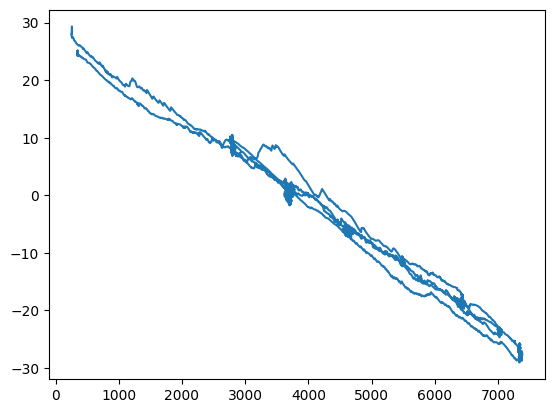

In [5]:

import matplotlib.pyplot as plt

plt.plot(data_v2['pres_alt'], data_v2['air_temp'])

In [19]:
import pandas as pd
import numpy as np


# CIP
file_path = '/work/bb1163/b382718/output/mc3e/observations/aircraft_optical_probe_data/GHRC_DATA/20110511_154612.CIP.1Hz'
data_cip = pd.read_csv(file_path, sep='\s+', header=None, skiprows=40)

data_cip.columns = ['time','Nt_perm3','iwc_gperm3']+ ['Nt_perm4'] * (data_cip.shape[1] - 3)

# HVPS
file_path = '/work/bb1163/b382718/output/mc3e/observations/aircraft_optical_probe_data/GHRC_DATA/20110511_154612.HVPS3.1Hz'
data_hvps = pd.read_csv(file_path, sep='\s+', header=None, skiprows=40)

data_hvps.columns = ['time','Nt_perm3','iwc_gperm3']+ ['Nt_perm4'] * (data_hvps.shape[1] - 3)

# Flight data
file_path = '/work/bb1163/b382718/output/mc3e/observations/aircraft_optical_probe_data/GHRC_DATA/2011_05_11_15_46_09_v2.mc3e'
data_v2 = pd.read_csv(file_path, sep='\s+', header=None, skiprows=63)

data_v2.columns = ['time', 'air_temp', 'machno', 'ias', 'tas', 
                   'pres_alt', 'pot_temp', 'pitot_wing', 'cabin_pres', 'static_pr',
                   'dewpt', 'mix_ratio', 'dew_point', 'frost_point', 'pos_roll', 
                   'pos_pitch', 'pos_head', 'posz_acc', 'pos_lat', 'pos_lon',
                   'pos_alt', 'pos_spd', 'pos_trk', 'alpha', 'beta', 
                   'wind_z', 'vert_vel', 'wind_m', 'wind_d', 'turb',
                   'lwc_king', 'twc_nev', 'lwc_nev', 'conc_cdp', 'lwc_cdp', 
                   'cdp_meanD', 'cdp_volD', 'cdp_effrad', 'conc_2dc', '2dc_meanD',
                   '2dc_volD', '2dc_effrad', 'icemsofreq', 'cpc_conc', 'tsg_gate']

data_v2['time'] = data_v2['time'].astype(int)
# sum cip concentration over all diameter bins

diam_cip_end_bin  = [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 
                     475.0, 550.0, 625.0, 700.0, 800.0, 900.0, 1000.0, 1200.0,
                     1400.0, 1600.0, 1800.0, 2000.0];

diam_hvps_end_bin = [200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0,
                    2200.0, 2600.0, 3000.0, 3400.0, 3800.0, 4200.0, 4600.0, 5000.0, 6000.0,  
                    7000.0, 8000.0, 9000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0,
                    20000.0, 25000.0, 30000.0]

diam_cip_width = np.diff(diam_cip_end_bin)*1.e-6 # µm to m
diam_hvps_width = np.diff(diam_hvps_end_bin)*1.e-6 # µm to m

diam_cip_width = np.array(diam_cip_width)
diam_hvps_width = np.array(diam_hvps_width)

diam_cip_end_bin = np.array(diam_cip_end_bin)
diam_hvps_end_bin = np.array(diam_hvps_end_bin)


print(diam_cip_width.shape, diam_hvps_width.shape)

## TINC
nt_cip_perm4 = data_cip.iloc[:, 3:].values
nt_hvps_perm4 = data_hvps.iloc[:, 3:].values

cip_mask = (nt_cip_perm4 != 9.99e+30) & (nt_cip_perm4 != 0.0)
hvps_mask = (nt_hvps_perm4 != 9.99e+30) & (nt_hvps_perm4 != 0.0)
#nice_perm3 = np.where(cip_mask & (diam_cip_end_bin[:-1] > 2.e-4), nt_perm4 * diam_cip_width, 0)

diam200_cip_mask = diam_cip_end_bin[:-1] > 2.e-4
diam200_hvps_mask = diam_hvps_end_bin[:-1] > 2.e-4

# Broadcast the masks across time (rows)
nice200_cip_perm3 = np.where(cip_mask & diam200_cip_mask[np.newaxis, :], nt_cip_perm4 * diam_cip_width[np.newaxis, :], np.nan)
nice200_hvps_perm3 = np.where(hvps_mask & diam200_hvps_mask[np.newaxis, :], nt_hvps_perm4 * diam_hvps_width[np.newaxis, :], np.nan)

#nice_cip_perm3 = np.where(cip_mask & (diam_cip_end_bin[:-1] > 2.e-4), nt_cip_perm4 * diam_cip_width, np.nan)
#nice_hvps_perm3 = np.where(cip_mask & (diam_hvps_end_bin[:-1] > 2.e-4), nt_hvps_perm4 * diam_hvps_width, np.nan)

#nice_cip_perm3 = np.where(cip_mask, nt_cip_perm4 * diam_cip_width, np.nan)  # basically considering all particles from 50 to 2000 µm
#nice_hvps_perm3 = np.where(hvps_mask, nt_hvps_perm4 * diam_hvps_width, np.nan)  # basically considering all particles from 200 to 30000 µm

nice200_cip_perm3 = np.nansum(nice200_cip_perm3, axis=1)
nice200_hvps_perm3 = np.nansum(nice200_hvps_perm3, axis=1)
#valid_rows = np.any(cip_mask, axis=1)
#valid_times = data_cip.loc[valid_rows, 'time']
#print(valid_times.values)
##non_zero_values = nice_perm3[nice_perm3 != 0.]
#non_nan_values = nice_perm3[~np.isnan(nice_perm3)]
#print(non_nan_values)

# IWC
iwc_cip_gperm3 = data_cip.iwc_gperm3
iwc_hvps_gperm3 = data_hvps.iwc_gperm3

cip_mask = (iwc_cip_gperm3 != 9.99e+30) & (iwc_cip_gperm3 != 0.0)
hvps_mask = (iwc_hvps_gperm3 != 9.99e+30) & (iwc_hvps_gperm3 != 0.0)

iwc_cip_gperm3 = np.where(cip_mask, iwc_cip_gperm3, np.nan)  
iwc_hvps_gperm3 = np.where(hvps_mask, iwc_hvps_gperm3, np.nan)  



data_cip['nice_cip_perm3'] = nice200_cip_perm3
data_cip['nice_cip_perl'] = 1.e-3*nice200_cip_perm3

data_hvps['nice_hvps_perm3'] = nice200_hvps_perm3
data_hvps['nice_hvps_perl'] = 1.e-3*nice200_hvps_perm3

data_cip['iwc_cip_gperm3'] = iwc_cip_gperm3
data_hvps['iwc_hvps_gperm3'] = iwc_hvps_gperm3


data_cip_new = data_cip.drop(columns=['Nt_perm4'])  # no need of 19 (conc in each bin) columns, drop it
data_hvps_new = data_hvps.drop(columns=['Nt_perm4'])  # no need of 19 (conc in each bin) columns, drop it 

data_cip_new = data_cip.drop(columns=['iwc_gperm3'])  
data_hvps_new = data_hvps.drop(columns=['iwc_gperm3'])

ds_v2_cip_comb = pd.merge(data_v2, data_cip_new, on='time', how='inner')
ds_v2_hvps_comb = pd.merge(data_v2, data_hvps_new, on='time', how='inner')

# TINC
ds_v2_cip_comb['nice_cip_up_perl'] = np.where((ds_v2_cip_comb.nice_cip_perl > 0.) & (ds_v2_cip_comb.vert_vel > 2.), ds_v2_cip_comb.nice_cip_perl, np.nan)
ds_v2_cip_comb['nice_cip_dn_perl'] = np.where((ds_v2_cip_comb.nice_cip_perl > 0.) & (ds_v2_cip_comb.vert_vel < -2.), ds_v2_cip_comb.nice_cip_perl, np.nan)
ds_v2_cip_comb['nice_cip_st_perl'] = np.where((ds_v2_cip_comb.nice_cip_perl > 0.) & (np.abs(ds_v2_cip_comb.vert_vel) < 2.), ds_v2_cip_comb.nice_cip_perl, np.nan)

ds_v2_hvps_comb['nice_hvps_up_perl'] = np.where((ds_v2_hvps_comb.nice_hvps_perl > 0.) & (ds_v2_hvps_comb.vert_vel > 2.), ds_v2_hvps_comb.nice_hvps_perl, np.nan)
ds_v2_hvps_comb['nice_hvps_dn_perl'] = np.where((ds_v2_hvps_comb.nice_hvps_perl > 0.) & (ds_v2_hvps_comb.vert_vel < -2.), ds_v2_hvps_comb.nice_hvps_perl, np.nan)
ds_v2_hvps_comb['nice_hvps_st_perl'] = np.where((ds_v2_hvps_comb.nice_hvps_perl > 0.) & (np.abs(ds_v2_hvps_comb.vert_vel) < 2.), ds_v2_hvps_comb.nice_hvps_perl, np.nan)

# IWC
ds_v2_cip_comb['iwc_cip_up_gperm3'] = np.where((ds_v2_cip_comb.iwc_cip_gperm3 > 0.) & (ds_v2_cip_comb.vert_vel > 2.), 
                                               ds_v2_cip_comb.iwc_cip_gperm3, np.nan)
ds_v2_cip_comb['iwc_cip_dn_gperm3'] = np.where((ds_v2_cip_comb.iwc_cip_gperm3 > 0.) & (ds_v2_cip_comb.vert_vel < -2.), 
                                               ds_v2_cip_comb.iwc_cip_gperm3, np.nan)
ds_v2_cip_comb['iwc_cip_st_gperm3'] = np.where((ds_v2_cip_comb.iwc_cip_gperm3 > 0.) & (np.abs(ds_v2_cip_comb.vert_vel) < 2.), 
                                               ds_v2_cip_comb.iwc_cip_gperm3, np.nan)

ds_v2_hvps_comb['iwc_hvps_up_gperm3'] = np.where((ds_v2_hvps_comb.iwc_hvps_gperm3 > 0.) & (ds_v2_hvps_comb.vert_vel > 2.), 
                                               ds_v2_hvps_comb.iwc_hvps_gperm3, np.nan)
ds_v2_hvps_comb['iwc_hvps_dn_gperm3'] = np.where((ds_v2_hvps_comb.iwc_hvps_gperm3 > 0.) & (ds_v2_hvps_comb.vert_vel < -2.), 
                                               ds_v2_hvps_comb.iwc_hvps_gperm3, np.nan)
ds_v2_hvps_comb['iwc_hvps_st_gperm3'] = np.where((ds_v2_hvps_comb.iwc_hvps_gperm3 > 0.) & (np.abs(ds_v2_hvps_comb.vert_vel) < 2.), 
                                               ds_v2_hvps_comb.iwc_hvps_gperm3, np.nan)

# CDNC

ds_v2_hvps_comb['cdnc_cdp_up_percm3'] = np.where((ds_v2_hvps_comb.lwc_cdp > 1.e-6)  & (ds_v2_hvps_comb.conc_cdp > 1.) & 
                                                 (ds_v2_hvps_comb.vert_vel > 2.),  ds_v2_hvps_comb.conc_cdp, np.nan)
ds_v2_hvps_comb['cdnc_cdp_dn_percm3'] = np.where((ds_v2_hvps_comb.lwc_cdp > 1.e-6)  & (ds_v2_hvps_comb.conc_cdp > 1.) & 
                                                 (ds_v2_hvps_comb.vert_vel < -2.), ds_v2_hvps_comb.conc_cdp, np.nan)
ds_v2_hvps_comb['cdnc_cdp_st_percm3'] = np.where((ds_v2_hvps_comb.lwc_cdp > 1.e-6)  & (ds_v2_hvps_comb.conc_cdp > 1.) & 
                                                 (np.abs(ds_v2_hvps_comb.vert_vel) < 2.), ds_v2_hvps_comb.conc_cdp, np.nan)


#ds_v2_hvps_comb['cdnc_cdp_up_percm3'] = np.where((ds_v2_hvps_comb.conc_cdp > 100.) & 
#                                                 (ds_v2_hvps_comb.vert_vel > 2.),  ds_v2_hvps_comb.conc_cdp, np.nan)
#ds_v2_hvps_comb['cdnc_cdp_dn_percm3'] = np.where((ds_v2_hvps_comb.conc_cdp > 100.) & 
#                                                 (ds_v2_hvps_comb.vert_vel < -2.), ds_v2_hvps_comb.conc_cdp, np.nan)
#ds_v2_hvps_comb['cdnc_cdp_st_percm3'] = np.where((ds_v2_hvps_comb.conc_cdp > 100.) & 
#                                                 (np.abs(ds_v2_hvps_comb.vert_vel) < 2.), ds_v2_hvps_comb.conc_cdp, np.nan)

#ds_v2_hvps_comb['cdnc_cdp_up_percm3'] = np.where((ds_v2_hvps_comb.conc_cdp > 5.) & (ds_v2_hvps_comb.vert_vel > 2.), ds_v2_hvps_comb.conc_cdp, np.nan)
#ds_v2_hvps_comb['cdnc_cdp_dn_percm3'] = np.where((ds_v2_hvps_comb.conc_cdp > 5.) & (ds_v2_hvps_comb.vert_vel < -2.), ds_v2_hvps_comb.conc_cdp, np.nan)
#ds_v2_hvps_comb['cdnc_cdp_st_percm3'] = np.where((ds_v2_hvps_comb.conc_cdp > 5.) & (np.abs(ds_v2_hvps_comb.vert_vel) < 2.), ds_v2_hvps_comb.conc_cdp, np.nan)



# LWC
ds_v2_hvps_comb['lwc_cdp_up_gperm3'] = np.where((ds_v2_hvps_comb.lwc_cdp > 1.e-4) & (ds_v2_hvps_comb.vert_vel > 2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_cdp, np.nan)
ds_v2_hvps_comb['lwc_cdp_dn_gperm3'] = np.where((ds_v2_hvps_comb.lwc_cdp > 1.e-4) & (ds_v2_hvps_comb.vert_vel < -2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_cdp, np.nan)
ds_v2_hvps_comb['lwc_cdp_st_gperm3'] = np.where((ds_v2_hvps_comb.lwc_cdp > 1.e-4) & (np.abs(ds_v2_hvps_comb.vert_vel) < 2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_cdp, np.nan)

ds_v2_hvps_comb['lwc_king_up_gperm3'] = np.where((ds_v2_hvps_comb.lwc_king > 1.e-6) & (ds_v2_hvps_comb.vert_vel > 2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_king, np.nan)
ds_v2_hvps_comb['lwc_king_dn_gperm3'] = np.where((ds_v2_hvps_comb.lwc_king > 1.e-6) & (ds_v2_hvps_comb.vert_vel < -2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_king, np.nan)
ds_v2_hvps_comb['lwc_king_st_gperm3'] = np.where((ds_v2_hvps_comb.lwc_king > 1.e-6) & (np.abs(ds_v2_hvps_comb.vert_vel) < 2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_king, np.nan)

ds_v2_hvps_comb['lwc_nev_up_gperm3'] = np.where((ds_v2_hvps_comb.lwc_nev > 1.e-6) & (ds_v2_hvps_comb.vert_vel > 2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_nev, np.nan)
ds_v2_hvps_comb['lwc_nev_dn_gperm3'] = np.where((ds_v2_hvps_comb.lwc_nev > 1.e-6) & (ds_v2_hvps_comb.vert_vel < -2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_nev, np.nan)
ds_v2_hvps_comb['lwc_nev_st_gperm3'] = np.where((ds_v2_hvps_comb.lwc_nev > 1.e-6) & (np.abs(ds_v2_hvps_comb.vert_vel) < 2.) & (ds_v2_hvps_comb.conc_cdp > 5.), 
                                                ds_v2_hvps_comb.lwc_nev, np.nan)


# make a plot using seaborn
#temp_bin = np.array([0., -4., -8., -12., -16., -20., -24., -28., -32.])
#temp_bin = np.array([0., -3., -6., -9., -12., -15., -18., -21., -24., -27., -30.])
temp_bin = np.arange(-30, 20, 5)
temp_bin = np.sort(temp_bin)

temp_cdp_bin = np.arange(-30, 20, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)


ds_v2_cip_comb['temp_bin'] = pd.cut(ds_v2_cip_comb['air_temp'], bins=np.append(temp_bin, np.inf), labels=temp_bin)
ds_v2_hvps_comb['temp_bin'] = pd.cut(ds_v2_hvps_comb['air_temp'], bins=np.append(temp_bin, np.inf), labels=temp_bin)
ds_v2_hvps_comb['temp_bin'] = pd.cut(ds_v2_hvps_comb['air_temp'], bins=np.append(temp_bin, np.inf), labels=temp_bin)
ds_v2_hvps_comb['temp_bin'] = pd.cut(ds_v2_hvps_comb['air_temp'], bins=np.append(temp_bin, np.inf), labels=temp_bin)

# Merge temperature bins into CIP dataset
ds_v2_cip_comb = ds_v2_cip_comb.copy()
#data_cip_new['temp_bin'] = data_v2_new['temp_bin'].values

# Remove NaN values (cases where no temperature bin was assigned)
ds_v2_cip_comb = ds_v2_cip_comb.dropna(subset=['temp_bin'])
ds_v2_hvps_comb = ds_v2_hvps_comb.dropna(subset=['temp_bin'])

# Convert bin labels to numeric for proper sorting
ds_v2_cip_comb['temp_bin'] = ds_v2_cip_comb['temp_bin'].astype(float)
ds_v2_hvps_comb['temp_bin'] = ds_v2_hvps_comb['temp_bin'].astype(float)


(19,) (28,)


In [ ]:
from datetime import datetime, timedelta

# Condition: tempc between -6 and -5
condition = (ds_v2_cip_comb['air_temp'] > -8) & (ds_v2_cip_comb['air_temp'] < -3)
filtered_df = ds_v2_cip_comb[condition]

# Print results
#for t, temp in zip(filtered_df['time'], filtered_df['air_temp']):
#    print(f"Time: {t}, TempC: {temp}")

for seconds, temp in zip(filtered_df['time'], filtered_df['air_temp']):
    # Convert seconds to time of day
    time_obj = (datetime(1970, 1, 1) + timedelta(seconds=seconds)).time()
    hhmmss = time_obj.strftime("%H:%M:%S")
    print(f"Time(sec) ({seconds}), Time ({hhmmss}), TempC: {temp}")

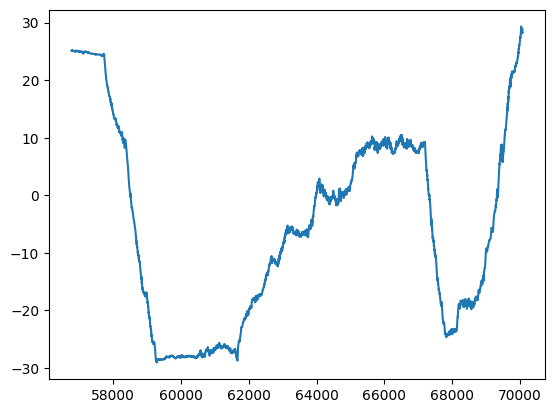

In [63]:
plt.plot(ds_v2_cip_comb.time, ds_v2_cip_comb.air_temp)

In [20]:
# Count of datapoints per bin (not averaged values)
counts_per_bin = ds_v2_hvps_comb.groupby('temp_bin')['lwc_cdp'].count()

# Mean LWC per bin (this is the average)
mean_per_bin = ds_v2_hvps_comb.groupby('temp_bin')['lwc_cdp'].mean()

print(counts_per_bin)#, mean_per_bin)

temp_bin
-30.0    2579
-25.0     839
-20.0    1499
-15.0     783
-10.0    1318
-5.0      852
 0.0      930
 5.0     2373
 10.0     388
 15.0    1203
Name: lwc_cdp, dtype: int64


In [21]:
valid_cip_up = ds_v2_cip_comb[
    ds_v2_cip_comb['nice_cip_up_perl'].notna() & (ds_v2_cip_comb['nice_cip_up_perl'] > 0)
]
cip_up_counts_per_bin = valid_cip_up.groupby('temp_bin')['nice_cip_up_perl'].count()

print(cip_up_counts_per_bin)

temp_bin
-30.0    199
-20.0     71
-15.0     18
-10.0     34
-5.0       9
 0.0      12
 5.0       2
 10.0      4
 15.0      2
Name: nice_cip_up_perl, dtype: int64


In [151]:
cip_up_counts_per_bin = ds_v2_cip_comb.groupby('temp_bin')['nice_cip_up_perl'].count()
print(cip_up_counts_per_bin)


temp_bin
-30.0    199
-25.0      0
-20.0     71
-15.0     18
-10.0     34
-5.0       9
 0.0      12
 5.0       2
 10.0      4
 15.0      2
Name: nice_cip_up_perl, dtype: int64


In [27]:
ds_v2_cip_comb

time  air_temp  machno      ias      tas  pres_alt  pot_temp  \
0      56772   25.1355  0.0434  14.4728  15.0388  349.7487  300.7266   
1      56773   25.1581  0.0390  12.9900  13.4981  349.6183  300.7480   
2      56774   25.1589  0.0399  13.3010  13.8215  349.6183  300.7489   
3      56775   25.1505  0.0414  13.8115  14.3517  349.5639  300.7398   
4      56776   25.1561  0.0419  13.9743  14.5212  349.8140  300.7481   
...      ...       ...     ...      ...      ...       ...       ...   
13262  70071   28.2056  0.0980  32.8173  34.0927  260.4405  302.8963   
13263  70072   28.2039  0.0986  33.0430  34.3283  261.0656  302.9010   
13264  70073   28.4452  0.0995  33.3400  34.6502  260.7854  303.1407   
13265  70074   28.7045  0.1001  33.5438  34.8769  260.7638  303.4011   
13266  70075   28.8209  0.0972  32.5731  33.8740  260.6560  303.5169   

       pitot_wing  cabin_pres  static_pr  ...  nice_cip_perm3  nice_cip_perl  \
0          1.4838    973.4998   971.8911  ...             0.0            0.0   
1          1.4775    973.4090   971.9063  ...             0.0            0.0   
2          1.3650    973.4679   971.9063  ...             0.0            0.0   
3          1.4623    973.3973   971.9126  ...             0.0            0.0   
4          1.4908    973.4662   971.8835  ...             0.0            0.0   
...           ...         ...        ...  ...             ...            ...   
13262      3.0694    983.9986   982.3197  ...             0.0            0.0   
13263      3.1054    983.9852   982.2463  ...             0.0            0.0   
13264      2.9492    983.9180   982.2792  ...             0.0            0.0   
13265      2.8468    983.8154   982.2817  ...             0.0            0.0   
13266      2.6790    983.8221   982.2944  ...             0.0            0.0   

       iwc_cip_gperm3  nice_cip_up_perl  nice_cip_dn_perl  nice_cip_st_perl  \
0                 NaN               NaN               NaN               NaN   
1                 NaN               NaN               NaN               NaN   
2                 NaN               NaN               NaN               NaN   
3                 NaN               NaN               NaN               NaN   
4                 NaN               NaN               NaN               NaN   
...               ...               ...               ...               ...   
13262             NaN               NaN               NaN               NaN   
13263             NaN               NaN               NaN               NaN   
13264             NaN               NaN               NaN               NaN   
13265             NaN               NaN               NaN               NaN   
13266             NaN               NaN               NaN               NaN   

       iwc_cip_up_gperm3  iwc_cip_dn_gperm3  iwc_cip_st_gperm3  temp_bin  
0                    NaN                NaN                NaN      15.0  
1                    NaN                NaN                NaN      15.0  
2                    NaN                NaN                NaN      15.0  
3                    NaN                NaN                NaN      15.0  
4                    NaN                NaN                NaN      15.0  
...                  ...                ...                ...       ...  
13262                NaN                NaN                NaN      15.0  
13263                NaN                NaN                NaN      15.0  
13264                NaN                NaN                NaN      15.0  
13265                NaN                NaN                NaN      15.0  
13266                NaN                NaN                NaN      15.0  

[13267 rows x 75 columns]

In [32]:

print(temp_cip_bin.shape)
print(df_v2_hvps_comb['temp_bin'].shape)
print(bin_edges.shape)
ds_filt

(10,)
(12764,)
(11,)


<xarray.Dataset> Size: 2GB
Dimensions:             (time: 15, ncells: 3498, vertices: 3, height: 65,
                         bnds: 2, plev: 1, plev_2: 1, plev_3: 1, height_2: 66)
Coordinates:
  * time                (time) datetime64[ns] 120B 2011-05-11T17:00:00 ... 20...
    clon                (ncells) float64 28kB dask.array<chunksize=(3498,), meta=np.ndarray>
    clat                (ncells) float64 28kB dask.array<chunksize=(3498,), meta=np.ndarray>
  * height              (height) float64 520B 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0
  * height_2            (height_2) float64 528B 1.0 2.0 3.0 ... 64.0 65.0 66.0
  * plev                (plev) float64 8B 800.0
  * plev_2              (plev_2) float64 8B 400.0
  * plev_3              (plev_3) float64 8B 0.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/145)
    clon_bnds           (time, ncells, vertices) float64 1MB dask.array<chunksize=(1, 3498, 3), meta=np.ndarray>
    clat_bnds           (time, ncells, vertices) float64 1MB dask.array<chunksize=(1, 3498, 3), meta=np.ndarray>
    height_bnds         (time, height, bnds) float64 16kB dask.array<chunksize=(1, 65, 2), meta=np.ndarray>
    plev_bnds           (time, plev, bnds) float64 240B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds         (time, plev_2, bnds) float64 240B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds         (time, plev_3, bnds) float64 240B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    ...                  ...
    tqi                 (time, height, ncells) float32 14MB dask.array<chunksize=(1, 65, 3498), meta=np.ndarray>
    tq                  (time, height, ncells) float32 14MB dask.array<chunksize=(1, 65, 3498), meta=np.ndarray>
    ciwc_gperm3         (time, height, ncells) float32 14MB dask.array<chunksize=(1, 65, 3498), meta=np.ndarray>
    tiwc_gperm3         (time, height, ncells) float32 14MB dask.array<chunksize=(1, 65, 3498), meta=np.ndarray>
    cdnc_percm3         (time, height, ncells) float32 14MB dask.array<chunksize=(1, 65, 3498), meta=np.ndarray>
    inc_perl            (time, height, ncells) float32 14MB dask.array<chunksize=(1, 65, 3498), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          80920308-f3cb-c098-7b6f-c89470832760
    uuidOfVGrid:          7ceafb02-370a-0d33-daef-c18475332e40
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               version: 2024.10; revision: 6f8e58b4040c0905b72f63e...
    history:              /home/b/b382718/continental_cases/phil_ds_julian/ic...
    references:           see MPIM/DWD publications
    comment:              Deepak Waman (b382718) on l20340 (Linux 4.18.0-513....

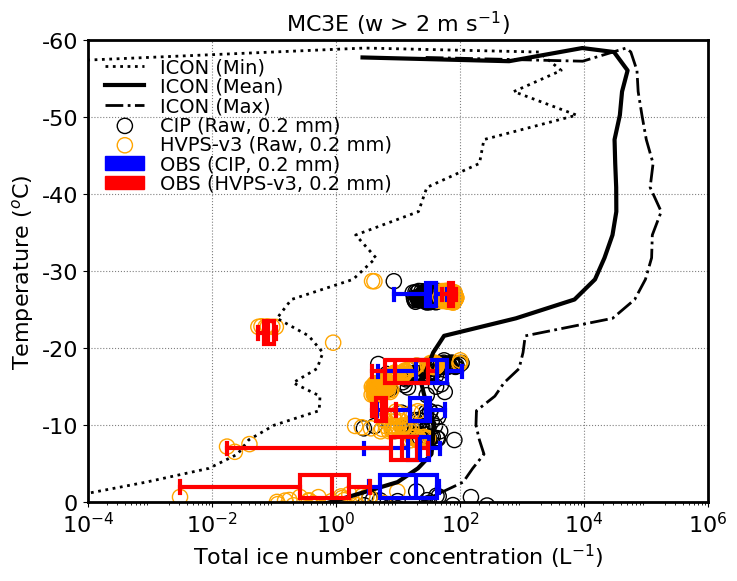

In [37]:

## ============== ICON
w_thres = 2.
thres_q = 1.e-6
###### Without SIP

inc_4sip_up_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
median_inc_4sip_up_perl = inc_4sip_up_perl.median(dim=('time','ncells'))
mean_inc_4sip_up_perl = inc_4sip_up_perl.mean(dim=('time','ncells'))
min_inc_4sip_up_perl = inc_4sip_up_perl.min(dim=('time','ncells'))
max_inc_4sip_up_perl = inc_4sip_up_perl.max(dim=('time','ncells'))
avg_4sip_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_inc_4sip_up_perl = inc_4sip_up_perl.std(dim=('time', 'ncells'), skipna=True)
count_inc_4sip_up_perl = inc_4sip_up_perl.count(dim=('time', 'ncells'))
se_inc_4sip_up_perl = std_inc_4sip_up_perl / np.sqrt(count_inc_4sip_up_perl)


inc_nosip_up_perl = xr.where((ds_nosip_new.inc_perl > thres_q) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.inc_perl, np.nan)
median_inc_nosip_up_perl = inc_nosip_up_perl.median(dim=('time','ncells'))
mean_inc_nosip_up_perl = inc_nosip_up_perl.mean(dim=('time','ncells'))
min_inc_nosip_up_perl = inc_nosip_up_perl.min(dim=('time','ncells'))
max_inc_nosip_up_perl = inc_nosip_up_perl.max(dim=('time','ncells'))
avg_nosip_tempc = ds_nosip_new.tempc.mean(dim=('time','ncells')) 

std_inc_nosip_up_perl = inc_nosip_up_perl.std(dim=('time', 'ncells'), skipna=True)
count_inc_nosip_up_perl = inc_nosip_up_perl.count(dim=('time', 'ncells'))
se_inc_nosip_up_perl = std_inc_nosip_up_perl / np.sqrt(count_inc_nosip_up_perl)
## ================

# lwc gperm3
inc_sip_up_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
median_inc_sip_up_perl = inc_sip_up_perl.median(dim=('time','ncells'))
mean_inc_sip_up_perl = inc_sip_up_perl.mean(dim=('time','ncells'))
min_inc_sip_up_perl = inc_sip_up_perl.min(dim=('time','ncells'))
max_inc_sip_up_perl = inc_sip_up_perl.max(dim=('time','ncells'))
avg_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_inc_sip_up_perl = inc_sip_up_perl.std(dim=('time', 'ncells'), skipna=True)
count_inc_sip_up_perl = inc_sip_up_perl.count(dim=('time', 'ncells'))
se_inc_sip_up_perl = std_inc_sip_up_perl / np.sqrt(count_inc_sip_up_perl)


## ================

## ================

# CIP
df_v2_cip_comb = pd.DataFrame(ds_v2_cip_comb)
df_v2_cip_comb['tempc'] = df_v2_cip_comb['air_temp']

temp_cip_bin = np.arange(-30, 20, 5)

temp_cip_bin = np.sort(temp_cip_bin)

df_v2_cip_comb['temp_cip_bin'] = np.digitize(df_v2_cip_comb['tempc'], bins=temp_cip_bin, right=False)

bin_edges = np.concatenate([temp_cip_bin - 2, [temp_cip_bin[-1] + 2]])  
df_v2_cip_comb['temp_bin'] = bin_edges[df_v2_cip_comb['temp_cip_bin']]

# HVPS
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)
df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

temp_hvps_bin = np.arange(-30, 20, 5)
temp_hvps_bin = np.sort(temp_hvps_bin)
df_v2_hvps_comb['temp_hvps_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_hvps_bin, right=False)

bin_edges = np.concatenate([temp_hvps_bin - 2, [temp_hvps_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_hvps_bin']]


### TINC
# CIP
df_nice_up_cip = df_v2_cip_comb[['nice_cip_up_perl', 'temp_bin']].dropna()
df_nice_up_cip = df_nice_up_cip.dropna(subset=['temp_bin'])
nice_cip_up_by_bin = [df_nice_up_cip[df_nice_up_cip['temp_bin'] == temp]['nice_cip_up_perl'].values for temp in bin_edges]

# HVPS
df_nice_up_hvps = df_v2_hvps_comb[['nice_hvps_up_perl', 'temp_bin']].dropna()
df_nice_up_hvps = df_nice_up_hvps.dropna(subset=['temp_bin'])
nice_hvps_up_by_bin = [df_nice_up_hvps[df_nice_up_hvps['temp_bin'] == temp]['nice_hvps_up_perl'].values for temp in bin_edges]


fnt=16;
ln=3;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3

plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))
##ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
#ax.plot(median_inc_4sip_up_perl, avg_tempc, 'k--', linewidth=ln-1, label='ICON (Median)');
#ax.plot(mean_inc_4sip_up_perl, avg_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
#ax.plot(max_inc_4sip_up_perl, avg_tempc, 'k:', linewidth=ln-1, label='ICON (Max)');

#ax.plot(mean_inc_4sip_up_perl, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (SIP)');
#ax.plot(mean_inc_nosip_up_perl, avg_nosip_tempc, 'k--', linewidth=ln, label='ICON (No SIP)');


ax.plot(min_inc_4sip_up_perl, avg_4sip_tempc, 'k:', linewidth=ln-1, label='ICON (Min)');
ax.plot(mean_inc_4sip_up_perl, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
ax.plot(max_inc_4sip_up_perl, avg_4sip_tempc, 'k-.', linewidth=ln-1, label='ICON (Max)');


ax.scatter(ds_v2_cip_comb['nice_cip_up_perl'], ds_v2_cip_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='k', alpha=al1, label='CIP (Raw, 0.2 mm)')
ax.scatter(ds_v2_hvps_comb['nice_hvps_up_perl'], ds_v2_hvps_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='orange', alpha=al1, label='HVPS-v3 (Raw, 0.2 mm)')

#ax.boxplot(inc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True, widths=wd,
#            boxprops=dict(facecolor='none', edgecolor='black', linewidth=ln1, alpha=al1),
#            medianprops=dict(color='black', linewidth=ln1),
#            whiskerprops=dict(linewidth=ln1, color='black', alpha=al1),
#            capprops=dict(linewidth=ln1, color='black', alpha=al1), showfliers=False);

ax.boxplot(nice_cip_up_by_bin[:], positions=bin_edges[:], vert=False, patch_artist=True, widths=wd,
           boxprops=dict(facecolor='none', edgecolor='blue', linewidth=ln1, alpha=al2),
           medianprops=dict(color='blue', linewidth=ln1),
           whiskerprops=dict(linewidth=ln1, color='blue', alpha=al2),
           capprops=dict(linewidth=ln1, color='blue', alpha=al2), showfliers=False)
        
ax.boxplot(nice_hvps_up_by_bin[:], positions=bin_edges[:], vert=False, patch_artist=True, widths=wd,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=ln1, alpha=al2),  
            medianprops=dict(color='red', linewidth=ln1), whiskerprops=dict(linewidth=ln1, color='red', alpha=al2),  
            capprops=dict(linewidth=ln1, color='red', alpha=al2), showfliers=False)

# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-4, 1.e6)
ax.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(0, -60)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([0, -10, -20, -30, -40, -50, -60])
ax.set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CIP, 0.2 mm)')
obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS-v3, 0.2 mm)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles + [obs_cip_patch, obs_hvps_patch], frameon=False, labelspacing=0.02, loc='best', fontsize=fnt-2)

# Customize axis spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_linewidth(2)
#ax.spines['bottom'].set_linewidth(2)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
plt.show()


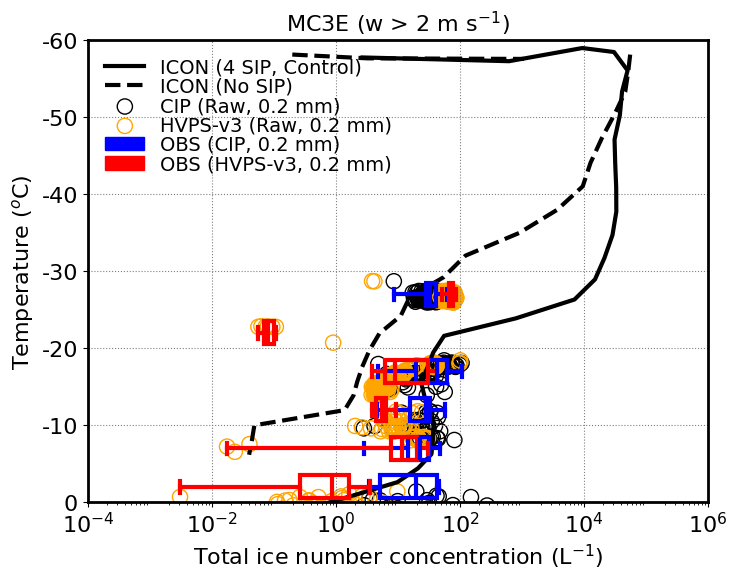

In [38]:

## ============== ICON
w_thres = 2.
thres_q = 1.e-6
###### Without SIP

inc_4sip_up_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
median_inc_4sip_up_perl = inc_4sip_up_perl.median(dim=('time','ncells'))
mean_inc_4sip_up_perl = inc_4sip_up_perl.mean(dim=('time','ncells'))
min_inc_4sip_up_perl = inc_4sip_up_perl.min(dim=('time','ncells'))
max_inc_4sip_up_perl = inc_4sip_up_perl.max(dim=('time','ncells'))
avg_4sip_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_inc_4sip_up_perl = inc_4sip_up_perl.std(dim=('time', 'ncells'), skipna=True)
count_inc_4sip_up_perl = inc_4sip_up_perl.count(dim=('time', 'ncells'))
se_inc_4sip_up_perl = std_inc_4sip_up_perl / np.sqrt(count_inc_4sip_up_perl)


inc_nosip_up_perl = xr.where((ds_nosip_new.inc_perl > thres_q) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.inc_perl, np.nan)
median_inc_nosip_up_perl = inc_nosip_up_perl.median(dim=('time','ncells'))
mean_inc_nosip_up_perl = inc_nosip_up_perl.mean(dim=('time','ncells'))
min_inc_nosip_up_perl = inc_nosip_up_perl.min(dim=('time','ncells'))
max_inc_nosip_up_perl = inc_nosip_up_perl.max(dim=('time','ncells'))
avg_nosip_tempc = ds_nosip_new.tempc.mean(dim=('time','ncells')) 

std_inc_nosip_up_perl = inc_nosip_up_perl.std(dim=('time', 'ncells'), skipna=True)
count_inc_nosip_up_perl = inc_nosip_up_perl.count(dim=('time', 'ncells'))
se_inc_nosip_up_perl = std_inc_nosip_up_perl / np.sqrt(count_inc_nosip_up_perl)
## ================

# lwc gperm3
inc_sip_up_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
median_inc_sip_up_perl = inc_sip_up_perl.median(dim=('time','ncells'))
mean_inc_sip_up_perl = inc_sip_up_perl.mean(dim=('time','ncells'))
min_inc_sip_up_perl = inc_sip_up_perl.min(dim=('time','ncells'))
max_inc_sip_up_perl = inc_sip_up_perl.max(dim=('time','ncells'))
avg_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_inc_sip_up_perl = inc_sip_up_perl.std(dim=('time', 'ncells'), skipna=True)
count_inc_sip_up_perl = inc_sip_up_perl.count(dim=('time', 'ncells'))
se_inc_sip_up_perl = std_inc_sip_up_perl / np.sqrt(count_inc_sip_up_perl)


## ================

## ================

# CIP
df_v2_cip_comb = pd.DataFrame(ds_v2_cip_comb)
df_v2_cip_comb['tempc'] = df_v2_cip_comb['air_temp']

temp_cip_bin = np.arange(-30, 20, 5)

temp_cip_bin = np.sort(temp_cip_bin)

df_v2_cip_comb['temp_cip_bin'] = np.digitize(df_v2_cip_comb['tempc'], bins=temp_cip_bin, right=False)

bin_edges = np.concatenate([temp_cip_bin - 2, [temp_cip_bin[-1] + 2]])  
df_v2_cip_comb['temp_bin'] = bin_edges[df_v2_cip_comb['temp_cip_bin']]

# HVPS
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)
df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

temp_hvps_bin = np.arange(-30, 20, 5)
temp_hvps_bin = np.sort(temp_hvps_bin)
df_v2_hvps_comb['temp_hvps_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_hvps_bin, right=False)

bin_edges = np.concatenate([temp_hvps_bin - 2, [temp_hvps_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_hvps_bin']]


### TINC
# CIP
df_nice_up_cip = df_v2_cip_comb[['nice_cip_up_perl', 'temp_bin']].dropna()
df_nice_up_cip = df_nice_up_cip.dropna(subset=['temp_bin'])
nice_cip_up_by_bin = [df_nice_up_cip[df_nice_up_cip['temp_bin'] == temp]['nice_cip_up_perl'].values for temp in bin_edges]

# HVPS
df_nice_up_hvps = df_v2_hvps_comb[['nice_hvps_up_perl', 'temp_bin']].dropna()
df_nice_up_hvps = df_nice_up_hvps.dropna(subset=['temp_bin'])
nice_hvps_up_by_bin = [df_nice_up_hvps[df_nice_up_hvps['temp_bin'] == temp]['nice_hvps_up_perl'].values for temp in bin_edges]


fnt=16;
ln=3;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3

plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))
##ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
#ax.plot(median_inc_4sip_up_perl, avg_tempc, 'k--', linewidth=ln-1, label='ICON (Median)');
#ax.plot(mean_inc_4sip_up_perl, avg_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
#ax.plot(max_inc_4sip_up_perl, avg_tempc, 'k:', linewidth=ln-1, label='ICON (Max)');

#ax.plot(mean_inc_4sip_up_perl, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (SIP)');
#ax.plot(mean_inc_nosip_up_perl, avg_nosip_tempc, 'k--', linewidth=ln, label='ICON (No SIP)');


#ax.plot(min_inc_4sip_up_perl, avg_4sip_tempc, 'k:', linewidth=ln-1, label='ICON (Min)');
#ax.plot(mean_inc_4sip_up_perl, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
#ax.plot(max_inc_4sip_up_perl, avg_4sip_tempc, 'k-.', linewidth=ln-1, label='ICON (Max)');


ax.plot(mean_inc_4sip_up_perl, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (4 SIP, Control)');
ax.plot(mean_inc_nosip_up_perl, avg_nosip_tempc, 'k--', linewidth=ln, label='ICON (No SIP)');

ax.scatter(ds_v2_cip_comb['nice_cip_up_perl'], ds_v2_cip_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='k', alpha=al1, label='CIP (Raw, 0.2 mm)')
ax.scatter(ds_v2_hvps_comb['nice_hvps_up_perl'], ds_v2_hvps_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='orange', alpha=al1, label='HVPS-v3 (Raw, 0.2 mm)')

#ax.boxplot(inc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True, widths=wd,
#            boxprops=dict(facecolor='none', edgecolor='black', linewidth=ln1, alpha=al1),
#            medianprops=dict(color='black', linewidth=ln1),
#            whiskerprops=dict(linewidth=ln1, color='black', alpha=al1),
#            capprops=dict(linewidth=ln1, color='black', alpha=al1), showfliers=False);

ax.boxplot(nice_cip_up_by_bin[:], positions=bin_edges[:], vert=False, patch_artist=True, widths=wd,
           boxprops=dict(facecolor='none', edgecolor='blue', linewidth=ln1, alpha=al2),
           medianprops=dict(color='blue', linewidth=ln1),
           whiskerprops=dict(linewidth=ln1, color='blue', alpha=al2),
           capprops=dict(linewidth=ln1, color='blue', alpha=al2), showfliers=False)
        
ax.boxplot(nice_hvps_up_by_bin[:], positions=bin_edges[:], vert=False, patch_artist=True, widths=wd,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=ln1, alpha=al2),  
            medianprops=dict(color='red', linewidth=ln1), whiskerprops=dict(linewidth=ln1, color='red', alpha=al2),  
            capprops=dict(linewidth=ln1, color='red', alpha=al2), showfliers=False)

# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-4, 1.e6)
ax.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(0, -60)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([0, -10, -20, -30, -40, -50, -60])
ax.set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CIP, 0.2 mm)')
obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS-v3, 0.2 mm)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles + [obs_cip_patch, obs_hvps_patch], frameon=False, labelspacing=0.02, loc='best', fontsize=fnt-2)

# Customize axis spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_linewidth(2)
#ax.spines['bottom'].set_linewidth(2)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
plt.show()


In [163]:

#print(np.nanmax(nice_cip_up_by_bin))
max_value = ds_v2_cip_comb['nice_cip_up_perl'].max()    # Maximum value
mean_value = ds_v2_cip_comb['nice_cip_up_perl'].mean()  # Average (mean) value
median_value = ds_v2_cip_comb['nice_cip_up_perl'].median()  # Average (mean) value
print(max_value, mean_value, median_value)

274.25100000000003 35.312608689458685 32.34415


In [178]:

#tinc_up = xr.where((ds_4sip.inc_perl > 0.) & (ds_4sip.w_vel > 2.), ds_4sip.inc_perl, np.nan).mean(dim=('time','ncells', 'height'))
ds_4sip['tni'] = ds_4sip.qni + ds_4sip.qns + ds_4sip.qng + ds_4sip.qnh

tni_up = xr.where((ds_4sip.tni > 0.) & (ds_4sip.w_vel > 2.), ds_4sip.tni, np.nan).mean(dim=('time','ncells', 'height'))#.values
qni_up = xr.where((ds_4sip.tni > 0.) & (ds_4sip.w_vel > 2.), ds_4sip.qni, np.nan).mean(dim=('time','ncells', 'height'))#.values
qns_up = xr.where((ds_4sip.tni > 0.) & (ds_4sip.w_vel > 2.), ds_4sip.qns, np.nan).mean(dim=('time','ncells', 'height'))#.values
qng_up = xr.where((ds_4sip.tni > 0.) & (ds_4sip.w_vel > 2.), ds_4sip.qng, np.nan).mean(dim=('time','ncells', 'height'))#.values
qnh_up = xr.where((ds_4sip.tni > 0.) & (ds_4sip.w_vel > 2.), ds_4sip.qnh, np.nan).mean(dim=('time','ncells', 'height'))#.values




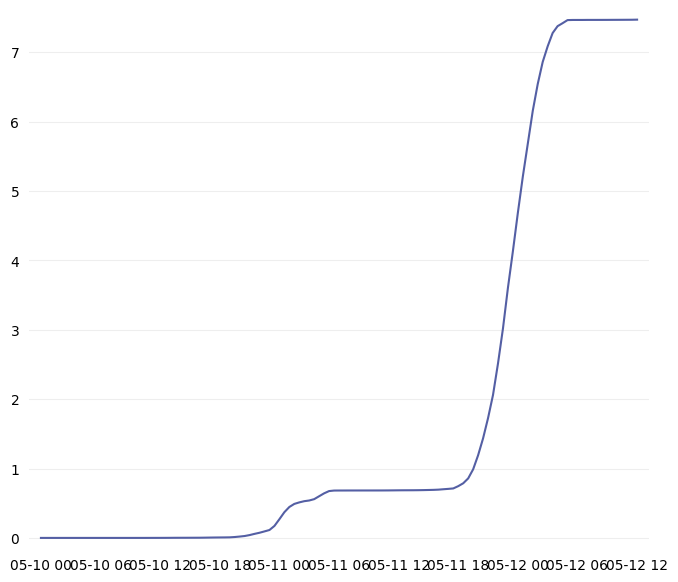

In [181]:

plt.plot(ds_4sip.time, ds_4sip.tot_prec.mean('ncells'))

In [182]:
print(ds_4sip.tot_prec.max().values)

125.88295


In [180]:

result1 = (100. * qni_up / tni_up).compute().item()
result2 = (100. * qns_up / tni_up).compute().item()
result3 = (100. * qng_up / tni_up).compute().item()
result4 = (100. * qnh_up / tni_up).compute().item()
print(result1, result2, result3, result4)
#print(100.*qns_up.values/tni_up.values)
#print(100.*qng_up.values/tni_up.values)
#print(100.*qnh_up.values/tni_up.values)

98.9457778930664 0.9038118124008179 0.15038207173347473 2.2730442651663907e-05


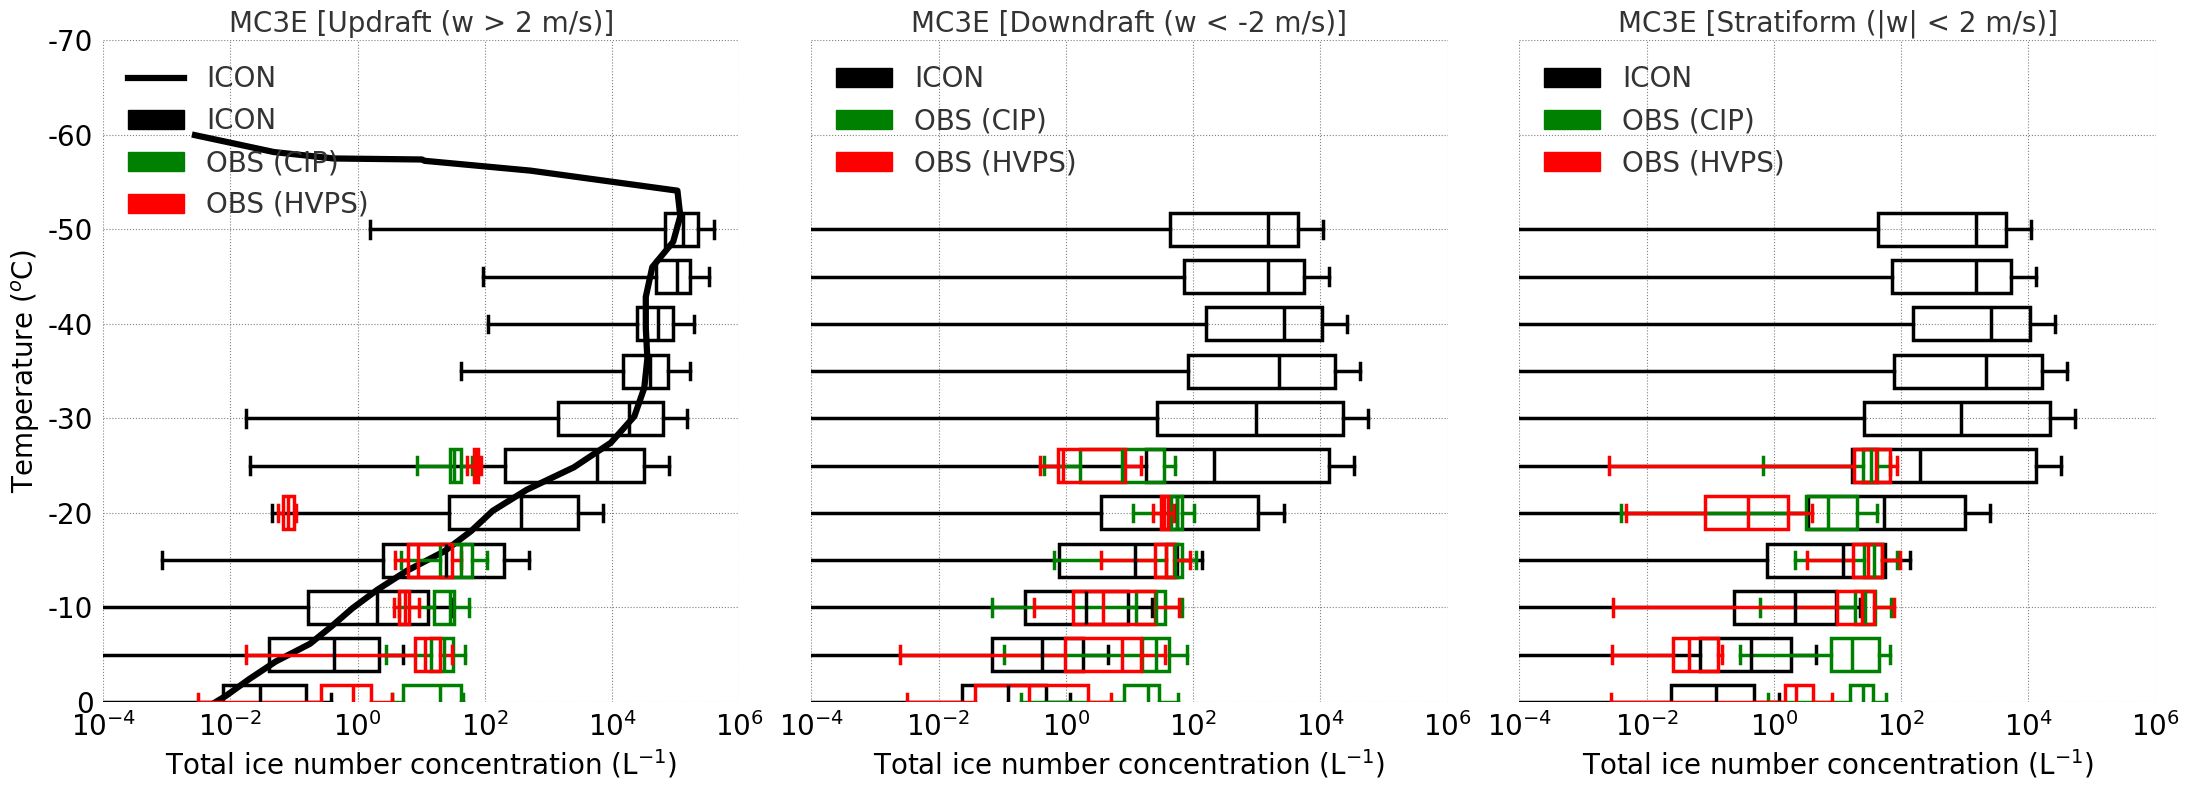

In [63]:

## ============== ICON
w_thres = 1.
thres_q = 1.e-4
###### Without SIP
# lwc gperm3
inc_sip_up_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
avg_inc_sip_up_perl = inc_sip_up_perl.median(dim=('time','ncells'))
avg_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

## ================

# CIP
df_v2_cip_comb = pd.DataFrame(ds_v2_cip_comb)
df_v2_cip_comb['tempc'] = df_v2_cip_comb['air_temp']

#temp_cip_bin = np.arange(df_v2_cip_comb['tempc'].min() - 2, df_v2_cip_comb['tempc'].max() + 2, 3)  

temp_cip_bin = np.arange(-30, 20, 5)

#temp_cip_bin = np.arange(-30, 3, 4)

temp_cip_bin = np.sort(temp_cip_bin)

df_v2_cip_comb['temp_cip_bin'] = np.digitize(df_v2_cip_comb['tempc'], bins=temp_cip_bin, right=False)

bin_edges = np.concatenate([temp_cip_bin - 2, [temp_cip_bin[-1] + 2]])  
df_v2_cip_comb['temp_bin'] = bin_edges[df_v2_cip_comb['temp_cip_bin']]

# HVPS
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)
df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

#temp_hvps_bin = np.arange(-30, 3, 4)
temp_hvps_bin = np.arange(-30, 20, 5)
temp_hvps_bin = np.sort(temp_hvps_bin)
df_v2_hvps_comb['temp_hvps_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_hvps_bin, right=False)

bin_edges = np.concatenate([temp_hvps_bin - 2, [temp_hvps_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_hvps_bin']]


### TINC
# CIP
df_nice_up_cip = df_v2_cip_comb[['nice_cip_up_perl', 'temp_bin']].dropna()
df_nice_dn_cip = df_v2_cip_comb[['nice_cip_dn_perl', 'temp_bin']].dropna()
df_nice_st_cip = df_v2_cip_comb[['nice_cip_st_perl', 'temp_bin']].dropna()

df_nice_up_cip = df_nice_up_cip.dropna(subset=['temp_bin'])
df_nice_dn_cip = df_nice_dn_cip.dropna(subset=['temp_bin'])
df_nice_st_cip = df_nice_st_cip.dropna(subset=['temp_bin'])

nice_cip_up_by_bin = [df_nice_up_cip[df_nice_up_cip['temp_bin'] == temp]['nice_cip_up_perl'].values for temp in bin_edges]
nice_cip_dn_by_bin = [df_nice_dn_cip[df_nice_dn_cip['temp_bin'] == temp]['nice_cip_dn_perl'].values for temp in bin_edges]
nice_cip_st_by_bin = [df_nice_st_cip[df_nice_st_cip['temp_bin'] == temp]['nice_cip_st_perl'].values for temp in bin_edges]

# HVPS
df_nice_up_hvps = df_v2_hvps_comb[['nice_hvps_up_perl', 'temp_bin']].dropna()
df_nice_dn_hvps = df_v2_hvps_comb[['nice_hvps_dn_perl', 'temp_bin']].dropna()
df_nice_st_hvps = df_v2_hvps_comb[['nice_hvps_st_perl', 'temp_bin']].dropna()

df_nice_up_hvps = df_nice_up_hvps.dropna(subset=['temp_bin'])
df_nice_dn_hvps = df_nice_dn_hvps.dropna(subset=['temp_bin'])
df_nice_st_hvps = df_nice_st_hvps.dropna(subset=['temp_bin'])

nice_hvps_up_by_bin = [df_nice_up_hvps[df_nice_up_hvps['temp_bin'] == temp]['nice_hvps_up_perl'].values for temp in bin_edges]
nice_hvps_dn_by_bin = [df_nice_dn_hvps[df_nice_dn_hvps['temp_bin'] == temp]['nice_hvps_dn_perl'].values for temp in bin_edges]
nice_hvps_st_by_bin = [df_nice_st_hvps[df_nice_st_hvps['temp_bin'] == temp]['nice_hvps_st_perl'].values for temp in bin_edges]

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['MC3E [Updraft (w > 2 m/s)]', 'MC3E [Downdraft (w < -2 m/s)]', 'MC3E [Stratiform (|w| < 2 m/s)]']
#data_list = [nice_up_by_bin, nice_dn_by_bin, nice_st_by_bin]
#temp_bins_list = [temp_cip_bin, temp_cip_bin, temp_cip_bin]

fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha=1;
alpha1=1;
alpha2=1.;
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(inc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.plot(avg_inc_sip_up_perl, avg_tempc, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(nice_cip_up_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(nice_hvps_up_by_bin[:-1], positions=temp_hvps_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(inc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(nice_cip_dn_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(nice_hvps_dn_by_bin[:-1], positions=temp_hvps_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 2:
        #ax.plot(inc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(nice_cip_st_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(nice_hvps_st_by_bin[:-1], positions=temp_hvps_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-4, 1.e6)
    ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)
    ax.set_ylim(0, -70)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=alpha)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    
    obs_icon_patch = mpatches.Patch(color='black', label='ICON')
    obs_cip_patch = mpatches.Patch(color='green', label='OBS (CIP)')
    obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS)')
    
    #obs_patch = mpatches.Patch(color='lightgrey', label='OBS (CIP)')

    ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='upper left', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -10, -20, -30, -40, -50, -60, -70])
axes[0].set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60', '-70'], fontsize=fontsize)
#axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40])
#axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40'], fontsize=fontsize)

plt.tight_layout()
plt.show()

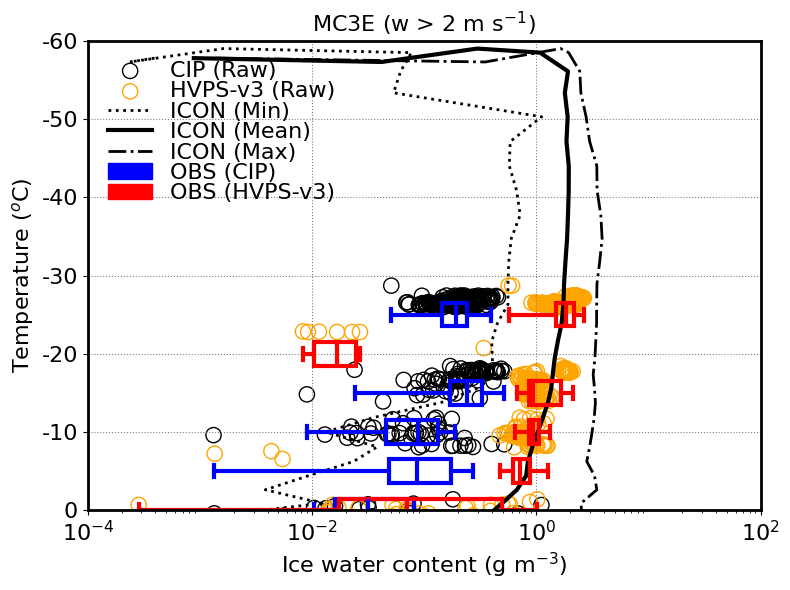

In [36]:


## ============== ICON
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
iwc_4sip_up_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
median_iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.median(dim=('time','ncells'))
mean_iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.mean(dim=('time','ncells'))
min_iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.min(dim=('time','ncells'))
max_iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.max(dim=('time','ncells'))
avg_4sip_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.std(dim=('time', 'ncells'), skipna=True)
count_iwc_4sip_up_gperm3 = iwc_4sip_up_gperm3.count(dim=('time', 'ncells'))
se_iwc_4sip_up_gperm3 = std_iwc_4sip_up_gperm3 / np.sqrt(count_iwc_4sip_up_gperm3)

## ================

# CIP
df_v2_cip_comb = pd.DataFrame(ds_v2_cip_comb)
df_v2_cip_comb['tempc'] = df_v2_cip_comb['air_temp']

temp_cip_bin = np.arange(-30, 20, 5)

temp_cip_bin = np.sort(temp_cip_bin)

df_v2_cip_comb['temp_cip_bin'] = np.digitize(df_v2_cip_comb['tempc'], bins=temp_cip_bin, right=False)

bin_edges = np.concatenate([temp_cip_bin - 2, [temp_cip_bin[-1] + 2]])  
df_v2_cip_comb['temp_bin'] = bin_edges[df_v2_cip_comb['temp_cip_bin']]

# HVPS
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)
df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

temp_hvps_bin = np.arange(-30, 20, 5)
temp_hvps_bin = np.sort(temp_hvps_bin)
df_v2_hvps_comb['temp_hvps_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_hvps_bin, right=False)

bin_edges = np.concatenate([temp_hvps_bin - 2, [temp_hvps_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_hvps_bin']]


## IWC
# CIP
df_iwc_up_cip = df_v2_cip_comb[['iwc_cip_up_gperm3', 'temp_bin']].dropna()
df_iwc_up_cip = df_iwc_up_cip.dropna(subset=['temp_bin'])
iwc_cip_up_by_bin = [df_iwc_up_cip[df_iwc_up_cip['temp_bin'] == temp]['iwc_cip_up_gperm3'].values for temp in bin_edges]

# HVPS
df_iwc_up_hvps = df_v2_hvps_comb[['iwc_hvps_up_gperm3', 'temp_bin']].dropna()
df_iwc_up_hvps = df_iwc_up_hvps.dropna(subset=['temp_bin'])
iwc_hvps_up_by_bin = [df_iwc_up_hvps[df_iwc_up_hvps['temp_bin'] == temp]['iwc_hvps_up_gperm3'].values for temp in bin_edges]


fnt=16;
ln=3;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')



ax.scatter(ds_v2_cip_comb['iwc_cip_up_gperm3'], ds_v2_cip_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='k', alpha=al1, label='CIP (Raw)')

ax.scatter(ds_v2_hvps_comb['iwc_hvps_up_gperm3'], ds_v2_hvps_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='orange', alpha=al1, label='HVPS-v3 (Raw)')

#ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
#ax.plot(median_iwc_sip_up_perl, avg_tempc, 'k--', linewidth=ln, label='ICON (Median)');
#ax.plot(mean_iwc_sip_up_perl, avg_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
#ax.plot(max_iwc_sip_up_perl, avg_tempc, 'k:', linewidth=ln, label='ICON (Max)');

ax.plot(min_iwc_4sip_up_gperm3, avg_4sip_tempc, 'k:', linewidth=ln-1, label='ICON (Min)');
ax.plot(mean_iwc_4sip_up_gperm3, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
ax.plot(max_iwc_4sip_up_gperm3, avg_4sip_tempc, 'k-.', linewidth=ln-1, label='ICON (Max)');

#ax.boxplot(iwc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True, widths=wd,
#            boxprops=dict(facecolor='none', edgecolor='black', linewidth=ln1, alpha=al1),
#            medianprops=dict(color='black', linewidth=ln1),
#            whiskerprops=dict(linewidth=ln1, color='black', alpha=al1),
#            capprops=dict(linewidth=ln1, color='black', alpha=al1), showfliers=False);

ax.boxplot(iwc_cip_up_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True, widths=wd,
           boxprops=dict(facecolor='none', edgecolor='blue', linewidth=ln, alpha=al2),
           medianprops=dict(color='blue', linewidth=ln),
           whiskerprops=dict(linewidth=ln, color='blue', alpha=al2),
           capprops=dict(linewidth=ln, color='blue', alpha=al2), showfliers=False)
        
ax.boxplot(iwc_hvps_up_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True, widths=wd,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=ln, alpha=al2),  
            medianprops=dict(color='red', linewidth=ln), whiskerprops=dict(linewidth=ln, color='red', alpha=al2),  
            capprops=dict(linewidth=ln, color='red', alpha=al2), showfliers=False)

# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-4, 1.e2)
ax.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Ice water content (g m$^{-3}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(0, -60)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([0, -10, -20, -30, -40, -50, -60])
ax.set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CIP)')
obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS-v3)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles + [obs_cip_patch, obs_hvps_patch], frameon=False, labelspacing=0.02, loc='best', fontsize=fnt)

# Customize axis spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_linewidth(2)
#ax.spines['bottom'].set_linewidth(2)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_2715970/493484667.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2], fontsize=fontsize)
/tmp/ipykernel_2715970/493484667.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2], fontsize=fontsize)
/tmp/ipykernel_2715970/493484667.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2], fontsize=fontsize)


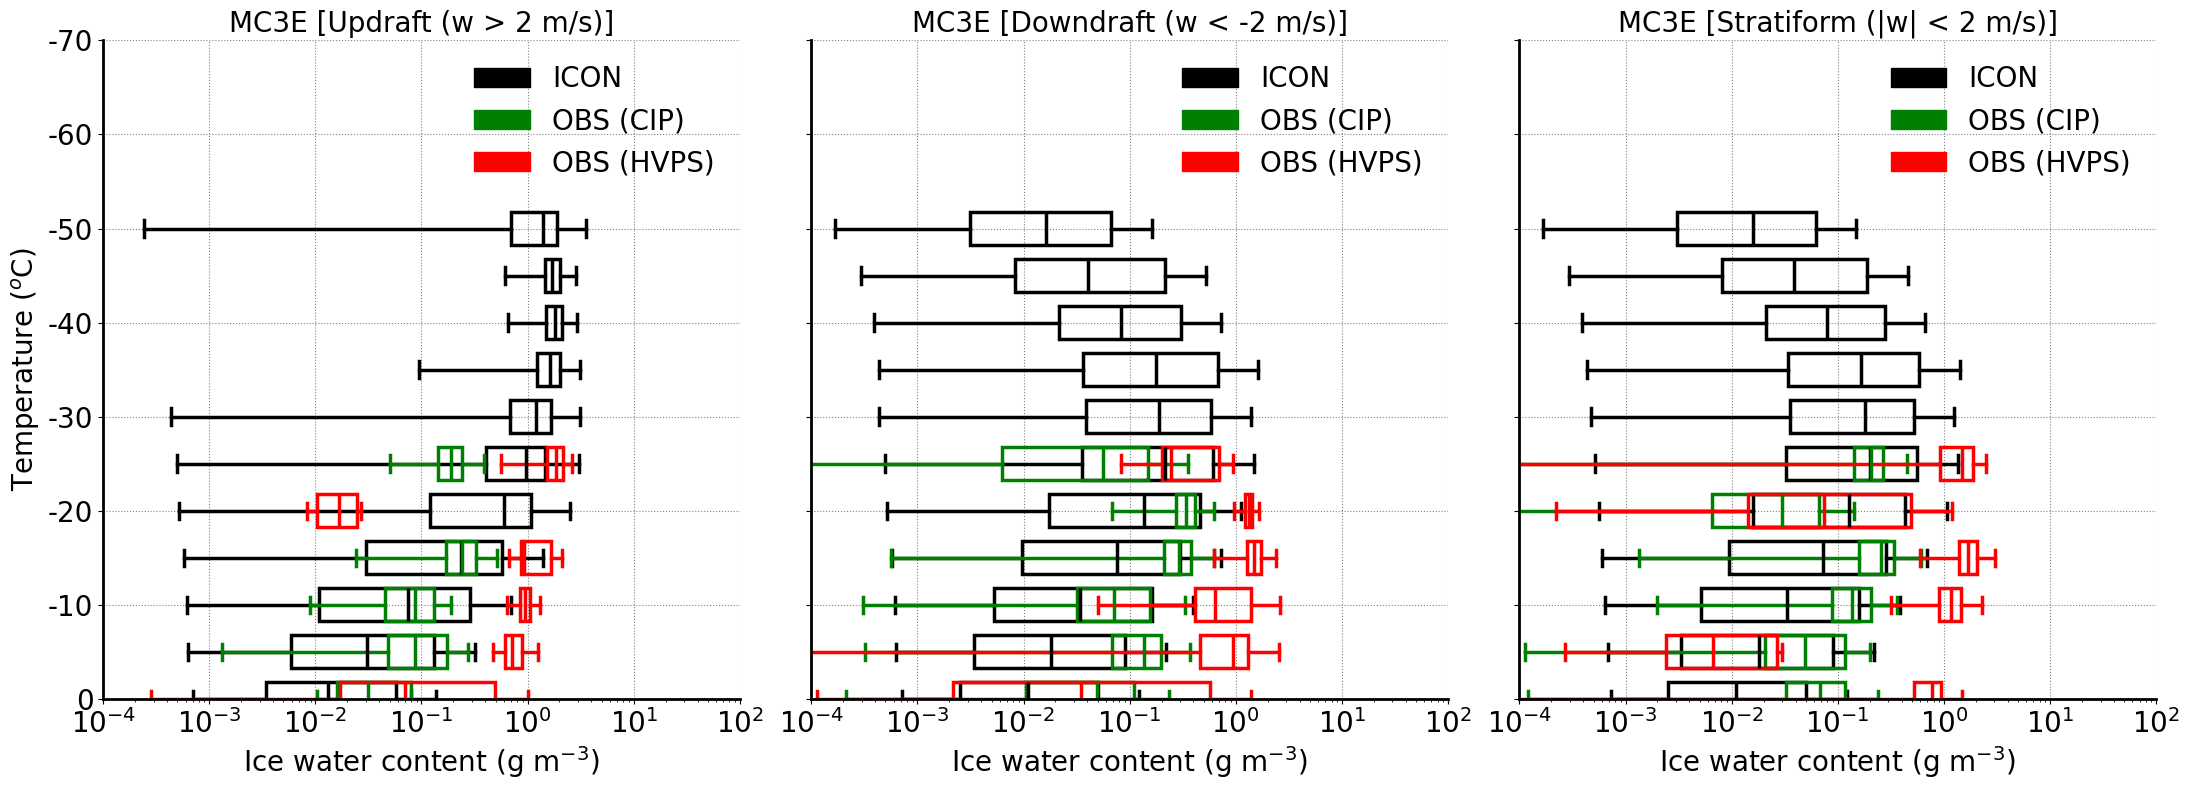

In [56]:

## IWC
# CIP
df_iwc_up_cip = df_v2_cip_comb[['iwc_cip_up_gperm3', 'temp_bin']].dropna()
df_iwc_dn_cip = df_v2_cip_comb[['iwc_cip_dn_gperm3', 'temp_bin']].dropna()
df_iwc_st_cip = df_v2_cip_comb[['iwc_cip_st_gperm3', 'temp_bin']].dropna()

df_iwc_up_cip = df_iwc_up_cip.dropna(subset=['temp_bin'])
df_iwc_dn_cip = df_iwc_dn_cip.dropna(subset=['temp_bin'])
df_iwc_st_cip = df_iwc_st_cip.dropna(subset=['temp_bin'])

iwc_cip_up_by_bin = [df_iwc_up_cip[df_iwc_up_cip['temp_bin'] == temp]['iwc_cip_up_gperm3'].values for temp in bin_edges]
iwc_cip_dn_by_bin = [df_iwc_dn_cip[df_iwc_dn_cip['temp_bin'] == temp]['iwc_cip_dn_gperm3'].values for temp in bin_edges]
iwc_cip_st_by_bin = [df_iwc_st_cip[df_iwc_st_cip['temp_bin'] == temp]['iwc_cip_st_gperm3'].values for temp in bin_edges]

# HVPS
df_iwc_up_hvps = df_v2_hvps_comb[['iwc_hvps_up_gperm3', 'temp_bin']].dropna()
df_iwc_dn_hvps = df_v2_hvps_comb[['iwc_hvps_dn_gperm3', 'temp_bin']].dropna()
df_iwc_st_hvps = df_v2_hvps_comb[['iwc_hvps_st_gperm3', 'temp_bin']].dropna()

df_iwc_up_hvps = df_iwc_up_hvps.dropna(subset=['temp_bin'])
df_iwc_dn_hvps = df_iwc_dn_hvps.dropna(subset=['temp_bin'])
df_iwc_st_hvps = df_iwc_st_hvps.dropna(subset=['temp_bin'])

iwc_hvps_up_by_bin = [df_iwc_up_hvps[df_iwc_up_hvps['temp_bin'] == temp]['iwc_hvps_up_gperm3'].values for temp in bin_edges]
iwc_hvps_dn_by_bin = [df_iwc_dn_hvps[df_iwc_dn_hvps['temp_bin'] == temp]['iwc_hvps_dn_gperm3'].values for temp in bin_edges]
iwc_hvps_st_by_bin = [df_iwc_st_hvps[df_iwc_st_hvps['temp_bin'] == temp]['iwc_hvps_st_gperm3'].values for temp in bin_edges]

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['MC3E [Updraft (w > 2 m/s)]', 'MC3E [Downdraft (w < -2 m/s)]', 'MC3E [Stratiform (|w| < 2 m/s)]']
#data_list = [nice_up_by_bin, nice_dn_by_bin, nice_st_by_bin]
#temp_bins_list = [temp_cip_bin, temp_cip_bin, temp_cip_bin]

fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha=1;
alpha1=1;
alpha2=1.;
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(tiwc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(iwc_cip_up_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(iwc_hvps_up_by_bin[:-1], positions=temp_hvps_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(tiwc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        ax.boxplot(iwc_cip_dn_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(iwc_hvps_dn_by_bin[:-1], positions=temp_hvps_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 2:
        #ax.plot(tiwc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        ax.boxplot(iwc_cip_st_by_bin[:-1], positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(iwc_hvps_st_by_bin[:-1], positions=temp_hvps_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-4, 1.e2)
    ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2], fontsize=fontsize)
    ax.set_ylim(0, -70)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Ice water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=alpha)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    
    obs_icon_patch = mpatches.Patch(color='black', label='ICON')
    obs_cip_patch = mpatches.Patch(color='green', label='OBS (CIP)')
    obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS)')
    
    #obs_patch = mpatches.Patch(color='lightgrey', label='OBS (CIP)')

    ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -10, -20, -30, -40, -50, -60, -70])
axes[0].set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60', '-70'], fontsize=fontsize)
#axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40])
#axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40'], fontsize=fontsize)

plt.tight_layout()
plt.show()

In [141]:

df_v2_hvps_comb.tempc_cdp_bin

AttributeError: 'DataFrame' object has no attribute 'tempc_cdp_bin'

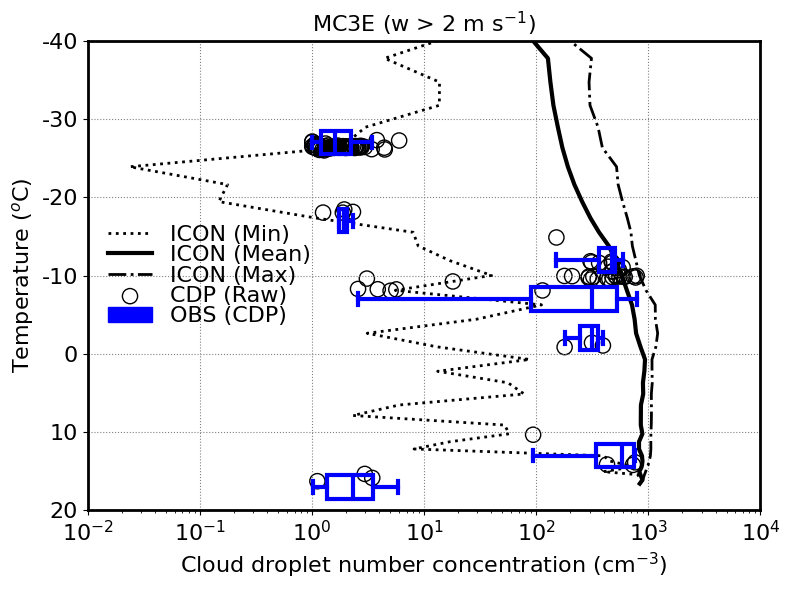

In [35]:



## ============== ICON
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
cdnc_4sip_up_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
median_cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.median(dim=('time','ncells'))
mean_cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.mean(dim=('time','ncells'))
min_cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.min(dim=('time','ncells'))
max_cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.max(dim=('time','ncells'))
avg_4sip_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.std(dim=('time', 'ncells'), skipna=True)
count_cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.count(dim=('time', 'ncells'))
se_cdnc_4sip_up_percm3 = std_cdnc_4sip_up_percm3 / np.sqrt(count_cdnc_4sip_up_percm3)

### Intermediate ccn

#cdnc_sip_up_int_ccn_percm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (ds_4sip_int_ccn_new.w_vel > w_thres), ds_4sip_int_ccn_new.cdnc_percm3, np.nan)
#median_cdnc_sip_up_int_ccn_percm3 = cdnc_sip_up_int_ccn_percm3.median(dim=('time','ncells'))
#mean_cdnc_sip_up_int_ccn_percm3 = cdnc_sip_up_int_ccn_percm3.mean(dim=('time','ncells'))
#min_cdnc_sip_up_int_ccn_percm3 = cdnc_sip_up_int_ccn_percm3.min(dim=('time','ncells'))
#max_cdnc_sip_up_int_ccn_percm3 = cdnc_sip_up_int_ccn_percm3.max(dim=('time','ncells'))

## ================
temp_cdp_bin = np.arange(-30, 30, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)

df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

temp_cdp_bin = np.arange(-30, 20, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)
df_v2_hvps_comb['temp_cdp_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_cdp_bin, right=False)

bin_edges = np.concatenate([temp_cdp_bin - 2, [temp_cdp_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_cdp_bin']]

df_v2_hvps_comb['temp_cdp_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_cdp_bin, right=False)


# CDNC-CDP
df_cdnc_up_cdp = df_v2_hvps_comb[['cdnc_cdp_up_percm3', 'temp_bin']].dropna()
df_cdnc_up_cdp = df_cdnc_up_cdp.dropna(subset=['temp_bin'])
cdnc_cdp_up_by_bin = [df_cdnc_up_cdp[df_cdnc_up_cdp['temp_bin'] == temp]['cdnc_cdp_up_percm3'].values for temp in bin_edges]


fnt=16;
ln=3;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3
fig, ax = plt.subplots(figsize=(8,6))

#ax.plot(median_cdnc_sip_up_percm3, avg_tempc, 'k--', linewidth=ln, label='ICON (Median, Cont CCN)');
##ax.plot(mean_cdnc_sip_up_percm3, avg_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
##ax.plot(max_cdnc_sip_up_percm3, avg_tempc, 'k:', linewidth=ln, label='ICON (Max)');

#ax.plot(median_cdnc_sip_up_int_ccn_percm3, avg_tempc, 'r--', linewidth=ln, label='ICON (Median, Int CCN)');
##ax.plot(mean_cdnc_sip_up_percm3, avg_tempc, 'r-', linewidth=ln, label='ICON (Mean)');
##ax.plot(max_cdnc_sip_up_percm3, avg_tempc, 'r:', linewidth=ln, label='ICON (Max)');



ax.plot(min_cdnc_4sip_up_percm3, avg_4sip_tempc, 'k:', linewidth=ln-1, label='ICON (Min)');
ax.plot(mean_cdnc_4sip_up_percm3, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
ax.plot(max_cdnc_4sip_up_percm3, avg_4sip_tempc, 'k-.', linewidth=ln-1, label='ICON (Max)');

ax.scatter(df_v2_hvps_comb['cdnc_cdp_up_percm3'], df_v2_hvps_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='k', alpha=al1, label='CDP (Raw)')


#ax.boxplot(cdnc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True, widths=wd,
#            boxprops=dict(facecolor='none', edgecolor='black', linewidth=ln1, alpha=al1),
#            medianprops=dict(color='black', linewidth=ln1),
#            whiskerprops=dict(linewidth=ln1, color='black', alpha=al1),
#            capprops=dict(linewidth=ln1, color='black', alpha=al1), showfliers=False);

ax.boxplot(cdnc_cdp_up_by_bin[:], positions=bin_edges[:], vert=False, patch_artist=True, widths=wd,
           boxprops=dict(facecolor='none', edgecolor='blue', linewidth=ln, alpha=al2),
           medianprops=dict(color='blue', linewidth=ln),
           whiskerprops=dict(linewidth=ln, color='blue', alpha=al2),
           capprops=dict(linewidth=ln, color='blue', alpha=al2), showfliers=False)

# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-2, 1.e4)
ax.set_xticks([1.e-2, 1.e-1, 1.e0, 1.e1, 1.e2, 1.e3, 1.e4])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Cloud droplet number concentration (cm$^{-3}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(20, -40)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([20, 10, 0, -10, -20, -30, -40])
ax.set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CDP)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles + [obs_cip_patch], frameon=False, labelspacing=0.02, loc='best', fontsize=fnt)

# Customize axis spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_linewidth(2)
#ax.spines['bottom'].set_linewidth(2)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
    
# Display the plot
plt.tight_layout()
plt.show()

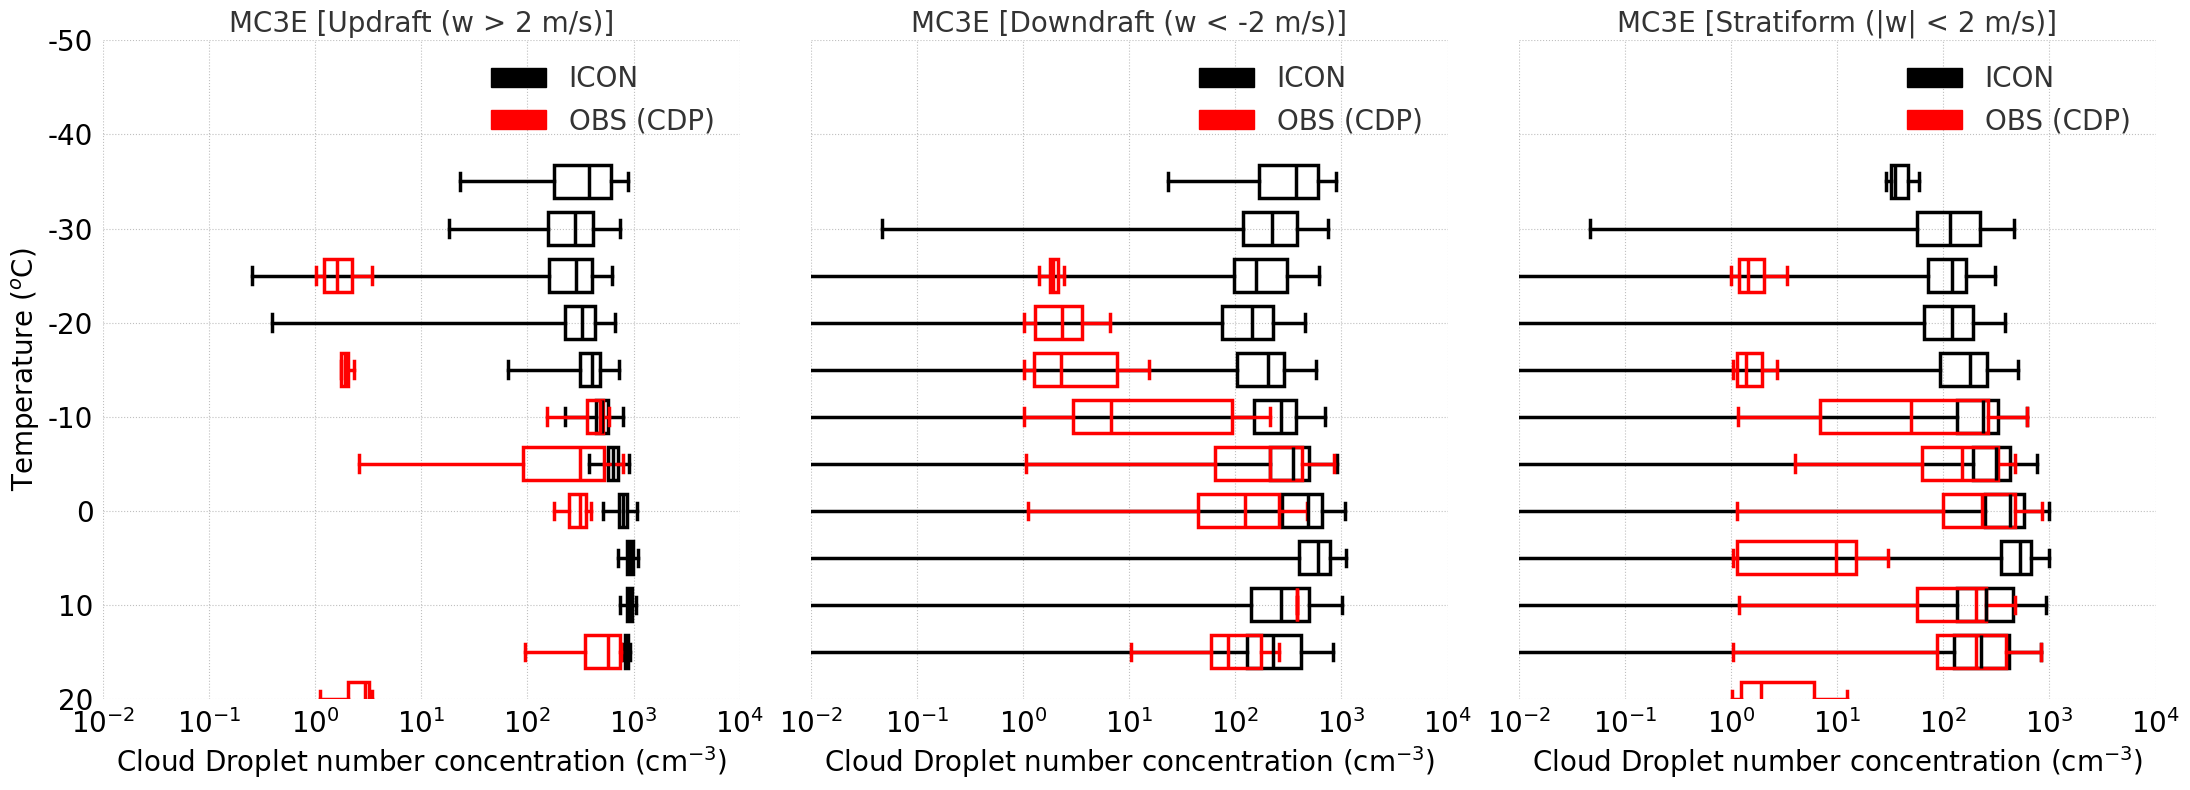

In [107]:

# HVPS
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)
df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

temp_cdp_bin = np.arange(-30, 30, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)
df_v2_hvps_comb['temp_cdp_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_cdp_bin, right=False)

bin_edges = np.concatenate([temp_cdp_bin - 2, [temp_cdp_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_cdp_bin']]

# CDNC
df_cdnc_up_cdp = df_v2_hvps_comb[['cdnc_cdp_up_percm3', 'temp_bin']].dropna()
df_cdnc_dn_cdp = df_v2_hvps_comb[['cdnc_cdp_dn_percm3', 'temp_bin']].dropna()
df_cdnc_st_cdp = df_v2_hvps_comb[['cdnc_cdp_st_percm3', 'temp_bin']].dropna()

df_cdnc_up_cdp = df_cdnc_up_cdp.dropna(subset=['temp_bin'])
df_cdnc_dn_cdp = df_cdnc_dn_cdp.dropna(subset=['temp_bin'])
df_cdnc_st_cdp = df_cdnc_st_cdp.dropna(subset=['temp_bin'])

cdnc_cdp_up_by_bin = [df_cdnc_up_cdp[df_cdnc_up_cdp['temp_bin'] == temp]['cdnc_cdp_up_percm3'].values for temp in bin_edges]
cdnc_cdp_dn_by_bin = [df_cdnc_dn_cdp[df_cdnc_dn_cdp['temp_bin'] == temp]['cdnc_cdp_dn_percm3'].values for temp in bin_edges]
cdnc_cdp_st_by_bin = [df_cdnc_st_cdp[df_cdnc_st_cdp['temp_bin'] == temp]['cdnc_cdp_st_percm3'].values for temp in bin_edges]

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['MC3E [Updraft (w > 2 m/s)]', 'MC3E [Downdraft (w < -2 m/s)]', 'MC3E [Stratiform (|w| < 2 m/s)]']

fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha1=1;
alpha2=1.;
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(cdnc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(cdnc_cdp_up_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 1:
        #ax.plot(cdnc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(cdnc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(cdnc_cdp_dn_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 2:
        #ax.plot(cdnc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(cdnc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        ax.boxplot(cdnc_cdp_st_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-2, 1.e4)
    ax.set_xticklabels([1.e-2, 1.e-1, 1.e0, 1.e1, 1.e2, 1.e3, 1.e4], fontsize=fontsize)
    ax.set_ylim(20, -50)
    #ax.set_yticklabels([20, 10, 0, -10, -20, -30, -40], fontsize=fontsize)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Cloud Droplet number concentration (cm$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=0.5)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (CDP)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='upper right', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([20, 10, 0, -10, -20, -30, -40, -50])
axes[0].set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

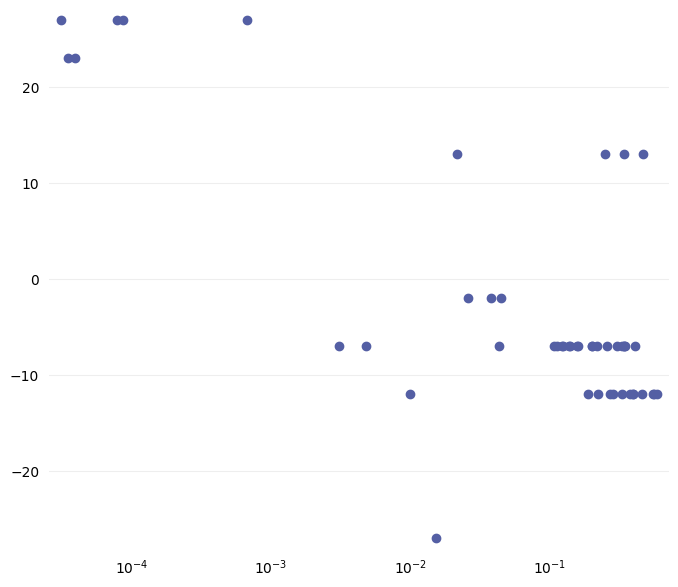

In [153]:

plt.scatter(df_v2_hvps_comb.lwc_cdp_up_gperm3, df_v2_hvps_comb.temp_bin)
plt.xscale('log')

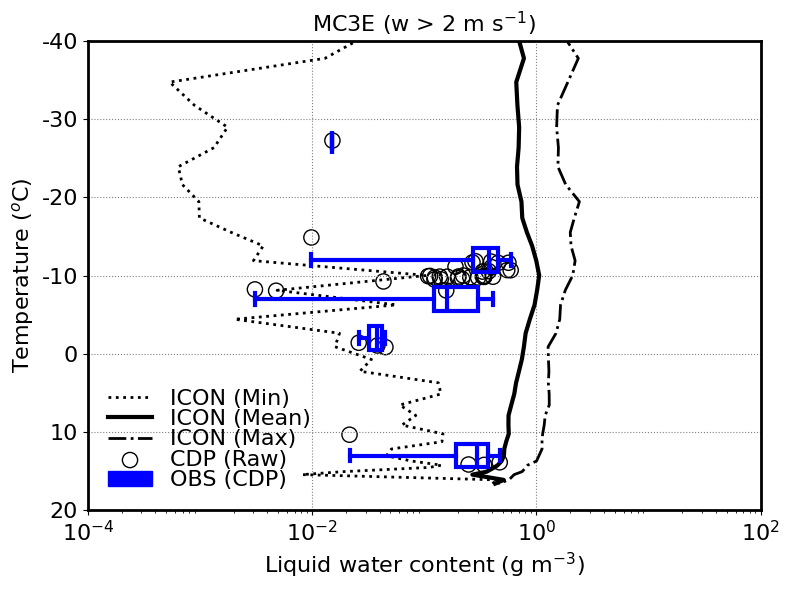

In [34]:




## ============== ICON
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
lwc_4sip_up_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
median_lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.median(dim=('time','ncells'))
mean_lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.mean(dim=('time','ncells'))
min_lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.min(dim=('time','ncells'))
max_lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.max(dim=('time','ncells'))
avg_4sip_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

std_lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.std(dim=('time', 'ncells'), skipna=True)
count_lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.count(dim=('time', 'ncells'))
se_lwc_4sip_up_gperm3 = std_lwc_4sip_up_gperm3 / np.sqrt(count_cdnc_4sip_up_percm3)

### Intermediate ccn

#lwc_sip_up_int_ccn_gperm3 = xr.where((ds_4sip_int_ccn_new.qc > thres_q) & (ds_4sip_int_ccn_new.w_vel > w_thres), ds_4sip_int_ccn_new.lwc_gperm3, np.nan)
#median_lwc_sip_up_int_ccn_gperm3 = lwc_sip_up_int_ccn_gperm3.median(dim=('time','ncells'))
#mean_lwc_sip_up_int_ccn_gperm3 = lwc_sip_up_int_ccn_gperm3.mean(dim=('time','ncells'))
#min_lwc_sip_up_int_ccn_gperm3 = lwc_sip_up_int_ccn_gperm3.min(dim=('time','ncells'))
#max_lwc_sip_up_int_ccn_gperm3 = lwc_sip_up_int_ccn_gperm3.max(dim=('time','ncells'))

## ================

temp_cdp_bin = np.arange(-30, 30, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)
df_v2_hvps_comb['temp_cdp_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_cdp_bin, right=False)

bin_edges = np.concatenate([temp_cdp_bin - 2, [temp_cdp_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_cdp_bin']]

# LWC-CDP
df_lwc_up_cdp = df_v2_hvps_comb[['lwc_cdp_up_gperm3', 'temp_bin']].dropna()
df_lwc_up_cdp = df_lwc_up_cdp.dropna(subset=['temp_bin'])
lwc_cdp_up_by_bin = [df_lwc_up_cdp[df_lwc_up_cdp['temp_bin'] == temp]['lwc_cdp_up_gperm3'].values for temp in bin_edges]

# LWC-KING
df_lwc_up_king = df_v2_hvps_comb[['lwc_king_up_gperm3', 'temp_bin']].dropna()
df_lwc_up_king = df_lwc_up_king.dropna(subset=['temp_bin'])
lwc_king_up_by_bin = [df_lwc_up_king[df_lwc_up_king['temp_bin'] == temp]['lwc_king_up_gperm3'].values for temp in bin_edges]

# LWC-NEVZOROV
df_lwc_up_nev = df_v2_hvps_comb[['lwc_nev_up_gperm3', 'temp_bin']].dropna()
df_lwc_up_nev = df_lwc_up_nev.dropna(subset=['temp_bin'])
lwc_nev_up_by_bin = [df_lwc_up_nev[df_lwc_up_nev['temp_bin'] == temp]['lwc_nev_up_gperm3'].values for temp in bin_edges]


fnt=16;
ln=3;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
fig, ax = plt.subplots(figsize=(8,6))

##ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
#ax.plot(median_lwc_sip_up_gperm3, avg_tempc, 'k--', linewidth=ln, label='ICON (Median, Cont CCN)');
#ax.plot(mean_lwc_sip_up_gperm3, avg_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
#ax.plot(max_lwc_sip_up_gperm3, avg_tempc, 'k:', linewidth=ln, label='ICON (Max)');


#ax.plot(median_cdnc_sip_up_int_ccn_percm3, avg_tempc, 'r--', linewidth=ln, label='ICON (Median, Int CCN)');

ax.plot(min_lwc_4sip_up_gperm3, avg_4sip_tempc, 'k:', linewidth=ln-1, label='ICON (Min)');
ax.plot(mean_lwc_4sip_up_gperm3, avg_4sip_tempc, 'k-', linewidth=ln, label='ICON (Mean)');
ax.plot(max_lwc_4sip_up_gperm3, avg_4sip_tempc, 'k-.', linewidth=ln-1, label='ICON (Max)');

ax.scatter(df_v2_hvps_comb['lwc_cdp_up_gperm3'], df_v2_hvps_comb['air_temp'], marker='o', s=120, 
           facecolors='none', edgecolors='k', alpha=al1, label='CDP (Raw)')

#ax.scatter(df_v2_hvps_comb['lwc_nev_up_gperm3'], df_v2_hvps_comb['air_temp'], marker='o', s=120, 
#           facecolors='orange', edgecolors='orange', alpha=al3, label='Nev (Raw)')

#ax.scatter(df_v2_hvps_comb['lwc_king_up_gperm3'], df_v2_hvps_comb['air_temp'], marker='o', s=120, 
#           facecolors='red', edgecolors='red', alpha=al3, label='King (Raw)')

#ax.scatter(df_v2_hvps_comb['lwc_nev_up_gperm3'], df_v2_hvps_comb['air_temp'], marker='o', s=120, 
#           facecolors='orange', edgecolors='orange', alpha=al3, label='Nev (Raw)')

#ax.boxplot(cdnc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True, widths=wd,
#            boxprops=dict(facecolor='none', edgecolor='black', linewidth=ln1, alpha=al1),
#            medianprops=dict(color='black', linewidth=ln1),
#            whiskerprops=dict(linewidth=ln1, color='black', alpha=al1),
#            capprops=dict(linewidth=ln1, color='black', alpha=al1), showfliers=False);

ax.boxplot(lwc_cdp_up_by_bin[:], positions=bin_edges[:], vert=False, patch_artist=True, widths=wd,
           boxprops=dict(facecolor='none', edgecolor='blue', linewidth=ln, alpha=al2),
           medianprops=dict(color='blue', linewidth=ln),
           whiskerprops=dict(linewidth=ln, color='blue', alpha=al2),
           capprops=dict(linewidth=ln, color='blue', alpha=al2), showfliers=False)


#ax.boxplot(lwc_king_up_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True, widths=wd,
#           boxprops=dict(facecolor='none', edgecolor='red', linewidth=ln, alpha=al2),
#           medianprops=dict(color='red', linewidth=ln),
#           whiskerprops=dict(linewidth=ln, color='red', alpha=al2),
#           capprops=dict(linewidth=ln, color='red', alpha=al2), showfliers=False)


#ax.boxplot(lwc_nev_up_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True, widths=wd,
#           boxprops=dict(facecolor='none', edgecolor='magenta', linewidth=ln, alpha=al2),
#           medianprops=dict(color='magenta', linewidth=ln),
#           whiskerprops=dict(linewidth=ln, color='magenta', alpha=al2),
#           capprops=dict(linewidth=ln, color='magenta', alpha=al2), showfliers=False)

# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-4, 1.e2)
ax.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Liquid water content (g m$^{-3}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(20, -40)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([20, 10, 0, -10, -20, -30, -40])
ax.set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CDP)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles + [obs_cip_patch], frameon=False, labelspacing=0.02, loc='best', fontsize=fnt)

# Customize axis spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_linewidth(2)
#ax.spines['bottom'].set_linewidth(2)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
    
# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_2715970/1136517385.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
/tmp/ipykernel_2715970/1136517385.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
/tmp/ipykernel_2715970/1136517385.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)


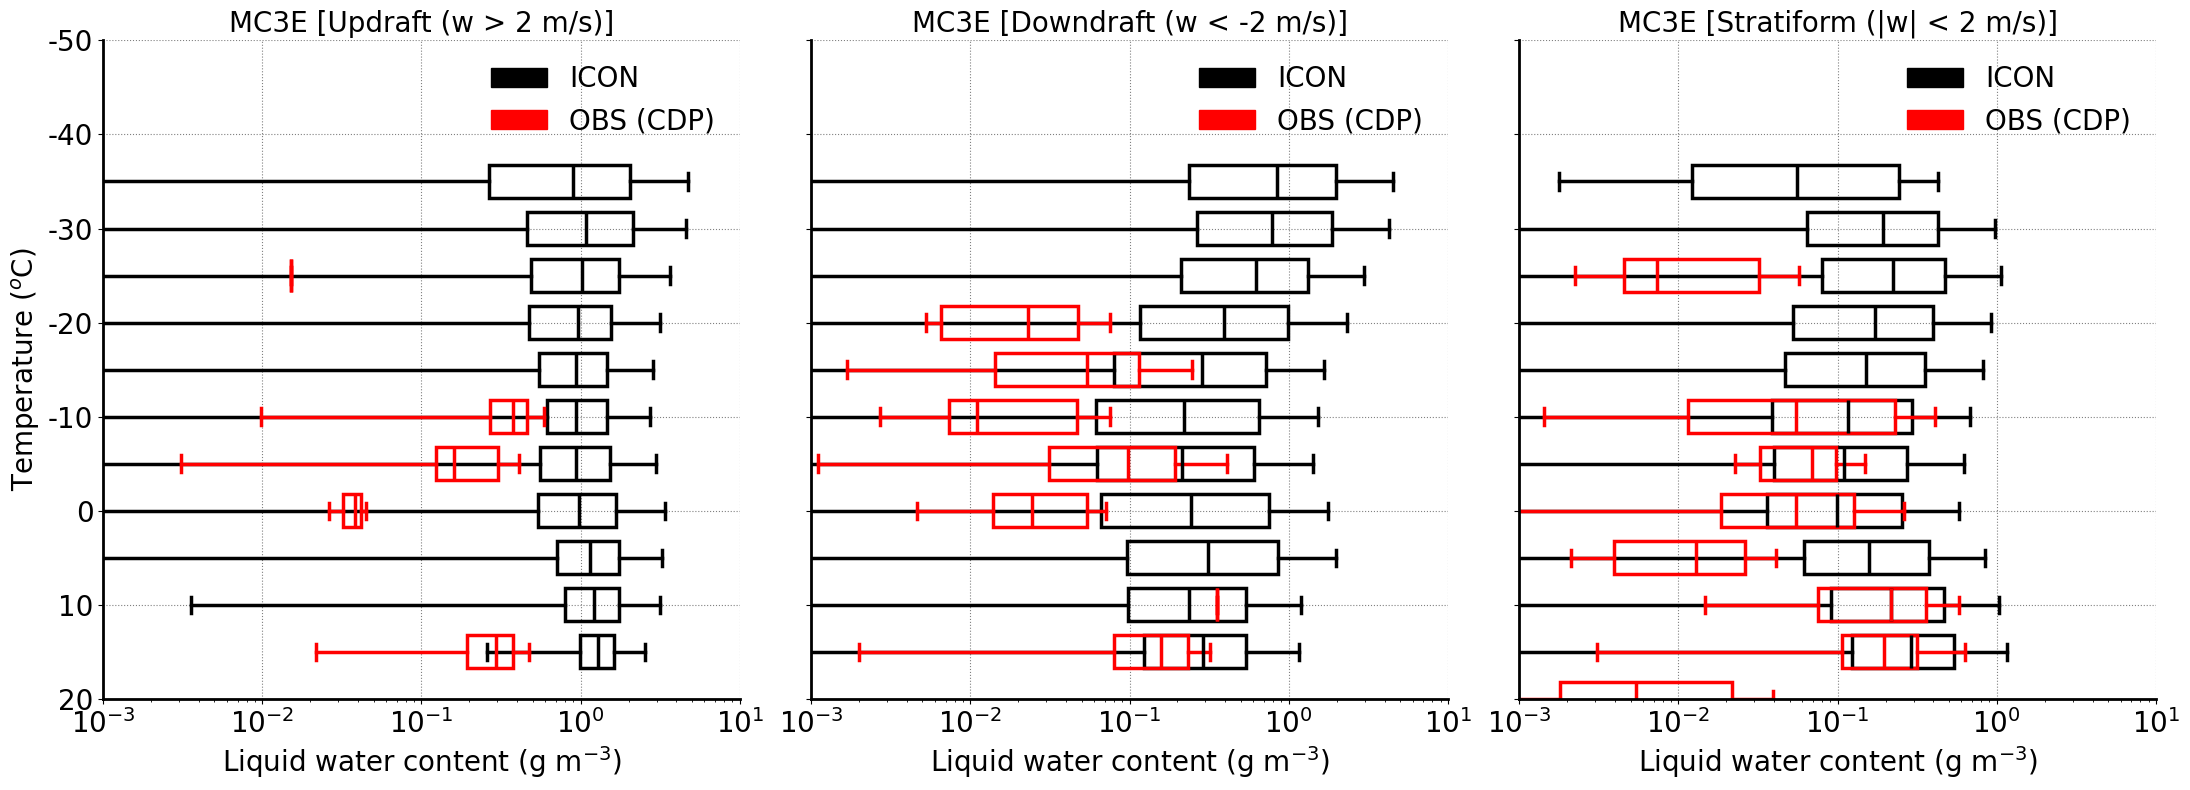

In [62]:


# HVPS
df_v2_hvps_comb = pd.DataFrame(ds_v2_hvps_comb)
df_v2_hvps_comb['tempc'] = df_v2_hvps_comb['air_temp']

temp_cdp_bin = np.arange(-30, 30, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)
df_v2_hvps_comb['temp_cdp_bin'] = np.digitize(df_v2_hvps_comb['tempc'], bins=temp_cdp_bin, right=False)

bin_edges = np.concatenate([temp_cdp_bin - 2, [temp_cdp_bin[-1] + 2]])  
df_v2_hvps_comb['temp_bin'] = bin_edges[df_v2_hvps_comb['temp_cdp_bin']]

# LWC-CDP
df_lwc_up_cdp = df_v2_hvps_comb[['lwc_cdp_up_gperm3', 'temp_bin']].dropna()
df_lwc_dn_cdp = df_v2_hvps_comb[['lwc_cdp_dn_gperm3', 'temp_bin']].dropna()
df_lwc_st_cdp = df_v2_hvps_comb[['lwc_cdp_st_gperm3', 'temp_bin']].dropna()

df_lwc_up_cdp = df_lwc_up_cdp.dropna(subset=['temp_bin'])
df_lwc_dn_cdp = df_lwc_dn_cdp.dropna(subset=['temp_bin'])
df_lwc_st_cdp = df_lwc_st_cdp.dropna(subset=['temp_bin'])

lwc_cdp_up_by_bin = [df_lwc_up_cdp[df_lwc_up_cdp['temp_bin'] == temp]['lwc_cdp_up_gperm3'].values for temp in bin_edges]
lwc_cdp_dn_by_bin = [df_lwc_dn_cdp[df_lwc_dn_cdp['temp_bin'] == temp]['lwc_cdp_dn_gperm3'].values for temp in bin_edges]
lwc_cdp_st_by_bin = [df_lwc_st_cdp[df_lwc_st_cdp['temp_bin'] == temp]['lwc_cdp_st_gperm3'].values for temp in bin_edges]


# LWC-KING
df_lwc_up_king = df_v2_hvps_comb[['lwc_king_up_gperm3', 'temp_bin']].dropna()
df_lwc_dn_king = df_v2_hvps_comb[['lwc_king_dn_gperm3', 'temp_bin']].dropna()
df_lwc_st_king = df_v2_hvps_comb[['lwc_king_st_gperm3', 'temp_bin']].dropna()

df_lwc_up_king = df_lwc_up_king.dropna(subset=['temp_bin'])
df_lwc_dn_king = df_lwc_dn_king.dropna(subset=['temp_bin'])
df_lwc_st_king = df_lwc_st_king.dropna(subset=['temp_bin'])

lwc_king_up_by_bin = [df_lwc_up_king[df_lwc_up_king['temp_bin'] == temp]['lwc_king_up_gperm3'].values for temp in bin_edges]
lwc_king_dn_by_bin = [df_lwc_dn_king[df_lwc_dn_king['temp_bin'] == temp]['lwc_king_dn_gperm3'].values for temp in bin_edges]
lwc_king_st_by_bin = [df_lwc_st_king[df_lwc_st_king['temp_bin'] == temp]['lwc_king_st_gperm3'].values for temp in bin_edges]

# LWC-NEVZOROV
df_lwc_up_nev = df_v2_hvps_comb[['lwc_nev_up_gperm3', 'temp_bin']].dropna()
df_lwc_dn_nev = df_v2_hvps_comb[['lwc_nev_dn_gperm3', 'temp_bin']].dropna()
df_lwc_st_nev = df_v2_hvps_comb[['lwc_nev_st_gperm3', 'temp_bin']].dropna()

df_lwc_up_nev = df_lwc_up_nev.dropna(subset=['temp_bin'])
df_lwc_dn_nev = df_lwc_dn_nev.dropna(subset=['temp_bin'])
df_lwc_st_nev = df_lwc_st_nev.dropna(subset=['temp_bin'])

lwc_nev_up_by_bin = [df_lwc_up_nev[df_lwc_up_nev['temp_bin'] == temp]['lwc_nev_up_gperm3'].values for temp in bin_edges]
lwc_nev_dn_by_bin = [df_lwc_dn_nev[df_lwc_dn_nev['temp_bin'] == temp]['lwc_nev_dn_gperm3'].values for temp in bin_edges]
lwc_nev_st_by_bin = [df_lwc_st_nev[df_lwc_st_nev['temp_bin'] == temp]['lwc_nev_st_gperm3'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['MC3E [Updraft (w > 2 m/s)]', 'MC3E [Downdraft (w < -2 m/s)]', 'MC3E [Stratiform (|w| < 2 m/s)]']

fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha1=1;
alpha2=1.;
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(lwc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(lwc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(lwc_cdp_up_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(lwc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(lwc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(lwc_cdp_dn_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 2:
        #ax.plot(lwc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(lwc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(lwc_cdp_st_by_bin[:-1], positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-3, 1.e1)
    ax.set_xticklabels([1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
    ax.set_ylim(20, -40)
    #ax.set_yticklabels([20, 10, 0, -10, -20, -30, -40], fontsize=fontsize)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Liquid water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (CDP)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([20, 10, 0, -10, -20, -30, -40, -50])
axes[0].set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

In [17]:
data_v2.pos_lat

0        1000.000000
1        1000.000000
2        1000.000000
3        1000.000000
4        1000.000000
            ...     
13262      36.192791
13263      36.192698
13264      36.192614
13265      36.192698
13266    1000.000000
Name: pos_lat, Length: 13267, dtype: float64

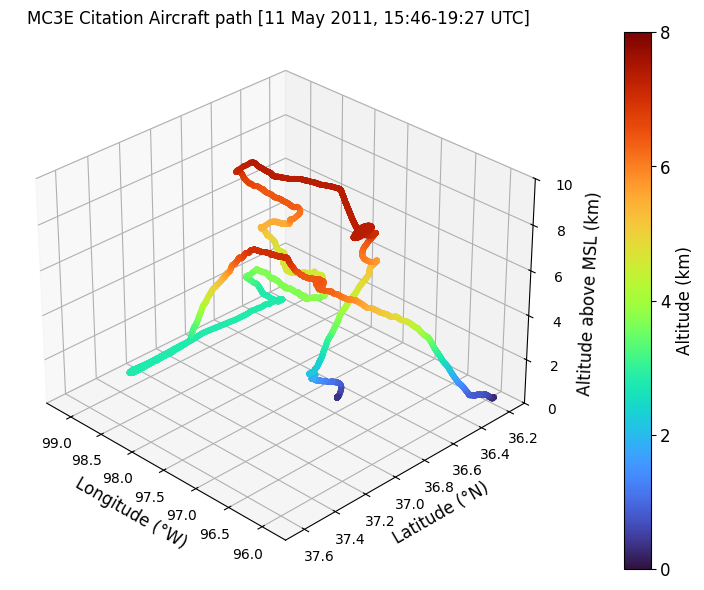

In [8]:

# Flight data
file_path = '/work/bb1163/b382718/output/mc3e/observations/aircraft_optical_probe_data/GHRC_DATA/2011_05_11_15_46_09_v2.mc3e'
data_v2 = pd.read_csv(file_path, sep='\s+', header=None, skiprows=63)

data_v2.columns = ['time', 'air_temp', 'machno', 'ias', 'tas', 
                   'pres_alt', 'pot_temp', 'pitot_wing', 'cabin_pres', 'static_pr',
                   'dewpt', 'mix_ratio', 'dew_point', 'frost_point', 'pos_roll', 
                   'pos_pitch', 'pos_head', 'posz_acc', 'pos_lat', 'pos_lon',
                   'pos_alt', 'pos_spd', 'pos_trk', 'alpha', 'beta', 
                   'wind_z', 'vert_vel', 'wind_m', 'wind_d', 'turb',
                   'lwc_king', 'twc_nev', 'lwc_nev', 'conc_cdp', 'lwc_cdp', 
                   'cdp_meanD', 'cdp_volD', 'cdp_effrad', 'conc_2dc', '2dc_meanD',
                   '2dc_volD', '2dc_effrad', 'icemsofreq', 'cpc_conc', 'tsg_gate']


data_v2.loc[data_v2.pos_lon == 9999.999999, 'pos_lon'] = np.nan
data_v2.loc[data_v2.pos_lat == 1000.000000, 'pos_lat'] = np.nan


mean_lon = data_v2.pos_lon
mean_lat = data_v2.pos_lat
mean_alt = 1.e-3*data_v2.pres_alt

fnt = 12
lnw = 3
lev=np.linspace(0,8,10)
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
plt.style.use('default')
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with altitude as color
sc = ax.scatter(-1*mean_lon, mean_lat, mean_alt, c=mean_alt, cmap='turbo', s=10, vmin=0, vmax=8)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, ticks=[0, 2, 4, 6, 8], pad=0.1)
cbar.set_label('Altitude (km)', fontsize=fnt)
cbar.ax.tick_params(labelsize=fnt)

# Axis labels
#ax.set_ylim(33,35)
#ax.set_xlim(-105,-107)
ax.set_zlim(0,10)
ax.set_xlabel('Longitude (°W)', fontsize=fnt)
ax.set_ylabel('Latitude (°N)', fontsize=fnt)
ax.set_zlabel('Altitude above MSL (km)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt-2)
ax.tick_params(axis='y', labelsize=fnt-2)
ax.tick_params(axis='z', labelsize=fnt-2)

ax.set_title('MC3E Citation Aircraft path [11 May 2011, 15:46-19:27 UTC]', fontsize=fnt)

# Optional: rotate view
ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()

## Precipitation & Aircraft track

In [3]:

fpath="/work/bk1415/b382718/output/mc3e/observations/aircraft_optical_probe_data/RADAR_REFLECTIVITY/NEXRAD";
ds_nexrad = xr.open_mfdataset(f"{fpath}/20110511_*.netcdf")

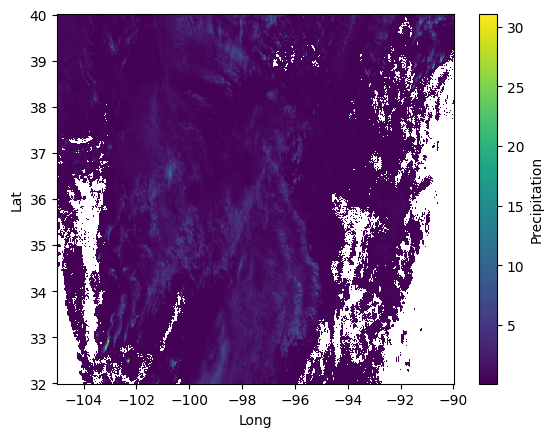

In [4]:
plt.style.use('default')
precip_nexrad = xr.where(ds_nexrad.Precipitation > 0., ds_nexrad.Precipitation, np.nan)
precip_nexrad.mean('time').plot()

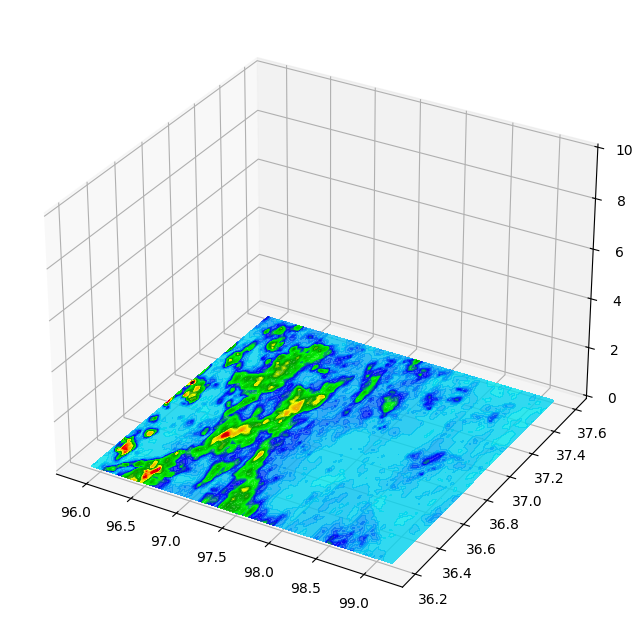

In [5]:

file_path = '/work/bb1163/b382718/output/mc3e/observations/aircraft_optical_probe_data/GHRC_DATA/2011_05_11_15_46_09_v2.mc3e'
data_v2 = pd.read_csv(file_path, sep='\s+', header=None, skiprows=63)

data_v2.columns = ['time', 'air_temp', 'machno', 'ias', 'tas', 
                   'pres_alt', 'pot_temp', 'pitot_wing', 'cabin_pres', 'static_pr',
                   'dewpt', 'mix_ratio', 'dew_point', 'frost_point', 'pos_roll', 
                   'pos_pitch', 'pos_head', 'posz_acc', 'pos_lat', 'pos_lon',
                   'pos_alt', 'pos_spd', 'pos_trk', 'alpha', 'beta', 
                   'wind_z', 'vert_vel', 'wind_m', 'wind_d', 'turb',
                   'lwc_king', 'twc_nev', 'lwc_nev', 'conc_cdp', 'lwc_cdp', 
                   'cdp_meanD', 'cdp_volD', 'cdp_effrad', 'conc_2dc', '2dc_meanD',
                   '2dc_volD', '2dc_effrad', 'icemsofreq', 'cpc_conc', 'tsg_gate']


data_v2.loc[data_v2.pos_lon == 9999.999999, 'pos_lon'] = np.nan
data_v2.loc[data_v2.pos_lat == 999.9999999, 'pos_lat'] = np.nan


mean_lon = data_v2.pos_lon
mean_lat = data_v2.pos_lat
mean_alt = 1.e-3*data_v2.pres_alt


lon_min, lon_max = np.nanmin(mean_lon), np.nanmax(mean_lon)
lat_min, lat_max = np.nanmin(mean_lat), np.nanmax(mean_lat)

ds_nexrad = ds_nexrad.where(
    (ds_nexrad.Long >= lon_min) & (ds_nexrad.Long <= lon_max) &
    (ds_nexrad.Lat >= lat_min) & (ds_nexrad.Lat <= lat_max), 
    drop=True
)

avg_precip_obs = xr.where(ds_nexrad.Precipitation > 0., ds_nexrad.Precipitation, np.nan)
#avg_precip_obs = avg_precip_obs.mean(dim=('time'))

lon_nexrad = ds_nexrad.Long
lat_nexrad = ds_nexrad.Lat

fnt = 12
plt.style.use('default')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot radar reflectivity using contourf at z=0
# This is much simpler and more reliable
altitude_base = 0  # Ground level
levels = np.linspace(-10, 30, 30)
lev = np.linspace(0, 10, 60)
ax.contourf(-1*ds_nexrad.Long, ds_nexrad.Lat, avg_precip_obs.mean(dim=('time')), 
                      cmap='pyart_NWSRef', levels=lev,
                     zdir='z', offset=0, alpha=0.8)
plt.show()

In [43]:
print(np.nanmin(mean_lon), np.nanmax(mean_lon))

-99.165383 -95.894562


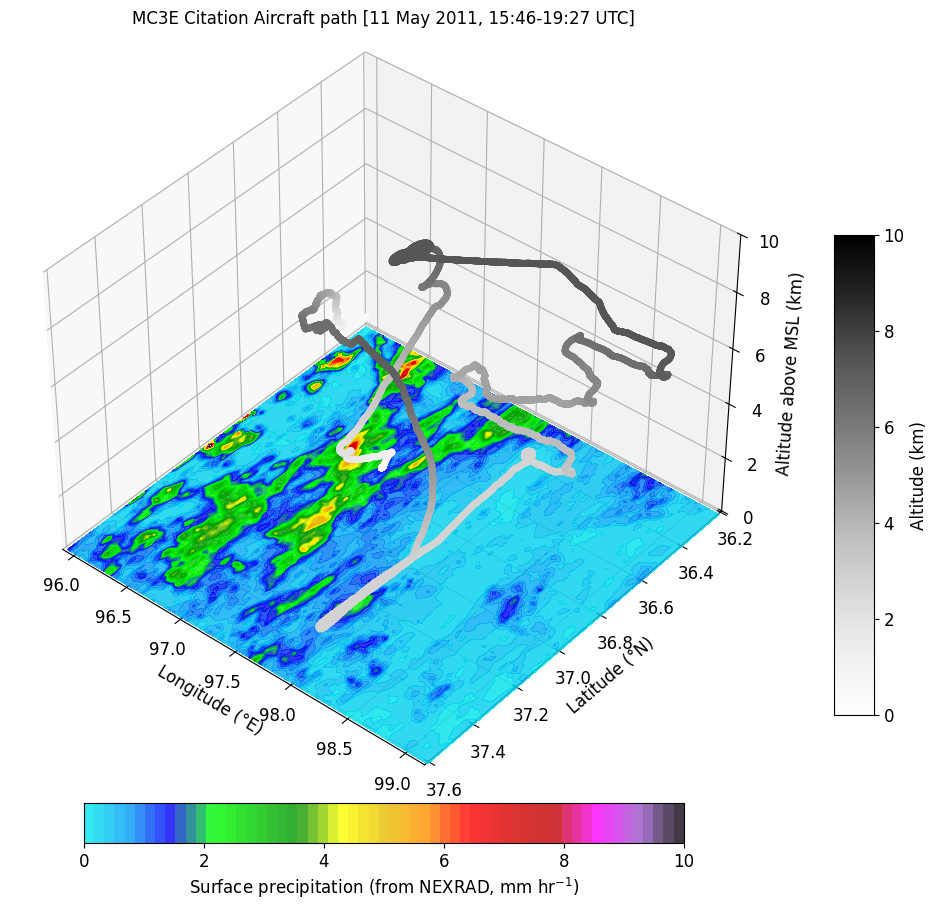

In [8]:

# Flight data
file_path = '/work/bb1163/b382718/output/mc3e/observations/aircraft_optical_probe_data/GHRC_DATA/2011_05_11_15_46_09_v2.mc3e'
data_v2 = pd.read_csv(file_path, sep='\s+', header=None, skiprows=63)

data_v2.columns = ['time', 'air_temp', 'machno', 'ias', 'tas', 
                   'pres_alt', 'pot_temp', 'pitot_wing', 'cabin_pres', 'static_pr',
                   'dewpt', 'mix_ratio', 'dew_point', 'frost_point', 'pos_roll', 
                   'pos_pitch', 'pos_head', 'posz_acc', 'pos_lat', 'pos_lon',
                   'pos_alt', 'pos_spd', 'pos_trk', 'alpha', 'beta', 
                   'wind_z', 'vert_vel', 'wind_m', 'wind_d', 'turb',
                   'lwc_king', 'twc_nev', 'lwc_nev', 'conc_cdp', 'lwc_cdp', 
                   'cdp_meanD', 'cdp_volD', 'cdp_effrad', 'conc_2dc', '2dc_meanD',
                   '2dc_volD', '2dc_effrad', 'icemsofreq', 'cpc_conc', 'tsg_gate']


data_v2.loc[data_v2.pos_lon == 9999.999999, 'pos_lon'] = np.nan
data_v2.loc[data_v2.pos_lat == 999.9999999, 'pos_lat'] = np.nan


mean_lon = data_v2.pos_lon
mean_lat = data_v2.pos_lat
mean_alt = 1.e-3*data_v2.pres_alt


lon_min, lon_max = np.nanmin(mean_lon), np.nanmax(mean_lon)
lat_min, lat_max = np.nanmin(mean_lat), np.nanmax(mean_lat)

ds_nexrad = ds_nexrad.where(
    (ds_nexrad.Long >= lon_min) & (ds_nexrad.Long <= lon_max) &
    (ds_nexrad.Lat >= lat_min) & (ds_nexrad.Lat <= lat_max), 
    drop=True
)

avg_precip_obs = xr.where(ds_nexrad.Precipitation > 0., ds_nexrad.Precipitation, np.nan)
#avg_precip_obs = avg_precip_obs.mean(dim=('time'))

lon_nexrad = ds_nexrad.Long
lat_nexrad = ds_nexrad.Lat



# Create 3D plot
fnt = 12
plt.style.use('default')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot radar reflectivity using contourf at z=0
# This is much simpler and more reliable
altitude_base = -1  # Ground level
levels = np.linspace(-10, 30, 30)
lev = np.linspace(0, 10, 60)

# Plot using contourf, which handles dimensions correctly
contour = ax.contourf(-1*ds_nexrad.Long, ds_nexrad.Lat, avg_precip_obs.mean(dim=('time')), 
                      cmap='pyart_NWSRef', levels=lev,
                     zdir='z', offset=-0.1, alpha=0.8)
#contour = ax.contourf(ds_refl_obs.lon, ds_refl_obs.lat, refl_values, 
#                      levels=levels,
#                      cmap=radar_cmap,
#                      zdir='z', 
#                      offset=altitude_base,
#                      alpha=0.8)

# Plot aircraft track
sc = ax.scatter(-1*mean_lon, mean_lat, mean_alt, c=mean_alt, cmap='Greys', s=15, vmin=0, vmax=10)
#sc = ax.scatter(mean_lon, mean_lat, mean_alt, c=mean_alt, cmap='turbo', s=20, 
#                vmin=0, vmax=8, edgecolors='black', linewidth=0.5)

# Add colorbars
cbar_ax1 = fig.add_axes([0.95, 0.1, 0.04, 0.6])
cbar1 = plt.colorbar(sc, cax=cbar_ax1, ticks=[0, 2, 4, 6, 8, 10], pad=0.1, shrink=0.6, aspect=15)
cbar1.set_label('Altitude (km)', fontsize=fnt)
cbar1.ax.tick_params(labelsize=fnt)

# Create a second colorbar for reflectivity
cbar_ax2 = fig.add_axes([0.2, -0.06, 0.6, 0.05])  # [left, bottom, width, height]
cbar2 = plt.colorbar(contour, cax=cbar_ax2, ticks=[0, 2, 4, 6, 8, 10], 
                     orientation='horizontal',
                     label='Surface precipitation (mm hr$^{-1}$)', pad=0.15, shrink=0.6)

cbar2.ax.tick_params(labelsize=12)
cbar2.set_label(label='Surface precipitation (from NEXRAD, mm hr$^{-1}$)', size=fnt)

#cbar2 = plt.colorbar(contour, ax=ax, ticks=[-10, -5, 0, 5, 10, 15, 20, 25, 30], 
#                     pad=0.15, shrink=0.6, aspect=15)
#cbar2.set_label('Radar Reflectivity (dBZ)', fontsize=fnt)
#cbar2.ax.tick_params(labelsize=fnt)


# Set axis properties
#ax.set_xlim(lon_min, lon_max)
#ax.set_ylim(lat_min, lat_max)

ax.set_xlim(-1*np.nanmin(mean_lon), -1*np.nanmax(mean_lon))
ax.set_ylim(np.nanmin(mean_lat), np.nanmax(mean_lat))

#ax.set_xlim(95, 100)
#ax.set_ylim(36, 37.5)

ax.set_zlim(0, 10)
ax.set_xlabel('Longitude (°E)', fontsize=fnt)
ax.set_ylabel('Latitude (°N)', fontsize=fnt)
ax.set_zlabel('Altitude above MSL (km)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)
ax.tick_params(axis='y', labelsize=fnt)
ax.tick_params(axis='z', labelsize=fnt)
ax.set_title('MC3E Citation Aircraft path [11 May 2011, 15:46-19:27 UTC]', fontsize=fnt)

# Set view angle
ax.view_init(elev=40, azim=130)

plt.grid(True, linestyle='-', linewidth=3, color='k', alpha=1)
cbar_ax1.grid(False)
cbar_ax2.grid(False)
#for lon in np.linspace(lon_min, lon_max, num=10):
#    ax.plot([lon]*2, [lat_min, lat_max], [0, 0], color='gray', linestyle=':', linewidth=0.8)
#for lat in np.linspace(lat_min, lat_max, num=10):
#    ax.plot([lon_min, lon_max], [lat]*2, [0, 0], color='gray', linestyle=':', linewidth=0.8)



plt.tight_layout()
plt.show()


print()

In [63]:
ds_4sip.time

<xarray.DataArray 'time' (time: 121)>
array(['2011-05-10T00:00:00.000000000', '2011-05-10T00:30:00.000000000',
       '2011-05-10T01:00:00.000000000', '2011-05-10T01:30:00.000000000',
       '2011-05-10T02:00:00.000000000', '2011-05-10T02:30:00.000000000',
       '2011-05-10T03:00:00.000000000', '2011-05-10T03:30:00.000000000',
       '2011-05-10T04:00:00.000000000', '2011-05-10T04:30:00.000000000',
       '2011-05-10T05:00:00.000000000', '2011-05-10T05:30:00.000000000',
       '2011-05-10T06:00:00.000000000', '2011-05-10T06:30:00.000000000',
       '2011-05-10T07:00:00.000000000', '2011-05-10T07:30:00.000000000',
       '2011-05-10T08:00:00.000000000', '2011-05-10T08:30:00.000000000',
       '2011-05-10T09:00:00.000000000', '2011-05-10T09:30:00.000000000',
       '2011-05-10T10:00:00.000000000', '2011-05-10T10:30:00.000000000',
       '2011-05-10T11:00:00.000000000', '2011-05-10T11:30:00.000000000',
       '2011-05-10T12:00:00.000000000', '2011-05-10T12:30:00.000000000',
       '2011-05-10T13:00:00.000000000', '2011-05-10T13:30:00.000000000',
       '2011-05-10T14:00:00.000000000', '2011-05-10T14:30:00.000000000',
       '2011-05-10T15:00:00.000000000', '2011-05-10T15:30:00.000000000',
       '2011-05-10T16:00:00.000000000', '2011-05-10T16:30:00.000000000',
       '2011-05-10T17:00:00.000000000', '2011-05-10T17:30:00.000000000',
       '2011-05-10T18:00:00.000000000', '2011-05-10T18:30:00.000000000',
       '2011-05-10T19:00:00.000000000', '2011-05-10T19:30:00.000000000',
       '2011-05-10T20:00:00.000000000', '2011-05-10T20:30:00.000000000',
       '2011-05-10T21:00:00.000000000', '2011-05-10T21:30:00.000000000',
       '2011-05-10T22:00:00.000000000', '2011-05-10T22:30:00.000000000',
       '2011-05-10T23:00:00.000000000', '2011-05-10T23:30:00.000000000',
       '2011-05-11T00:00:00.000000000', '2011-05-11T00:30:00.000000000',
       '2011-05-11T01:00:00.000000000', '2011-05-11T01:30:00.000000000',
       '2011-05-11T02:00:00.000000000', '2011-05-11T02:30:00.000000000',
       '2011-05-11T03:00:00.000000000', '2011-05-11T03:30:00.000000000',
       '2011-05-11T04:00:00.000000000', '2011-05-11T04:30:00.000000000',
       '2011-05-11T05:00:00.000000000', '2011-05-11T05:30:00.000000000',
       '2011-05-11T06:00:00.000000000', '2011-05-11T06:30:00.000000000',
       '2011-05-11T07:00:00.000000000', '2011-05-11T07:30:00.000000000',
       '2011-05-11T08:00:00.000000000', '2011-05-11T08:30:00.000000000',
       '2011-05-11T09:00:00.000000000', '2011-05-11T09:30:00.000000000',
       '2011-05-11T10:00:00.000000000', '2011-05-11T10:30:00.000000000',
       '2011-05-11T11:00:00.000000000', '2011-05-11T11:30:00.000000000',
       '2011-05-11T12:00:00.000000000', '2011-05-11T12:30:00.000000000',
       '2011-05-11T13:00:00.000000000', '2011-05-11T13:30:00.000000000',
       '2011-05-11T14:00:00.000000000', '2011-05-11T14:30:00.000000000',
       '2011-05-11T15:00:00.000000000', '2011-05-11T15:30:00.000000000',
       '2011-05-11T16:00:00.000000000', '2011-05-11T16:30:00.000000000',
       '2011-05-11T17:00:00.000000000', '2011-05-11T17:30:00.000000000',
       '2011-05-11T18:00:00.000000000', '2011-05-11T18:30:00.000000000',
       '2011-05-11T19:00:00.000000000', '2011-05-11T19:30:00.000000000',
       '2011-05-11T20:00:00.000000000', '2011-05-11T20:30:00.000000000',
       '2011-05-11T21:00:00.000000000', '2011-05-11T21:30:00.000000000',
       '2011-05-11T22:00:00.000000000', '2011-05-11T22:30:00.000000000',
       '2011-05-11T23:00:00.000000000', '2011-05-11T23:30:00.000000000',
       '2011-05-12T00:00:00.000000000', '2011-05-12T00:30:00.000000000',
       '2011-05-12T01:00:00.000000000', '2011-05-12T01:30:00.000000000',
       '2011-05-12T02:00:00.000000000', '2011-05-12T02:30:00.000000000',
       '2011-05-12T03:00:00.000000000', '2011-05-12T03:30:00.000000000',
       '2011-05-12T04:00:00.000000000', '2011-05-12T04:30:00.000000000',
       '2011-05-12T05:00:00.000000000', '2011-05-12T05:30:00.000000000',
       '2011-05-12T0

In [3]:

def calc_dewpoint(tempc, rh):
    dewpoint = tempc - ((100. - rh)/5.)
    return dewpoint

def calc_vir_temp(tc, q):
    #virt_tempk_wk = t/(1. - (ev/p)*(1-0.622))
    temp = tc + (1-0.622*q)
    return temp
    
def calculate_lcl(pressure, temperature, dewpoint):
    l = np.argmin(np.abs(temperature - dewpoint))
    return pressure[l], temperature[l]
    
def e_sat_hpa(tc):
    e_sat_pa = 6.112*np.exp((17.67*tc)/(tc+243.5))
    return e_sat_pa

def calc_parcel_temp(pres, ht, q_sat, tk_lcl):
    grav = 9.8  # acceleration due to gravity [m/s^2]
    eps = 0.622  # ratio of the gas constants for water vapor and dry air
    Rd = 287.  # specific gas constant for dry air [J/(kg*K)]
    cp = 1005.  # specific heat capacity at constant pressure for dry air [J/(kg*K)]
    lv = 2.5e6  # latent heat of vaporization [J/kg]
    Rv = 461.  # specific gas constant for water vapor [J/(kg*K)]

    tk_parcel = np.zeros(len(ht))  
    del_t_par = np.zeros(len(ht))  

    tk_parcel[0] = tk_lcl + 273.15 
    
    for i in range(1, len(ht)):
        dht = ht[i] - ht[i - 1]  
        qs = q_sat[i]  
        term_a = 1. + lv * qs / (Rd * tk_parcel[i - 1])
        term_b = (lv ** 2.) * eps * qs
        term_c = Rd * (tk_parcel[i - 1]) ** 2.
        
        del_t_par[i] = grav * term_a / (cp + (term_b / term_c))

        tk_parcel[i] = tk_parcel[i - 1] - del_t_par[i] * dht
        
    tempc = tk_parcel - 273.15
    return tempc

import numpy as np



def calc_cape(pres, t_env, t_par, tv_env, tv_par):
    """
    Calculate Convective Available Potential Energy (CAPE).
    
    Parameters:
        pres (array): Pressure levels (hPa or Pa).
        t_env (array): Environmental temperature (°C).
        t_par (array): Parcel temperature (°C).
        tv_env (array): Environmental virtual temperature (°C).
        tv_par (array): Parcel virtual temperature (°C).
    
    Returns:
        cape (float): CAPE value (J/kg).
    """
    Rd = 287.0  # gas constant for dry air (J/kg/K)
    
    # Convert temperatures to Kelvin
    tk_env = t_env + 273.15
    tk_v_env = tv_env + 273.15
    tk_par = t_par + 273.15
    tk_v_par = tv_par + 273.15
    
    cape = 0.0
    
    # Loop through pressure levels
    for i in range(1, len(pres)):
        # Check if parcel is warmer than the environment
        if tk_v_par[i] > tk_v_env[i]:
            # Calculate logarithmic pressure difference
            dlnp = np.log(pres[i-1] / pres[i])
            cape = cape + Rd * (tk_v_par[i] - tk_v_env[i]) * dlnp
    return cape
        

In [4]:

e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
parcel_temp = calc_parcel_temp(avg_pres, avg_ht, q_sat, lcl_temp)
Tv_env = calc_vir_temp(avg_tempc, avg_qv)
Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
parcel_cape = calc_cape(avg_pres, avg_tempc, parcel_temp, Tv_env, Tv_parcel)

#parcel_temp[(parcel_temp < 0.) & (avg_pres <= 190.)] = np.nan
#parcel_temp[(parcel_temp > 0.) & (avg_pres >= 650.)] = np.nan


NameError: name 'avg_tempc' is not defined

CAPE ::  353.04706063248955


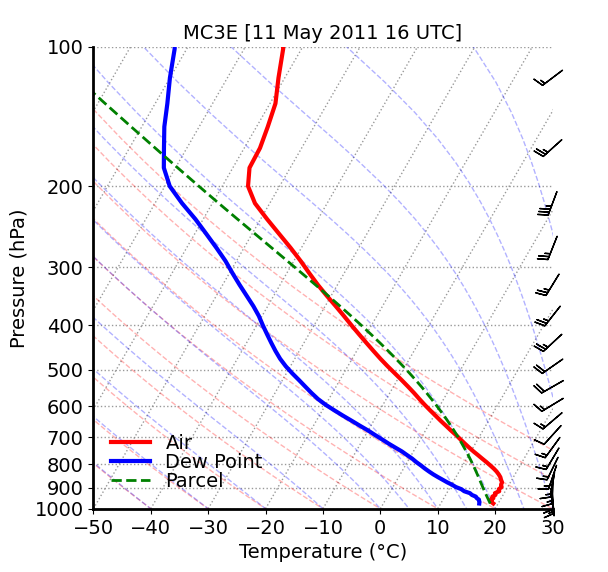

In [6]:

ds_skewt = ds_4sip.sel(time=ds_4sip.time[32])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

#----- Calculate parcel properties
e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
parcel_temp = calc_parcel_temp(avg_pres, avg_ht, q_sat, lcl_temp)
Tv_env = calc_vir_temp(avg_tempc, avg_qv)
Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
parcel_cape = calc_cape(avg_pres, avg_tempc, parcel_temp, Tv_env, Tv_parcel)
print('CAPE :: ', parcel_cape)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 6))
plt.style.use('default')
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)
# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::3], u_wind[::3], v_wind[::3], length=6, color='black', pivot='middle')#, flagscale=0.5)

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 30)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('MC3E [11 May 2011 16 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()

# Radiative fluxes
##### SW CRE = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)
##### LW CRE = (Qcld_lw_dn - Qcld_lw_up) - (Qclear_lw_dn - Qclear_lw_up)
##### Net CRE = SW_CRE + LW_CRE

In [61]:


ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/control/mc3e_2mom_sip/NWP_*2011051*.nc');

ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/nosip/mc3e_2mom_nosip/NWP_*2011051*.nc');
ds_norf = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/norf/mc3e_2mom_norf/NWP_*2011051*.nc');
ds_nohm = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/nohm/mc3e_2mom_nohm/NWP_*2011051*.nc');
ds_nobr = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/nobr/mc3e_2mom_nobr/NWP_*2011051*.nc');
ds_nosb = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/nosb/mc3e_2mom_nosb/NWP_*2011051*.nc');


ds_4sip_no_rad_coupl = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/no_rad_phy_coupling/mc3e_2mom_sip/NWP_*2011051*.nc');


In [62]:



ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['tq'] = ds_nosip.qc+ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['tq'] = ds_4sip.qc+ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl

ds_norf['w_vel'] = -1.*ds_norf.omega/(9.8*ds_norf.rho)
ds_norf['tempc'] = ds_norf.temp-273.16;
ds_norf['lwc_gperm3']  = ds_norf.qc*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tqi'] = ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
ds_norf['tq'] = ds_norf.qc+ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
ds_norf['ciwc_gperm3'] = ds_norf.qi*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tiwc_gperm3'] = (ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh)*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['cdnc_percm3'] = ds_norf.qnc*ds_norf.rho*1.e-6  # perkg to percm3
ds_norf['inc_perl'] = (ds_norf.qni+ds_norf.qns+ds_norf.qng+ds_norf.qnh)*ds_norf.rho*1.e-3 # perkg to perl

ds_nohm['w_vel'] = -1.*ds_nohm.omega/(9.8*ds_nohm.rho)
ds_nohm['tempc'] = ds_nohm.temp-273.16;
ds_nohm['lwc_gperm3']  = ds_nohm.qc*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tqi'] = ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
ds_nohm['tq'] = ds_nohm.qc+ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
ds_nohm['ciwc_gperm3'] = ds_nohm.qi*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tiwc_gperm3'] = (ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh)*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['cdnc_percm3'] = ds_nohm.qnc*ds_nohm.rho*1.e-6  # perkg to percm3
ds_nohm['inc_perl'] = (ds_nohm.qni+ds_nohm.qns+ds_nohm.qng+ds_nohm.qnh)*ds_nohm.rho*1.e-3 # perkg to perl

ds_nobr['w_vel'] = -1.*ds_nobr.omega/(9.8*ds_nobr.rho)
ds_nobr['tempc'] = ds_nobr.temp-273.16;
ds_nobr['lwc_gperm3']  = ds_nobr.qc*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tqi'] = ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
ds_nobr['tq'] = ds_nobr.qc+ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
ds_nobr['ciwc_gperm3'] = ds_nobr.qi*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tiwc_gperm3'] = (ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh)*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['cdnc_percm3'] = ds_nobr.qnc*ds_nobr.rho*1.e-6  # perkg to percm3
ds_nobr['inc_perl'] = (ds_nobr.qni+ds_nobr.qns+ds_nobr.qng+ds_nobr.qnh)*ds_nobr.rho*1.e-3 # perkg to perl

ds_nosb['w_vel'] = -1.*ds_nosb.omega/(9.8*ds_nosb.rho)
ds_nosb['tempc'] = ds_nosb.temp-273.16;
ds_nosb['lwc_gperm3']  = ds_nosb.qc*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tqi'] = ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
ds_nosb['tq'] = ds_nosb.qc+ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
ds_nosb['ciwc_gperm3'] = ds_nosb.qi*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tiwc_gperm3'] = (ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh)*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['cdnc_percm3'] = ds_nosb.qnc*ds_nosb.rho*1.e-6  # perkg to percm3
ds_nosb['inc_perl'] = (ds_nosb.qni+ds_nosb.qns+ds_nosb.qng+ds_nosb.qnh)*ds_nosb.rho*1.e-3 # perkg to perl

ds_4sip_no_rad_coupl['w_vel'] = -1.*ds_4sip_no_rad_coupl.omega/(9.8*ds_4sip_no_rad_coupl.rho)
ds_4sip_no_rad_coupl['tempc'] = ds_4sip_no_rad_coupl.temp-273.16;
ds_4sip_no_rad_coupl['lwc_gperm3']  = ds_4sip_no_rad_coupl.qc*ds_4sip_no_rad_coupl.rho*1.e3 # kgperm3 to gperm3
ds_4sip_no_rad_coupl['tqi'] = ds_4sip_no_rad_coupl.qi+ds_4sip_no_rad_coupl.qs+ds_4sip_no_rad_coupl.qg+ds_4sip_no_rad_coupl.qh
ds_4sip_no_rad_coupl['tq'] = ds_4sip_no_rad_coupl.qc+ds_4sip_no_rad_coupl.qi+ds_4sip_no_rad_coupl.qs+ds_4sip_no_rad_coupl.qg+ds_4sip_no_rad_coupl.qh
ds_4sip_no_rad_coupl['ciwc_gperm3'] = ds_4sip_no_rad_coupl.qi*ds_4sip_no_rad_coupl.rho*1.e3 # kgperm3 to gperm3
ds_4sip_no_rad_coupl['tiwc_gperm3'] = (ds_4sip_no_rad_coupl.qi+ds_4sip_no_rad_coupl.qs+ds_4sip_no_rad_coupl.qg+ds_4sip_no_rad_coupl.qh)*ds_4sip_no_rad_coupl.rho*1.e3 # kgperm3 to gperm3
ds_4sip_no_rad_coupl['cdnc_percm3'] = ds_4sip_no_rad_coupl.qnc*ds_4sip_no_rad_coupl.rho*1.e-6  # perkg to percm3
ds_4sip_no_rad_coupl['inc_perl'] = (ds_4sip_no_rad_coupl.qni+ds_4sip_no_rad_coupl.qns+ds_4sip_no_rad_coupl.qng+ds_4sip_no_rad_coupl.qnh)*ds_4sip_no_rad_coupl.rho*1.e-3 # perkg to perl

ds_4sip_rc_new = ds_4sip.sel(ncells=mask)
ds_4sip_nrc_new = ds_4sip_no_rad_coupl.sel(ncells=mask)

ds_nosip_rc_new = ds_nosip.sel(ncells=mask)
ds_norf_rc_new = ds_norf.sel(ncells=mask)
ds_nohm_rc_new = ds_nohm.sel(ncells=mask)
ds_nobr_rc_new = ds_nobr.sel(ncells=mask)
ds_nosb_rc_new = ds_nosb.sel(ncells=mask)


In [69]:

## With radiative-microphysical coupling (Reff in radiation dependent on Nice)
toa_sw_up_rc_4sip = ds_4sip_rc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_rc_4sip = ds_4sip_rc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_rc_4sip = ds_4sip_rc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_rc_4sip = ds_4sip_rc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_rc_4sip = ds_4sip_rc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_rc_4sip = ds_4sip_rc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_rc_4sip = ds_4sip_rc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_rc_4sip = ds_4sip_rc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_rc_4sip = toa_lw_dn_rc_4sip - toa_lw_up_rc_4sip
toa_sw_net_rc_4sip = toa_sw_dn_rc_4sip - toa_sw_up_rc_4sip

toa_sw_cre_rc_4sip = (toa_sw_dn_rc_4sip-toa_sw_up_rc_4sip) - (toa_sw_dn_clr_rc_4sip-toa_sw_up_clr_rc_4sip)
toa_lw_cre_rc_4sip = (toa_sw_dn_rc_4sip-toa_lw_up_rc_4sip) - (toa_sw_dn_clr_rc_4sip-toa_lw_up_clr_rc_4sip)
toa_net_cre_rc_4sip = toa_sw_cre_rc_4sip+toa_lw_cre_rc_4sip

## No SIP
toa_sw_up_rc_nosip = ds_nosip_rc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_rc_nosip = ds_nosip_rc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_rc_nosip = ds_nosip_rc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_rc_nosip = ds_nosip_rc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_rc_nosip = ds_nosip_rc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_rc_nosip = ds_nosip_rc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_rc_nosip = ds_nosip_rc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_rc_nosip = ds_nosip_rc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_rc_nosip = toa_lw_dn_rc_nosip - toa_lw_up_rc_nosip
toa_sw_net_rc_nosip = toa_sw_dn_rc_nosip - toa_sw_up_rc_nosip

toa_sw_cre_rc_nosip = (toa_sw_dn_rc_nosip-toa_sw_up_rc_nosip) - (toa_sw_dn_clr_rc_nosip-toa_sw_up_clr_rc_nosip)
toa_lw_cre_rc_nosip = (toa_sw_dn_rc_nosip-toa_lw_up_rc_nosip) - (toa_sw_dn_clr_rc_nosip-toa_lw_up_clr_rc_nosip)
toa_net_cre_rc_nosip = toa_sw_cre_rc_nosip+toa_lw_cre_rc_nosip

## No RF
toa_sw_up_rc_norf = ds_norf_rc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_rc_norf = ds_norf_rc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_rc_norf = ds_norf_rc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_rc_norf = ds_norf_rc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_rc_norf = ds_norf_rc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_rc_norf = ds_norf_rc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_rc_norf = ds_norf_rc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_rc_norf = ds_norf_rc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_rc_norf = toa_lw_dn_rc_norf - toa_lw_up_rc_norf
toa_sw_net_rc_norf = toa_sw_dn_rc_norf - toa_sw_up_rc_norf

toa_sw_cre_rc_norf = (toa_sw_dn_rc_norf-toa_sw_up_rc_norf) - (toa_sw_dn_clr_rc_norf-toa_sw_up_clr_rc_norf)
toa_lw_cre_rc_norf = (toa_sw_dn_rc_norf-toa_lw_up_rc_norf) - (toa_sw_dn_clr_rc_norf-toa_lw_up_clr_rc_norf)
toa_net_cre_rc_norf = toa_sw_cre_rc_norf+toa_lw_cre_rc_norf

## No HM
toa_sw_up_rc_nohm = ds_nohm_rc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_rc_nohm = ds_nohm_rc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_rc_nohm = ds_nohm_rc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_rc_nohm = ds_nohm_rc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_rc_nohm = ds_nohm_rc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_rc_nohm = ds_nohm_rc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_rc_nohm = ds_nohm_rc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_rc_nohm = ds_nohm_rc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_rc_nohm = toa_lw_dn_rc_nohm - toa_lw_up_rc_nohm
toa_sw_net_rc_nohm = toa_sw_dn_rc_nohm - toa_sw_up_rc_nohm

toa_sw_cre_rc_nohm = (toa_sw_dn_rc_nohm-toa_sw_up_rc_nohm) - (toa_sw_dn_clr_rc_nohm-toa_sw_up_clr_rc_nohm)
toa_lw_cre_rc_nohm = (toa_sw_dn_rc_nohm-toa_lw_up_rc_nohm) - (toa_sw_dn_clr_rc_nohm-toa_lw_up_clr_rc_nohm)
toa_net_cre_rc_nohm = toa_sw_cre_rc_nohm+toa_lw_cre_rc_nohm


## No IIC
toa_sw_up_rc_nobr = ds_nobr_rc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_rc_nobr = ds_nobr_rc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_rc_nobr = ds_nobr_rc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_rc_nobr = ds_nobr_rc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_rc_nobr = ds_nobr_rc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_rc_nobr = ds_nobr_rc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_rc_nobr = ds_nobr_rc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_rc_nobr = ds_nobr_rc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_rc_nobr = toa_lw_dn_rc_nobr - toa_lw_up_rc_nobr
toa_sw_net_rc_nobr = toa_sw_dn_rc_nobr - toa_sw_up_rc_nobr

toa_sw_cre_rc_nobr = (toa_sw_dn_rc_nobr-toa_sw_up_rc_nobr) - (toa_sw_dn_clr_rc_nobr-toa_sw_up_clr_rc_nobr)
toa_lw_cre_rc_nobr = (toa_sw_dn_rc_nobr-toa_lw_up_rc_nobr) - (toa_sw_dn_clr_rc_nobr-toa_lw_up_clr_rc_nobr)
toa_net_cre_rc_nobr = toa_sw_cre_rc_nobr+toa_lw_cre_rc_nobr

## No SB
toa_sw_up_rc_nosb = ds_nosb_rc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_rc_nosb = ds_nosb_rc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_rc_nosb = ds_nosb_rc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_rc_nosb = ds_nosb_rc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_rc_nosb = ds_nosb_rc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_rc_nosb = ds_nosb_rc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_rc_nosb = ds_nosb_rc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_rc_nosb = ds_nosb_rc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_rc_nosb = toa_lw_dn_rc_nosb - toa_lw_up_rc_nosb
toa_sw_net_rc_nosb = toa_sw_dn_rc_nosb - toa_sw_up_rc_nosb

toa_sw_cre_rc_nosb = (toa_sw_dn_rc_nosb-toa_sw_up_rc_nosb) - (toa_sw_dn_clr_rc_nosb-toa_sw_up_clr_rc_nosb)
toa_lw_cre_rc_nosb = (toa_sw_dn_rc_nosb-toa_lw_up_rc_nosb) - (toa_sw_dn_clr_rc_nosb-toa_lw_up_clr_rc_nosb)
toa_net_cre_rc_nosb = toa_sw_cre_rc_nosb+toa_lw_cre_rc_nosb


## Without radiative-microphysical coupling (Reff in radiation independent on Nice)
toa_sw_up_nrc_4sip = ds_4sip_nrc_new.swflx_up.isel(height_2=0).mean('ncells') 
toa_sw_up_clr_nrc_4sip = ds_4sip_nrc_new.swflx_up_clr.isel(height_2=0).mean('ncells') 
toa_lw_up_nrc_4sip = ds_4sip_nrc_new.lwflx_up.isel(height_2=0).mean('ncells') 
toa_lw_up_clr_nrc_4sip = ds_4sip_nrc_new.lwflx_up_clr.isel(height_2=0).mean('ncells') 

toa_sw_dn_nrc_4sip = ds_4sip_nrc_new.swflx_dn.isel(height_2=0).mean('ncells') 
toa_sw_dn_clr_nrc_4sip = ds_4sip_nrc_new.swflx_dn_clr.isel(height_2=0).mean('ncells') 
toa_lw_dn_nrc_4sip = ds_4sip_nrc_new.lwflx_dn.isel(height_2=0).mean('ncells') 
toa_lw_dn_clr_nrc_4sip = ds_4sip_nrc_new.lwflx_dn_clr.isel(height_2=0).mean('ncells') 

toa_lw_net_nrc_4sip = toa_lw_dn_nrc_4sip - toa_lw_up_nrc_4sip
toa_sw_net_nrc_4sip = toa_sw_dn_nrc_4sip - toa_sw_up_nrc_4sip

toa_sw_cre_nrc_4sip = (toa_sw_dn_nrc_4sip-toa_sw_up_nrc_4sip) - (toa_sw_dn_clr_nrc_4sip-toa_sw_up_clr_nrc_4sip)
toa_lw_cre_nrc_4sip = (toa_sw_dn_nrc_4sip-toa_lw_up_nrc_4sip) - (toa_sw_dn_clr_nrc_4sip-toa_lw_up_clr_nrc_4sip)
toa_net_cre_nrc_4sip = toa_sw_cre_nrc_4sip+toa_lw_cre_nrc_4sip



In [60]:

ds_obs = xr.open_mfdataset('/work/bk1415/b382718/output/mc3e/observations/precipitation/sgp180varanaiopsndg150kmv3C1.c1.20110422.000000.cdf');



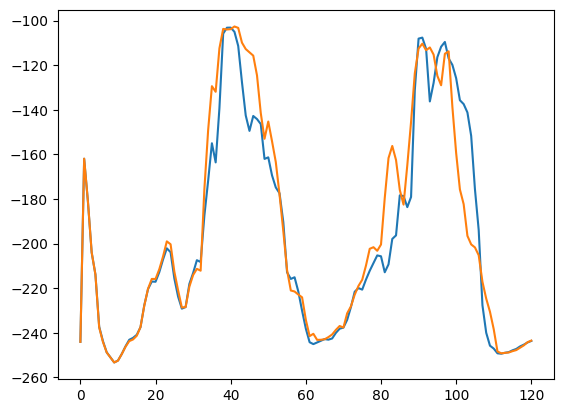

In [70]:
plt.plot(toa_lw_net_rc_nosip)
plt.plot(toa_lw_net_rc_4sip)

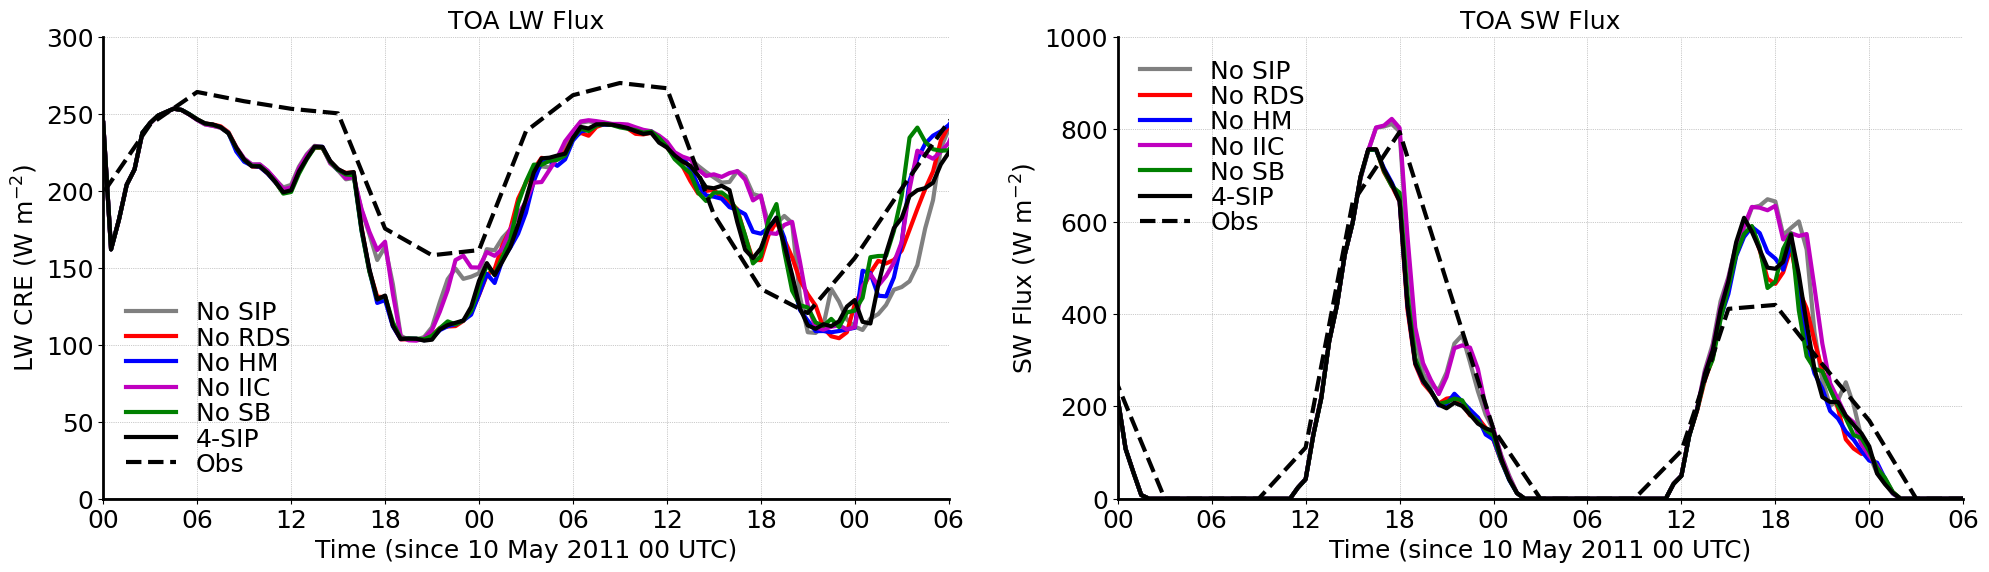

In [71]:


plt.figure(figsize=(24, 6))

lnwdth=3
fontsize=18

plt.subplot(1,2,1)
plt.axhline(y=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

plt.plot(ds_nosip_rc_new.time, -1*toa_lw_net_rc_nosip, '-', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(ds_norf_rc_new.time, -1*toa_lw_net_rc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(ds_nohm_rc_new.time, -1*toa_lw_net_rc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(ds_nobr_rc_new.time, -1*toa_lw_net_rc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(ds_nosb_rc_new.time, -1*toa_lw_net_rc_nosb, 'g-', linewidth=lnwdth, label='No SB')
plt.plot(ds_4sip_rc_new.time, -1*toa_lw_net_rc_4sip, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(ds_obs.time, ds_obs.lw_net_toa, 'k--', linewidth=lnwdth, label='Obs')

plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 10, 0, 0) 
end_date = datetime(2011, 5, 12, 6, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(0,300)
plt.yticks(fontsize=fontsize)
plt.ylabel('LW CRE (W m$^{-2}$)', fontsize=fontsize)#, fontweight='bold')
plt.title('TOA LW Flux', fontsize=fontsize)#, fontweight='bold')
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.subplot(1,2,2)
plt.axhline(y=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

plt.plot(ds_nosip_rc_new.time, toa_sw_net_rc_nosip, '-', color='grey', linewidth=lnwdth, label='No SIP')
plt.plot(ds_norf_rc_new.time, toa_sw_net_rc_norf, 'r-', linewidth=lnwdth, label='No RDS')
plt.plot(ds_nohm_rc_new.time, toa_sw_net_rc_nohm, 'b-', linewidth=lnwdth, label='No HM')
plt.plot(ds_nobr_rc_new.time, toa_sw_net_rc_nobr, 'm-', linewidth=lnwdth, label='No IIC')
plt.plot(ds_nosb_rc_new.time, toa_sw_net_rc_nosb, 'g-', linewidth=lnwdth, label='No SB')
plt.plot(ds_4sip_rc_new.time, toa_sw_net_rc_4sip, 'k-', linewidth=lnwdth, label='4-SIP')
plt.plot(ds_obs.time, ds_obs.sw_net_toa, 'k--', linewidth=lnwdth, label='Obs')

plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 10, 0, 0) 
end_date = datetime(2011, 5, 12, 6, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(0, 1000)
plt.yticks(fontsize=fontsize)
plt.ylabel('SW Flux (W m$^{-2}$)', fontsize=fontsize)#, fontweight='bold')
plt.title('TOA SW Flux', fontsize=fontsize)#, fontweight='bold')
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()


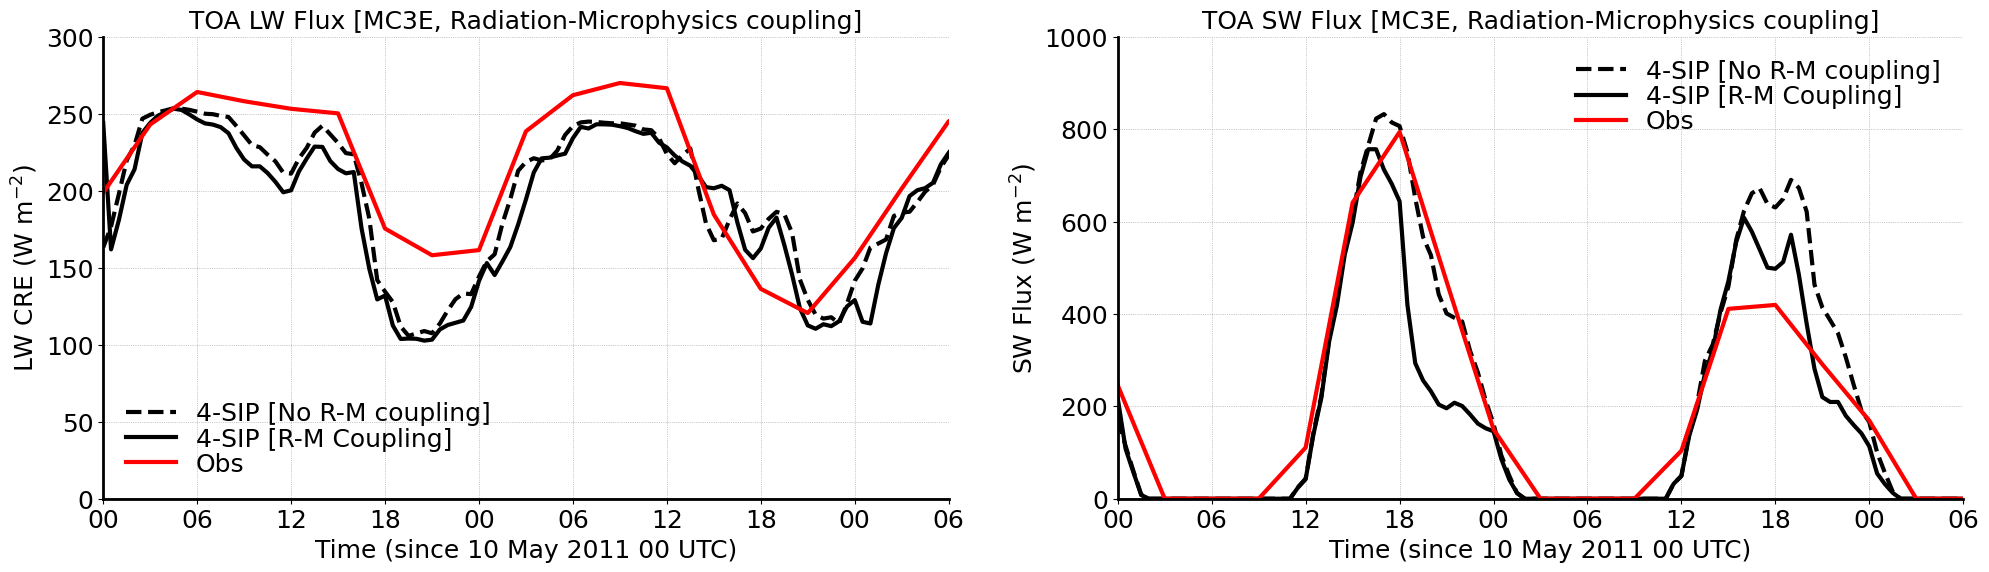

In [58]:


plt.figure(figsize=(24, 6))

lnwdth=3
fontsize=18

plt.subplot(1,2,1)
plt.axhline(y=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

plt.plot(ds_4sip_nrc_new.time, -1*toa_lw_net_nrc_4sip, 'k--', linewidth=lnwdth, label='4-SIP [No R-M coupling]')
plt.plot(ds_4sip_rc_new.time, -1*toa_lw_net_rc_4sip, 'k-', linewidth=lnwdth, label='4-SIP [R-M coupling]')
plt.plot(ds_obs.time, ds_obs.lw_net_toa, 'r-', linewidth=lnwdth, label='Obs')

plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 10, 0, 0) 
end_date = datetime(2011, 5, 12, 6, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(0,300)
plt.yticks(fontsize=fontsize)
plt.ylabel('LW CRE (W m$^{-2}$)', fontsize=fontsize)#, fontweight='bold')
plt.title('TOA LW Flux [MC3E, Radiation-Microphysics coupling]', fontsize=fontsize)#, fontweight='bold')
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.subplot(1,2,2)
plt.axhline(y=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

plt.plot(ds_4sip_nrc_new.time, toa_sw_net_nrc_4sip, 'k--', linewidth=lnwdth, label='4-SIP [No R-M coupling]')
plt.plot(ds_4sip_rc_new.time, toa_sw_net_rc_4sip, 'k-', linewidth=lnwdth, label='4-SIP [R-M coupling]')
plt.plot(ds_obs.time, ds_obs.sw_net_toa, 'r-', linewidth=lnwdth, label='Obs')

plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 10, 0, 0) 
end_date = datetime(2011, 5, 12, 6, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(0, 1000)
plt.yticks(fontsize=fontsize)
plt.ylabel('SW Flux (W m$^{-2}$)', fontsize=fontsize)#, fontweight='bold')
plt.title('TOA SW Flux [MC3E, Radiation-Microphysics coupling]', fontsize=fontsize)#, fontweight='bold')
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()


In [33]:

def calc_dewpoint(tempc, rh):
    dewpoint = tempc - ((100. - rh)/5.)
    return dewpoint


def calc_tdew(t, rh):        # Magnus-Tetens approximation
    a = 17.27; b = 237.7;
    alpha = (a*t/(b+t)) + np.log(rh/100)
    td = b*alpha/(a-alpha)
    return td
    
def calc_vir_temp(tc, q):
    #virt_tempk_wk = t/(1. - (ev/p)*(1-0.622))
    temp = tc + (1-0.622*q)
    return temp
    
def calculate_lcl(pressure, temperature, dewpoint):
    l = np.argmin(np.abs(temperature - dewpoint))
    return pressure[l], temperature[l]

def calc_lcl(t, td):
    lcl = td + 125.*(t-td)
    return lcl
    
def e_sat_hpa(tc):
    e_sat_pa = 6.112*np.exp((17.67*tc)/(tc+243.5))
    return e_sat_pa

def calc_parcel_temp(pres, ht, q_sat, tk_lcl):
    grav = 9.8  # acceleration due to gravity [m/s^2]
    eps = 0.622  # ratio of the gas constants for water vapor and dry air
    Rd = 287.  # specific gas constant for dry air [J/(kg*K)]
    cp = 1005.  # specific heat capacity at constant pressure for dry air [J/(kg*K)]
    lv = 2.5e6  # latent heat of vaporization [J/kg]
    Rv = 461.  # specific gas constant for water vapor [J/(kg*K)]

    tk_parcel = np.zeros(len(ht))  
    del_t_par = np.zeros(len(ht))  

    tk_parcel[0] = tk_lcl + 273.15 
    
    for i in range(1, len(ht)):
        dht = ht[i] - ht[i - 1]  
        qs = q_sat[i]  
        term_a = 1. + lv * qs / (Rd * tk_parcel[i - 1])
        term_b = (lv ** 2.) * eps * qs
        term_c = Rd * (tk_parcel[i - 1]) ** 2.
        
        del_t_par[i] = grav * term_a / (cp + (term_b / term_c))

        tk_parcel[i] = tk_parcel[i - 1] - del_t_par[i] * dht
        
    tempc = tk_parcel - 273.15
    return tempc

import numpy as np



def calc_cape(pres, t_env, t_par, tv_env, tv_par):
    """
    Calculate Convective Available Potential Energy (CAPE).
    
    Parameters:
        pres (array): Pressure levels (hPa or Pa).
        t_env (array): Environmental temperature (°C).
        t_par (array): Parcel temperature (°C).
        tv_env (array): Environmental virtual temperature (°C).
        tv_par (array): Parcel virtual temperature (°C).
    
    Returns:
        cape (float): CAPE value (J/kg).
    """
    Rd = 287.0  # gas constant for dry air (J/kg/K)
    
    # Convert temperatures to Kelvin
    tk_env = t_env + 273.15
    tk_v_env = tv_env + 273.15
    tk_par = t_par + 273.15
    tk_v_par = tv_par + 273.15
    
    cape = 0.0
    
    # Loop through pressure levels
    for i in range(1, len(pres)):
        # Check if parcel is warmer than the environment
        if tk_v_par[i] > tk_v_env[i]:
            # Calculate logarithmic pressure difference
            dlnp = np.log(pres[i-1] / pres[i])
            cape = cape + Rd * (tk_v_par[i] - tk_v_env[i]) * dlnp
    return cape
        

In [12]:
ds_4sip.time

<xarray.DataArray 'time' (time: 48)>
array(['2011-05-11T00:00:00.000000000', '2011-05-11T00:30:00.000000000',
       '2011-05-11T01:00:00.000000000', '2011-05-11T01:30:00.000000000',
       '2011-05-11T02:00:00.000000000', '2011-05-11T02:30:00.000000000',
       '2011-05-11T03:00:00.000000000', '2011-05-11T03:30:00.000000000',
       '2011-05-11T04:00:00.000000000', '2011-05-11T04:30:00.000000000',
       '2011-05-11T05:00:00.000000000', '2011-05-11T05:30:00.000000000',
       '2011-05-11T06:00:00.000000000', '2011-05-11T06:30:00.000000000',
       '2011-05-11T07:00:00.000000000', '2011-05-11T07:30:00.000000000',
       '2011-05-11T08:00:00.000000000', '2011-05-11T08:30:00.000000000',
       '2011-05-11T09:00:00.000000000', '2011-05-11T09:30:00.000000000',
       '2011-05-11T10:00:00.000000000', '2011-05-11T10:30:00.000000000',
       '2011-05-11T11:00:00.000000000', '2011-05-11T11:30:00.000000000',
       '2011-05-11T12:00:00.000000000', '2011-05-11T12:30:00.000000000',
       '2011-05-11T13:00:00.000000000', '2011-05-11T13:30:00.000000000',
       '2011-05-11T14:00:00.000000000', '2011-05-11T14:30:00.000000000',
       '2011-05-11T15:00:00.000000000', '2011-05-11T15:30:00.000000000',
       '2011-05-11T16:00:00.000000000', '2011-05-11T16:30:00.000000000',
       '2011-05-11T17:00:00.000000000', '2011-05-11T17:30:00.000000000',
       '2011-05-11T18:00:00.000000000', '2011-05-11T18:30:00.000000000',
       '2011-05-11T19:00:00.000000000', '2011-05-11T19:30:00.000000000',
       '2011-05-11T20:00:00.000000000', '2011-05-11T20:30:00.000000000',
       '2011-05-11T21:00:00.000000000', '2011-05-11T21:30:00.000000000',
       '2011-05-11T22:00:00.000000000', '2011-05-11T22:30:00.000000000',
       '2011-05-11T23:00:00.000000000', '2011-05-11T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-05-11 ... 2011-05-11T23:30:00
Attributes:
    standard_name:  time
    axis:           T

<xarray.DataArray 'time' ()> Size: 8B
array('2011-05-11T13:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2011-05-11T13:00:00
Attributes:
    standard_name:  time
    axis:           T
CAPE ::  1223.5368803193596 joule / kilogram
CIN ::  -161.43810744983352 joule / kilogram


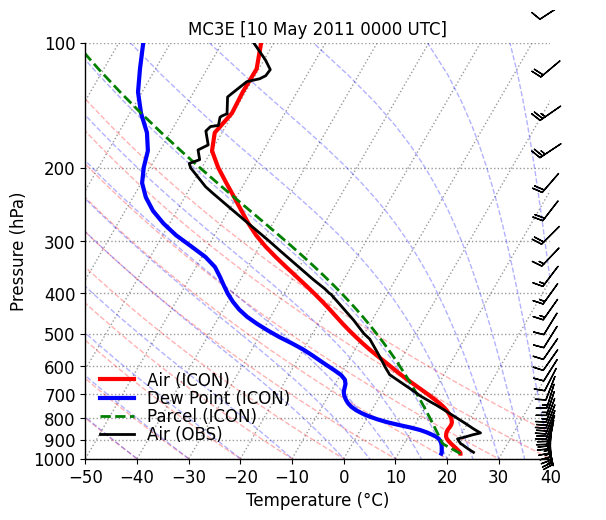

In [7]:
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from metpy.calc import parcel_profile
from metpy.calc import cape_cin



### Obs
file_path = '/work/bk1415/b382718/output/mc3e/observations/wyoming_sonde/sonde_mc3e_20110511_0000UTC'
column_names = ['pres', 'height', 'temp', 'Tdew', 'relhum', 'qv', 'w_dir', 'w_wind', 'theta', 'theta_e', 'theta_v']


# Specify invalid values (strings or other markers for missing data)
invalid_values = ['-----------------------------------------------------------------------------', '9999.0', '999.0']

# Read the data and replace invalid values with NaN
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=6, names=column_names, na_values=invalid_values)

ds_sonde.dropna(inplace=True)

temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
qv_sonde = ds_sonde.qv.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.height.values
### end obs


### ICON
ds_skewt = ds_4sip.sel(time=ds_4sip.time[0])

print(ds_4sip.time[2])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

### Parcel properties from ICON
temperature_K = (avg_tempc + 273.15) * units.K
relative_humidity = avg_rh / 100.0  # Convert to fraction

dewpoint = dewpoint_from_relative_humidity(temperature_K, relative_humidity)
avg_dewtempc = dewpoint.magnitude #- 273.15

pressure = avg_pres * units.hPa
temperature = avg_tempc * units.degC
dewpoint = avg_dewtempc * units.degC

parcel_tempk = parcel_profile(pressure, temperature[0], dewpoint[0])  # First level
parcel_tempc = parcel_tempk.magnitude-273.15

parcel_tempc = parcel_tempc * units.degC
cape, cin = cape_cin(pressure, temperature, dewpoint, parcel_tempc)

print('CAPE :: ', cape)
print('CIN :: ', cin)
### End parcel properties
### End ICON

# Create the Skew-T plot
fontsize=12;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, parcel_tempc, 'g--', label='Parcel (ICON)', linewidth=lnwdth-1)
skew.plot(pres_sonde* units.hPa, temp_sonde* units.degC, 'k-', label='Air (OBS)', linewidth=lnwdth-1)

# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 40)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('MC3E [10 May 2011 0000 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


<xarray.DataArray 'time' ()> Size: 8B
array('2011-05-11T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2011-05-11T12:00:00
Attributes:
    standard_name:  time
    axis:           T
LCL  ::  17.7471
CAPE ::  1223.5368803193596 joule / kilogram
CIN ::  -161.43810744983352 joule / kilogram


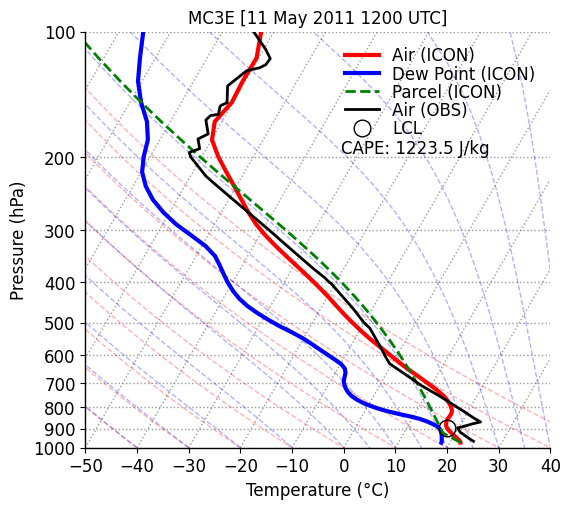

In [9]:
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from metpy.calc import parcel_profile
from metpy.calc import cape_cin



### Obs
### Obs
file_path = '/work/bk1415/b382718/output/mc3e/observations/wyoming_sonde/sonde_mc3e_20110511_0000UTC'
column_names = ['pres', 'height', 'temp', 'Tdew', 'relhum', 'qv', 'w_dir', 'w_wind', 'theta', 'theta_e', 'theta_v']


# Specify invalid values (strings or other markers for missing data)
invalid_values = ['-----------------------------------------------------------------------------', '9999.0', '999.0']

# Read the data and replace invalid values with NaN
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=6, names=column_names, na_values=invalid_values)

ds_sonde.dropna(inplace=True)

temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
qv_sonde = ds_sonde.qv.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.height.values
### end obs

### ICON
#ds_skewt = ds_4sip.sel(time=ds_4sip.time[3])
#ds_skewt = ds_4sip.sel(time=ds_4sip.time[0])
ds_skewt = ds_4sip.sel(time=ds_4sip.time[0])
print(ds_4sip.time[0])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

temp_dew = calc_dewpoint(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
#lcl_temp = calc_lcl(avg_tempc[0], avg_dewtempc)
print('LCL  :: ', lcl_temp)


### Parcel properties from ICON
temperature_K = (avg_tempc + 273.15) * units.K
relative_humidity = avg_rh / 100.0  # Convert to fraction

dewpoint = dewpoint_from_relative_humidity(temperature_K, relative_humidity)
avg_dewtempc = dewpoint.magnitude #- 273.15

pressure = avg_pres * units.hPa
temperature = avg_tempc * units.degC
dewpoint = avg_dewtempc * units.degC

parcel_tempk = parcel_profile(pressure, temperature[0], dewpoint[0])  # First level
parcel_tempc = parcel_tempk.magnitude-273.15

parcel_tempc = parcel_tempc * units.degC
cape, cin = cape_cin(pressure, temperature, dewpoint, parcel_tempc)

#----- Calculate parcel properties

print('CAPE :: ', cape)
print('CIN :: ', cin)
### End parcel properties
### End ICON

# Create the Skew-T plot
fontsize=12;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, parcel_tempc, 'g--', label='Parcel (ICON)', linewidth=lnwdth-1)
skew.plot(pres_sonde* units.hPa, temp_sonde* units.degC, 'k-', label='Air (OBS)', linewidth=lnwdth-1)

skew.plot(lcl_pressure, lcl_temp, 'ko', markerfacecolor='none', markersize=12, label='LCL')

# Add wind barbs 
#if 'u' in ds_skewt and 'v' in ds_skewt:
#    u_wind = avg_u  # Zonal wind component
#    v_wind = avg_v  # Meridional wind component
#    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 40)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

#ax.text(0.02, 0.95, f'CAPE: {cape.m:.1f} J/kg\nCIN: {cin.m:.1f} J/kg', transform=ax.transAxes, fontsize=fontsize, verticalalignment='top')
ax.text(0.55, 0.74, f'CAPE: {cape.m:.1f} J/kg', transform=ax.transAxes, fontsize=fontsize, verticalalignment='top')

plt.title('MC3E [11 May 2011 1200 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


In [38]:


file_path='/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat'
#ds_philds_int_ccn = xr.open_mfdataset(f'{file_path}/ds_check_new_start_time/mc3e_2mom_sip/NWP_*2011051*.nc');
ds_philds_debug = xr.open_mfdataset(f'{file_path}/ds_phil_debug/mc3e_2mom_sip/NWP_*2011051*.nc');
#ds_nosip_int_ccn = xr.open_mfdataset(f'{file_path}/new_start_time_nosip/mc3e_2mom_sip/NWP_*2011051*.nc');
ds_sullds_int_ccn = xr.open_mfdataset(f'{file_path}/ds_phil_debug/sull18_check/mc3e_2mom_sip/NWP_*2011051*.nc');



In [3]:

grid_mc3e = xr.open_dataset('/work/bk1415/b382718/output/mc3e/nested_run/icon_output/continental_ccn/latent_heat/control/mc3e_2mom_sip/domain4_DOM04.nc');

clon_deg = np.degrees(grid_mc3e.clon)
clat_deg = np.degrees(grid_mc3e.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

########################################################
## Get coordinates corresponding to the KAZR location ##
########################################################

okla_x, okla_y = np.array([-97.5, 36.6])
okla_x, okla_y = np.array([-97.5, 36.6])
#print(okla_x), print(okla_y)
dx_deg = 0.5; dy_deg = 0.5
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_mc3e.clat >= np.deg2rad(bottom_bound))
    & (grid_mc3e.clat <= np.deg2rad(top_bound))
    & (grid_mc3e.clon >= np.deg2rad(left_bound))
    & (grid_mc3e.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_mc3e.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
#print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_mc3e.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
#print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)


vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_mc3e = reindex_grid(grid_mc3e, selected_indices, vars_to_renumber)

mask_ncells_mc3e=np.isin(ds_philds_int_ccn['ncells'], selected_indices.cell)


-99.03552665544457
-94.96409774195314
32.964920475901934
37.03531286609763
-98.0
-97.0
37.1
36.1


In [39]:

#ds_philds_int_ccn['w_vel'] = -1.*ds_philds_int_ccn.omega/(9.8*ds_philds_int_ccn.rho)
#ds_philds_int_ccn['tempc'] = ds_philds_int_ccn.temp-273.16;
#ds_philds_int_ccn['lwc_gperm3']  = ds_philds_int_ccn.qc*ds_philds_int_ccn.rho*1.e3 # kgperm3 to gperm3
#ds_philds_int_ccn['tqi'] = ds_philds_int_ccn.qi+ds_philds_int_ccn.qs+ds_philds_int_ccn.qg+ds_philds_int_ccn.qh
#ds_philds_int_ccn['tq'] = ds_philds_int_ccn.qc+ds_philds_int_ccn.qi+ds_philds_int_ccn.qs+ds_philds_int_ccn.qg+ds_philds_int_ccn.qh
#ds_philds_int_ccn['ciwc_gperm3'] = ds_philds_int_ccn.qi*ds_philds_int_ccn.rho*1.e3 # kgperm3 to gperm3
#ds_philds_int_ccn['tiwc_gperm3'] = (ds_philds_int_ccn.qi+ds_philds_int_ccn.qs+ds_philds_int_ccn.qg+ds_philds_int_ccn.qh)*ds_philds_int_ccn.rho*1.e3 # kgperm3 to gperm3
#ds_philds_int_ccn['cdnc_percm3'] = ds_philds_int_ccn.qnc*ds_philds_int_ccn.rho*1.e-6  # perkg to percm3
#ds_philds_int_ccn['inc_perl'] = (ds_philds_int_ccn.qni+ds_philds_int_ccn.qns+ds_philds_int_ccn.qng+ds_philds_int_ccn.qnh)*ds_philds_int_ccn.rho*1.e-3 # perkg to perl

ds_philds_debug['w_vel'] = -1.*ds_philds_debug.omega/(9.8*ds_philds_debug.rho)
ds_philds_debug['tempc'] = ds_philds_debug.temp-273.16;
ds_philds_debug['lwc_gperm3']  = ds_philds_debug.qc*ds_philds_debug.rho*1.e3 # kgperm3 to gperm3
ds_philds_debug['tqi'] = ds_philds_debug.qi+ds_philds_debug.qs+ds_philds_debug.qg+ds_philds_debug.qh
ds_philds_debug['tq'] = ds_philds_debug.qc+ds_philds_debug.qi+ds_philds_debug.qs+ds_philds_debug.qg+ds_philds_debug.qh
ds_philds_debug['ciwc_gperm3'] = ds_philds_debug.qi*ds_philds_debug.rho*1.e3 # kgperm3 to gperm3
ds_philds_debug['tiwc_gperm3'] = (ds_philds_debug.qi+ds_philds_debug.qs+ds_philds_debug.qg+ds_philds_debug.qh)*ds_philds_debug.rho*1.e3 # kgperm3 to gperm3
ds_philds_debug['cdnc_percm3'] = ds_philds_debug.qnc*ds_philds_debug.rho*1.e-6  # perkg to percm3
ds_philds_debug['inc_perl'] = (ds_philds_debug.qni+ds_philds_debug.qns+ds_philds_debug.qng+ds_philds_debug.qnh)*ds_philds_debug.rho*1.e-3 # perkg to perl




#ds_nosip_int_ccn['w_vel'] = -1.*ds_nosip_int_ccn.omega/(9.8*ds_nosip_int_ccn.rho)
#ds_nosip_int_ccn['tempc'] = ds_nosip_int_ccn.temp-273.16;
#ds_nosip_int_ccn['lwc_gperm3']  = ds_nosip_int_ccn.qc*ds_nosip_int_ccn.rho*1.e3 # kgperm3 to gperm3
#ds_nosip_int_ccn['tqi'] = ds_nosip_int_ccn.qi+ds_nosip_int_ccn.qs+ds_nosip_int_ccn.qg+ds_nosip_int_ccn.qh
#ds_nosip_int_ccn['tq'] = ds_nosip_int_ccn.qc+ds_nosip_int_ccn.qi+ds_nosip_int_ccn.qs+ds_nosip_int_ccn.qg+ds_nosip_int_ccn.qh
#ds_nosip_int_ccn['ciwc_gperm3'] = ds_nosip_int_ccn.qi*ds_nosip_int_ccn.rho*1.e3 # kgperm3 to gperm3
#ds_nosip_int_ccn['tiwc_gperm3'] = (ds_nosip_int_ccn.qi+ds_nosip_int_ccn.qs+ds_nosip_int_ccn.qg+ds_nosip_int_ccn.qh)*ds_nosip_int_ccn.rho*1.e3 # kgperm3 to gperm3
#ds_nosip_int_ccn['cdnc_percm3'] = ds_nosip_int_ccn.qnc*ds_nosip_int_ccn.rho*1.e-6  # perkg to percm3
#ds_nosip_int_ccn['inc_perl'] = (ds_nosip_int_ccn.qni+ds_nosip_int_ccn.qns+ds_nosip_int_ccn.qng+ds_nosip_int_ccn.qnh)*ds_nosip_int_ccn.rho*1.e-3 # perkg to perl


ds_sullds_int_ccn['w_vel'] = -1.*ds_sullds_int_ccn.omega/(9.8*ds_sullds_int_ccn.rho)
ds_sullds_int_ccn['tempc'] = ds_sullds_int_ccn.temp-273.16;
ds_sullds_int_ccn['lwc_gperm3']  = ds_sullds_int_ccn.qc*ds_sullds_int_ccn.rho*1.e3 # kgperm3 to gperm3
ds_sullds_int_ccn['tqi'] = ds_sullds_int_ccn.qi+ds_sullds_int_ccn.qs+ds_sullds_int_ccn.qg+ds_sullds_int_ccn.qh
ds_sullds_int_ccn['tq'] = ds_sullds_int_ccn.qc+ds_sullds_int_ccn.qi+ds_sullds_int_ccn.qs+ds_sullds_int_ccn.qg+ds_sullds_int_ccn.qh
ds_sullds_int_ccn['ciwc_gperm3'] = ds_sullds_int_ccn.qi*ds_sullds_int_ccn.rho*1.e3 # kgperm3 to gperm3
ds_sullds_int_ccn['tiwc_gperm3'] = (ds_sullds_int_ccn.qi+ds_sullds_int_ccn.qs+ds_sullds_int_ccn.qg+ds_sullds_int_ccn.qh)*ds_sullds_int_ccn.rho*1.e3 # kgperm3 to gperm3
ds_sullds_int_ccn['cdnc_percm3'] = ds_sullds_int_ccn.qnc*ds_sullds_int_ccn.rho*1.e-6  # perkg to percm3
ds_sullds_int_ccn['inc_perl'] = (ds_sullds_int_ccn.qni+ds_sullds_int_ccn.qns+ds_sullds_int_ccn.qng+ds_sullds_int_ccn.qnh)*ds_sullds_int_ccn.rho*1.e-3 # perkg to perl

#ht_avg_philds_int_ccn = 1.e-3*ds_philds_int_ccn.z_mc.mean(dim=('time','ncells'))
#tempc_avg_philds_int_ccn = ds_philds_int_ccn.tempc.mean(dim=('time','ncells'))

ht_avg_philds_debug = 1.e-3*ds_philds_debug.z_mc.mean(dim=('time','ncells'))
tempc_avg_philds_debug = ds_philds_debug.tempc.mean(dim=('time','ncells'))

#ht_avg_nosip_int_ccn = 1.e-3*ds_nosip_int_ccn.z_mc.mean(dim=('time','ncells'))
#tempc_avg_nosip_int_ccn = ds_nosip_int_ccn.tempc.mean(dim=('time','ncells'))

ht_avg_sullds_int_ccn = 1.e-3*ds_sullds_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_sullds_int_ccn = ds_sullds_int_ccn.tempc.mean(dim=('time','ncells'))

In [31]:
ds_sullds_int_ccn.inc_perl.max().values

array(51669.516, dtype=float32)

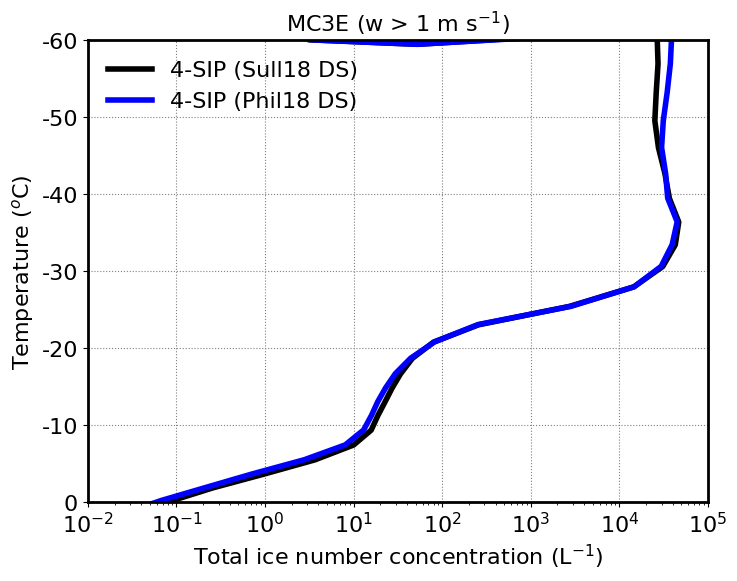

In [41]:

## ============== ICON
w_thres = 1.
thres_q = 1.e-6


#inc_philds_up_perl = xr.where((ds_philds_int_ccn.tqi > thres_q) & (ds_philds_int_ccn.w_vel > w_thres), ds_philds_int_ccn.inc_perl, np.nan)
#median_inc_philds_up_perl = inc_philds_up_perl.median(dim=('time','ncells'))
#mean_inc_philds_up_perl = inc_philds_up_perl.mean(dim=('time','ncells'))
#min_inc_philds_up_perl = inc_philds_up_perl.min(dim=('time','ncells'))
#max_inc_philds_up_perl = inc_philds_up_perl.max(dim=('time','ncells'))
#avg_tempc_philds = ds_philds_int_ccn.tempc.mean(dim=('time','ncells')) 


inc_philds_debug_up_perl = xr.where((ds_philds_debug.tqi > thres_q) & (ds_philds_debug.w_vel > w_thres), ds_philds_debug.inc_perl, np.nan)
median_inc_philds_debug_up_perl = inc_philds_debug_up_perl.median(dim=('time','ncells'))
mean_inc_philds_debug_up_perl = inc_philds_debug_up_perl.mean(dim=('time','ncells'))
min_inc_philds_debug_up_perl = inc_philds_debug_up_perl.min(dim=('time','ncells'))
max_inc_philds_debug_up_perl = inc_philds_debug_up_perl.max(dim=('time','ncells'))
avg_tempc_philds_debug = ds_philds_debug.tempc.mean(dim=('time','ncells')) 

inc_sullds_up_perl = xr.where((ds_sullds_int_ccn.tqi > thres_q) & (ds_sullds_int_ccn.w_vel > w_thres), ds_sullds_int_ccn.inc_perl, np.nan)
median_inc_sullds_up_perl = inc_sullds_up_perl.median(dim=('time','ncells'))
mean_inc_sullds_up_perl = inc_sullds_up_perl.mean(dim=('time','ncells'))
min_inc_sullds_up_perl = inc_sullds_up_perl.min(dim=('time','ncells'))
max_inc_sullds_up_perl = inc_sullds_up_perl.max(dim=('time','ncells'))
avg_tempc_sullds = ds_sullds_int_ccn.tempc.mean(dim=('time','ncells'))

#inc_nosip_up_perl = xr.where((ds_nosip_int_ccn.tqi > thres_q) & (ds_nosip_int_ccn.w_vel > w_thres), ds_nosip_int_ccn.inc_perl, np.nan)
#median_inc_nosip_up_perl = inc_nosip_up_perl.median(dim=('time','ncells'))
#mean_inc_nosip_up_perl = inc_nosip_up_perl.mean(dim=('time','ncells'))
#min_inc_nosip_up_perl = inc_nosip_up_perl.min(dim=('time','ncells'))
#max_inc_nosip_up_perl = inc_nosip_up_perl.max(dim=('time','ncells'))
#avg_tempc_nosip = ds_nosip_int_ccn.tempc.mean(dim=('time','ncells'))

fnt=16;
ln=4;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')
#ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
#ax.plot(median_inc_nosip_up_perl, avg_tempc_nosip, 'k--', linewidth=ln, label='No SIP');
ax.plot(median_inc_sullds_up_perl, avg_tempc_sullds, 'k-', linewidth=ln, label='4-SIP (Sull18 DS)');
#ax.plot(median_inc_philds_up_perl, avg_tempc_philds, 'b--', linewidth=ln, label='4-SIP (Phil18 DS, Jhet but no mass conserved)');
ax.plot(median_inc_philds_debug_up_perl, avg_tempc_philds_debug, 'b-', linewidth=ln, label='4-SIP (Phil18 DS)');


# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-2, 1.e5)
#ax.set_xticks([1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(0, -60)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([0, -10, -20, -30, -40, -50, -60])
ax.set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60'], fontsize=fnt)


ax.set_title('MC3E (w > 1 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CIP, 0.2 mm)')
obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS-v3, 0.2 mm)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles, frameon=False, loc='best', fontsize=fnt)


for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
plt.show()


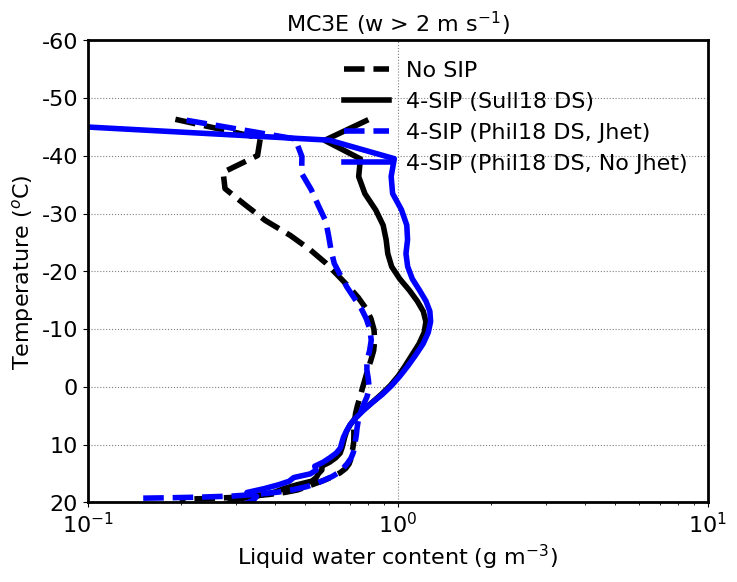

In [19]:


## ============== ICON
w_thres = 2.
thres_q = 1.e-6


qc_philds_up_perl = xr.where((ds_philds_int_ccn.qc > thres_q) & (ds_philds_int_ccn.w_vel > w_thres), ds_philds_int_ccn.lwc_gperm3, np.nan)
mean_qc_philds_up_perl = qc_philds_up_perl.mean(dim=('time','ncells'))
avg_tempc_philds = ds_philds_int_ccn.tempc.mean(dim=('time','ncells')) 


qc_philds_debug_up_perl = xr.where((ds_philds_debug.qc > thres_q) & (ds_philds_debug.w_vel > w_thres), ds_philds_debug.lwc_gperm3, np.nan)
mean_qc_philds_debug_up_perl = qc_philds_debug_up_perl.mean(dim=('time','ncells'))
avg_tempc_philds_debug = ds_philds_debug.tempc.mean(dim=('time','ncells')) 

qc_sullds_up_perl = xr.where((ds_sullds_int_ccn.qc > thres_q) & (ds_sullds_int_ccn.w_vel > w_thres), ds_sullds_int_ccn.lwc_gperm3, np.nan)
mean_qc_sullds_up_perl = qc_sullds_up_perl.mean(dim=('time','ncells'))

avg_tempc_sullds = ds_sullds_int_ccn.tempc.mean(dim=('time','ncells'))

qc_nosip_up_perl = xr.where((ds_nosip_int_ccn.qc > thres_q) & (ds_nosip_int_ccn.w_vel > w_thres), ds_nosip_int_ccn.lwc_gperm3, np.nan)
mean_qc_nosip_up_perl = qc_nosip_up_perl.mean(dim=('time','ncells'))

avg_tempc_nosip = ds_nosip_int_ccn.tempc.mean(dim=('time','ncells'))

fnt=16;
ln=4;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')
#ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
ax.plot(mean_qc_nosip_up_perl, avg_tempc_nosip, 'k--', linewidth=ln, label='No SIP');
ax.plot(mean_qc_sullds_up_perl, avg_tempc_sullds, 'k-', linewidth=ln, label='4-SIP (Sull18 DS)');
ax.plot(mean_qc_philds_up_perl, avg_tempc_philds, 'b--', linewidth=ln, label='4-SIP (Phil18 DS, Jhet)');
ax.plot(mean_qc_philds_debug_up_perl, avg_tempc_philds_debug, 'b-', linewidth=ln, label='4-SIP (Phil18 DS, No Jhet)');


# Set the scale to log for the x-axis
ax.set_xscale('log')
ax.set_xlim(1.e-1, 1.e1)
#ax.set_xticks([1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Liquid water content (g m$^{-3}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(20, -60)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])
ax.set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40', '-50', '-60'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CIP, 0.2 mm)')
obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS-v3, 0.2 mm)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles, frameon=False, loc='best', fontsize=fnt)


for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
plt.show()


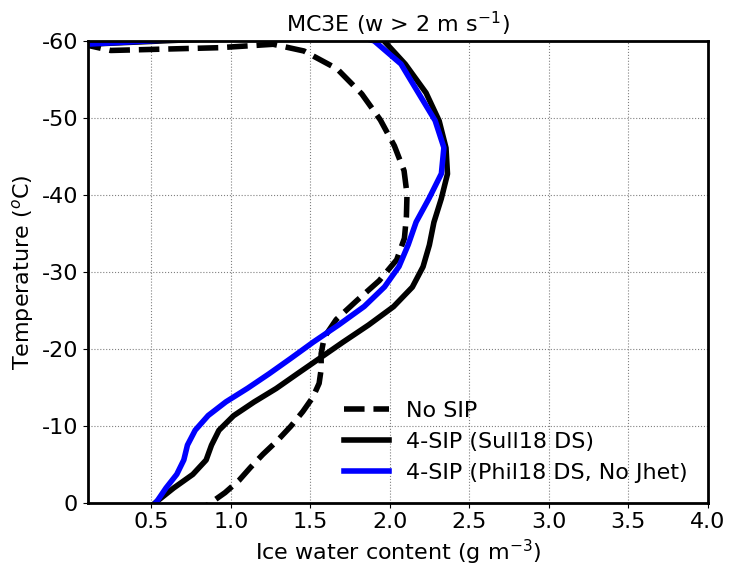

In [20]:


## ============== ICON
w_thres = 2.
thres_q = 1.e-6


iwc_philds_up_perl = xr.where((ds_philds_int_ccn.tqi > thres_q) & (ds_philds_int_ccn.w_vel > w_thres), ds_philds_int_ccn.tiwc_gperm3, np.nan)
mean_iwc_philds_up_perl = iwc_philds_up_perl.mean(dim=('time','ncells'))
avg_tempc_philds = ds_philds_int_ccn.tempc.mean(dim=('time','ncells')) 

iwc_philds_debug_up_perl = xr.where((ds_philds_debug.tqi > thres_q) & (ds_philds_debug.w_vel > w_thres), ds_philds_debug.tiwc_gperm3, np.nan)
mean_iwc_philds_debug_up_perl = iwc_philds_debug_up_perl.mean(dim=('time','ncells'))
avg_tempc_philds_debug = ds_philds_debug.tempc.mean(dim=('time','ncells')) 

iwc_sullds_up_perl = xr.where((ds_sullds_int_ccn.tqi > thres_q) & (ds_sullds_int_ccn.w_vel > w_thres), ds_sullds_int_ccn.tiwc_gperm3, np.nan)
mean_iwc_sullds_up_perl = iwc_sullds_up_perl.mean(dim=('time','ncells'))

avg_tempc_sullds = ds_sullds_int_ccn.tempc.mean(dim=('time','ncells'))

iwc_nosip_up_perl = xr.where((ds_nosip_int_ccn.tqi > thres_q) & (ds_nosip_int_ccn.w_vel > w_thres), ds_nosip_int_ccn.tiwc_gperm3, np.nan)
mean_iwc_nosip_up_perl = iwc_nosip_up_perl.mean(dim=('time','ncells'))

avg_tempc_nosip = ds_nosip_int_ccn.tempc.mean(dim=('time','ncells'))

fnt=16;
ln=4;
ln1=3;
al1=1.#0.4;
al2=1.#0.6;
al3=0.3
alpha=al2;
wd=3
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('default')
#ax.plot(min_inc_sip_up_perl, avg_tempc, 'k-.', linewidth=ln, label='ICON (Min)');
ax.plot(mean_iwc_nosip_up_perl, avg_tempc_nosip, 'k--', linewidth=ln, label='No SIP');
ax.plot(mean_iwc_sullds_up_perl, avg_tempc_sullds, 'k-', linewidth=ln, label='4-SIP (Sull18 DS)');
#ax.plot(mean_iwc_philds_up_perl, avg_tempc_philds, 'b--', linewidth=ln, label='4-SIP (Phil18 DS, Jhet)');
ax.plot(mean_iwc_philds_debug_up_perl, avg_tempc_philds_debug, 'b-', linewidth=ln, label='4-SIP (Phil18 DS, No Jhet)');


# Set the scale to log for the x-axis
#ax.set_xscale('log')
ax.set_xlim(0.1, 4)
#ax.set_xticks([1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
#ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)

ax.set_xlabel('Ice water content (g m$^{-3}$)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt)

# Set y-axis labels
ax.set_ylim(0, -60)
ax.set_ylabel('Temperature ($^{o}$C)', fontsize=fnt)
ax.set_yticks([0, -10, -20, -30, -40, -50, -60])
ax.set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60'], fontsize=fnt)


ax.set_title('MC3E (w > 2 m s$^{-1}$)', fontsize=fnt)

# Customize grid
ax.grid(True, linestyle=':', color='grey', alpha=alpha)

# Add legends for boxplots and ICON line
handles, labels = ax.get_legend_handles_labels()

obs_icon_patch = mpatches.Patch(color='black', label='ICON')
obs_cip_patch = mpatches.Patch(color='blue', label='OBS (CIP, 0.2 mm)')
obs_hvps_patch = mpatches.Patch(color='red', label='OBS (HVPS-v3, 0.2 mm)')

#ax.legend(handles=handles + [obs_icon_patch, obs_cip_patch, obs_hvps_patch], frameon=False, loc='best', fontsize=fnt)
ax.legend(handles=handles, frameon=False, loc='best', fontsize=fnt)


for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(2)
    ax.spines[spine].set_color('black')
plt.show()


In [21]:


thres_q = 1.e-16

### Phillips with Jhet
filt_dqi = xr.where((ds_philds_int_ccn.dqi_ds > thres_q), ds_philds_int_ccn.dqi_ds, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_ds > thres_q), ds_philds_int_ccn.dqni_ds, np.nan)
prc_rate_qi_phil_ds = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_ds = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_br > thres_q), ds_philds_int_ccn.dqi_br, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_br > thres_q), ds_philds_int_ccn.dqni_br, np.nan)
prc_rate_qi_phil_br = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_br = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_rs > thres_q), ds_philds_int_ccn.dqi_rs, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_rs > thres_q), ds_philds_int_ccn.dqni_rs, np.nan)
prc_rate_qi_phil_rs = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_rs = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_snow_sbf > thres_q), ds_philds_int_ccn.dqi_snow_sbf, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_snow_sbf > thres_q), ds_philds_int_ccn.dqni_snow_sbf, np.nan)
prc_rate_qi_phil_snow_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_snow_sbf = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_graup_sbf > thres_q), ds_philds_int_ccn.dqi_graup_sbf, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_graup_sbf > thres_q), ds_philds_int_ccn.dqni_graup_sbf, np.nan)
prc_rate_qi_phil_graup_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_graup_sbf = filt_dqni.mean(dim=('time','ncells'))

prc_rate_qi_phil_tot_sbf  = prc_rate_qi_phil_snow_sbf + prc_rate_qi_phil_graup_sbf
prc_rate_qni_phil_tot_sbf = prc_rate_qni_phil_snow_sbf + prc_rate_qni_phil_graup_sbf

### Phillips with Jhet
filt_dqi = xr.where((ds_philds_debug.dqi_ds > thres_q), ds_philds_debug.dqi_ds, np.nan)
filt_dqni = xr.where((ds_philds_debug.dqni_ds > thres_q), ds_philds_debug.dqni_ds, np.nan)
prc_rate_qi_phil_debug_ds = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_debug_ds = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.dqi_br > thres_q), ds_philds_debug.dqi_br, np.nan)
filt_dqni = xr.where((ds_philds_debug.dqni_br > thres_q), ds_philds_debug.dqni_br, np.nan)
prc_rate_qi_phil_debug_br = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_debug_br = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.dqi_rs > thres_q), ds_philds_debug.dqi_rs, np.nan)
filt_dqni = xr.where((ds_philds_debug.dqni_rs > thres_q), ds_philds_debug.dqni_rs, np.nan)
prc_rate_qi_phil_debug_rs = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_debug_rs = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.dqi_snow_sbf > thres_q), ds_philds_debug.dqi_snow_sbf, np.nan)
filt_dqni = xr.where((ds_philds_debug.dqni_snow_sbf > thres_q), ds_philds_debug.dqni_snow_sbf, np.nan)
prc_rate_qi_phil_debug_snow_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_debug_snow_sbf = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.dqi_graup_sbf > thres_q), ds_philds_debug.dqi_graup_sbf, np.nan)
filt_dqni = xr.where((ds_philds_debug.dqni_graup_sbf > thres_q), ds_philds_debug.dqni_graup_sbf, np.nan)
prc_rate_qi_phil_debug_graup_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_debug_graup_sbf = filt_dqni.mean(dim=('time','ncells'))

prc_rate_qi_phil_debug_tot_sbf  = prc_rate_qi_phil_debug_snow_sbf + prc_rate_qi_phil_debug_graup_sbf
prc_rate_qni_phil_debug_tot_sbf = prc_rate_qni_phil_debug_snow_sbf + prc_rate_qni_phil_debug_graup_sbf

### Sullivan


######### With Sullivan drop shattering
filt_dqi = xr.where((ds_sullds_int_ccn.dqi_ds > thres_q), ds_sullds_int_ccn.dqi_ds, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_ds > thres_q), ds_sullds_int_ccn.dqni_ds, np.nan)
prc_rate_qi_sull_ds = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_ds = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_rs > thres_q), ds_sullds_int_ccn.dqi_rs, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_rs > thres_q), ds_sullds_int_ccn.dqni_rs, np.nan)
prc_rate_qi_sull_rs = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_rs = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_br > thres_q), ds_sullds_int_ccn.dqi_br, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_br > thres_q), ds_sullds_int_ccn.dqni_br, np.nan)
prc_rate_qi_sull_br = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_br = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_snow_sbf > thres_q), ds_sullds_int_ccn.dqi_snow_sbf, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_snow_sbf > thres_q), ds_sullds_int_ccn.dqni_snow_sbf, np.nan)
prc_rate_qi_sull_snow_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_snow_sbf = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_graup_sbf > thres_q), ds_sullds_int_ccn.dqi_graup_sbf, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_graup_sbf > thres_q), ds_sullds_int_ccn.dqni_graup_sbf, np.nan)
prc_rate_qi_sull_graup_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_graup_sbf = filt_dqni.mean(dim=('time','ncells'))

prc_rate_qi_sull_tot_sbf  = prc_rate_qi_sull_snow_sbf + prc_rate_qi_sull_graup_sbf
prc_rate_qni_sull_tot_sbf = prc_rate_qni_sull_snow_sbf + prc_rate_qni_sull_graup_sbf


ht_avg_philds_debug = 1.e-3*ds_philds_debug.z_mc.mean(dim=('time','ncells'))
tempc_avg_philds_debug = ds_philds_debug.tempc.mean(dim=('time','ncells'))

ht_avg_philds_int_ccn = 1.e-3*ds_philds_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_philds_int_ccn = ds_philds_int_ccn.tempc.mean(dim=('time','ncells'))

ht_avg_nosip_int_ccn = 1.e-3*ds_nosip_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_nosip_int_ccn = ds_nosip_int_ccn.tempc.mean(dim=('time','ncells'))

ht_avg_sullds_int_ccn = 1.e-3*ds_sullds_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_sullds_int_ccn = ds_sullds_int_ccn.tempc.mean(dim=('time','ncells'))


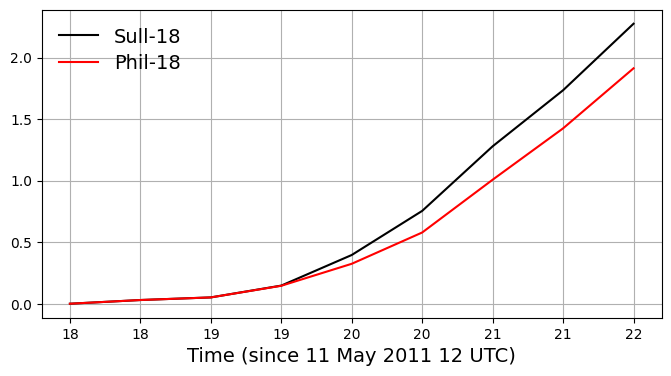

In [22]:

fnt=14;
ln=3;
alp=0.8;
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.plot(ds_sullds_int_ccn.time, ds_sullds_int_ccn.tot_prec.mean(dim=('ncells')), 'k-', label='Sull-18')
plt.plot(ds_philds_debug.time, ds_philds_debug.tot_prec.mean(dim=('ncells')), 'r-', label='Phil-18')

plt.xlabel('Time (since 11 May 2011 12 UTC)', fontsize=fnt)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 12, 0) 
end_date = datetime(2011, 5, 12, 12, 0)

plt.legend(frameon=False, handlelength=2, labelspacing=0.4, fontsize=fnt, ncols=1, loc='best')
plt.grid()
plt.show()

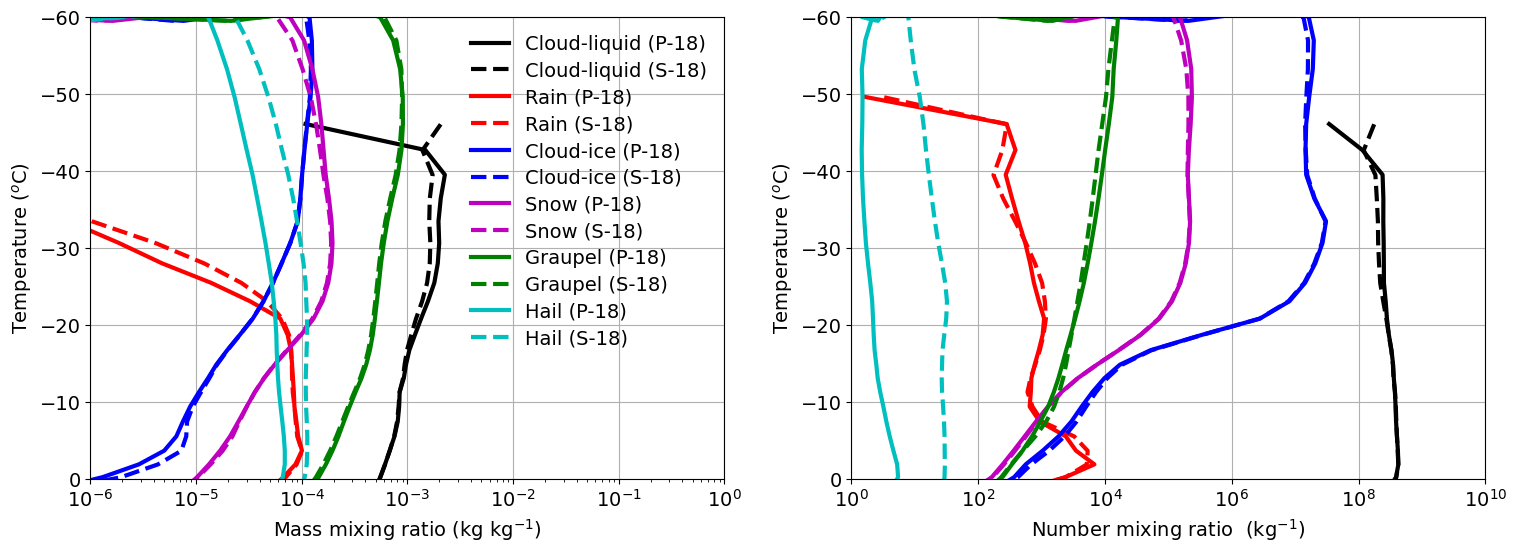

In [23]:

thres_q = 1.e-9
#####
filt_dqi = xr.where((ds_sullds_int_ccn.qc > thres_q), ds_sullds_int_ccn.qc, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.qnc > thres_q), ds_sullds_int_ccn.qnc, np.nan)
qc_sull = filt_dqi.mean(dim=('time','ncells'))
qnc_sull = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.qr > thres_q), ds_sullds_int_ccn.qr, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.qnr > thres_q), ds_sullds_int_ccn.qnr, np.nan)
qr_sull = filt_dqi.mean(dim=('time','ncells'))
qnr_sull = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.qi > thres_q), ds_sullds_int_ccn.qi, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.qni > thres_q), ds_sullds_int_ccn.qni, np.nan)
qi_sull = filt_dqi.mean(dim=('time','ncells'))
qni_sull = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.qs > thres_q), ds_sullds_int_ccn.qs, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.qns > thres_q), ds_sullds_int_ccn.qns, np.nan)
qs_sull = filt_dqi.mean(dim=('time','ncells'))
qns_sull = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.qg > thres_q), ds_sullds_int_ccn.qg, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.qng > thres_q), ds_sullds_int_ccn.qng, np.nan)
qg_sull = filt_dqi.mean(dim=('time','ncells'))
qng_sull = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.qh > thres_q), ds_sullds_int_ccn.qh, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.qnh > thres_q), ds_sullds_int_ccn.qnh, np.nan)
qh_sull = filt_dqi.mean(dim=('time','ncells'))
qnh_sull = filt_dqni.mean(dim=('time','ncells'))

#####
filt_dqi = xr.where((ds_philds_debug.qc > thres_q), ds_philds_debug.qc, np.nan)
filt_dqni = xr.where((ds_philds_debug.qnc > thres_q), ds_philds_debug.qnc, np.nan)
qc_phil_debug = filt_dqi.mean(dim=('time','ncells'))
qnc_phil_debug = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.qr > thres_q), ds_philds_debug.qr, np.nan)
filt_dqni = xr.where((ds_philds_debug.qnr > thres_q), ds_philds_debug.qnr, np.nan)
qr_phil_debug = filt_dqi.mean(dim=('time','ncells'))
qnr_phil_debug = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.qi > thres_q), ds_philds_debug.qi, np.nan)
filt_dqni = xr.where((ds_philds_debug.qni > thres_q), ds_philds_debug.qni, np.nan)
qi_phil_debug = filt_dqi.mean(dim=('time','ncells'))
qni_phil_debug = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.qs > thres_q), ds_philds_debug.qs, np.nan)
filt_dqni = xr.where((ds_philds_debug.qns > thres_q), ds_philds_debug.qns, np.nan)
qs_phil_debug = filt_dqi.mean(dim=('time','ncells'))
qns_phil_debug = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.qg > thres_q), ds_philds_debug.qg, np.nan)
filt_dqni = xr.where((ds_philds_debug.qng > thres_q), ds_philds_debug.qng, np.nan)
qg_phil_debug = filt_dqi.mean(dim=('time','ncells'))
qng_phil_debug = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_debug.qh > thres_q), ds_philds_debug.qh, np.nan)
filt_dqni = xr.where((ds_philds_debug.qnh > thres_q), ds_philds_debug.qnh, np.nan)
qh_phil_debug = filt_dqi.mean(dim=('time','ncells'))
qnh_phil_debug = filt_dqni.mean(dim=('time','ncells'))


fnt=14;
ln=3;
alp=0.8;
plt.figure(figsize=(18,6))
plt.style.use('default')

plt.subplot(1,2,1)

plt.plot(qc_phil_debug, tempc_avg_philds_debug, 'k-', linewidth=ln, label='Cloud-liquid (P-18)')
plt.plot(qc_sull, tempc_avg_sullds_int_ccn, 'k--', linewidth=ln, label='Cloud-liquid (S-18)')

plt.plot(qr_phil_debug, tempc_avg_philds_debug, 'r-', linewidth=ln, label='Rain (P-18)')
plt.plot(qr_sull, tempc_avg_sullds_int_ccn, 'r--', linewidth=ln, label='Rain (S-18)')

plt.plot(qi_phil_debug, tempc_avg_philds_debug, 'b-', linewidth=ln, label='Cloud-ice (P-18)')
plt.plot(qi_sull, tempc_avg_sullds_int_ccn, 'b--', linewidth=ln, label='Cloud-ice (S-18)')

plt.plot(qs_phil_debug, tempc_avg_philds_debug, 'm-', linewidth=ln, label='Snow (P-18)')
plt.plot(qs_sull, tempc_avg_sullds_int_ccn, 'm--', linewidth=ln, label='Snow (S-18)')

plt.plot(qg_phil_debug, tempc_avg_philds_debug, 'g-', linewidth=ln, label='Graupel (P-18)')
plt.plot(qg_sull, tempc_avg_sullds_int_ccn, 'g--', linewidth=ln, label='Graupel (S-18)')

plt.plot(qh_phil_debug, tempc_avg_philds_debug, 'c-', linewidth=ln, label='Hail (P-18)')
plt.plot(qh_sull, tempc_avg_sullds_int_ccn, 'c--', linewidth=ln, label='Hail (S-18)')

plt.xscale('log')
plt.xlim(1.e-6, 1.e0)
plt.ylim(0,-60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('Mass mixing ratio (kg kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

plt.legend(frameon=False, handlelength=2, labelspacing=0.4, fontsize=fnt, ncols=1, loc='best')
plt.grid()
#plt.title('Drop shattering', fontsize=fnt)

plt.subplot(1,2,2)

plt.plot(qnc_phil_debug, tempc_avg_philds_debug, 'k-', linewidth=ln, label='Cloud-liquid (P-18)')
plt.plot(qnc_sull, tempc_avg_sullds_int_ccn, 'k--', linewidth=ln, label='Cloud-liquid (S-18)')

plt.plot(qnr_phil_debug, tempc_avg_philds_debug, 'r-', linewidth=ln, label='Rain (P-18)')
plt.plot(qnr_sull, tempc_avg_sullds_int_ccn, 'r--', linewidth=ln, label='Rain (S-18)')

plt.plot(qni_phil_debug, tempc_avg_philds_debug, 'b-', linewidth=ln, label='Cloud-ice (P-18)')
plt.plot(qni_sull, tempc_avg_sullds_int_ccn, 'b--', linewidth=ln, label='Cloud-ice (S-18)')

plt.plot(qns_phil_debug, tempc_avg_philds_debug, 'm-', linewidth=ln, label='Snow (P-18)')
plt.plot(qns_sull, tempc_avg_sullds_int_ccn, 'm--', linewidth=ln, label='Snow (S-18)')

plt.plot(qng_phil_debug, tempc_avg_philds_debug, 'g-', linewidth=ln, label='Graupel (P-18)')
plt.plot(qng_sull, tempc_avg_sullds_int_ccn, 'g--', linewidth=ln, label='Graupel (S-18)')

plt.plot(qnh_phil_debug, tempc_avg_philds_debug, 'c-', linewidth=ln, label='Hail (P-18)')
plt.plot(qnh_sull, tempc_avg_sullds_int_ccn, 'c--', linewidth=ln, label='Hail (S-18)')

plt.xscale('log')
plt.xlim(1.e0, 1.e10)
plt.ylim(0,-60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('Number mixing ratio  (kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

#plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fnt, ncols=1, loc='best')
plt.grid()
#plt.title('Drop shattering', fontsize=fnt)

plt.show()

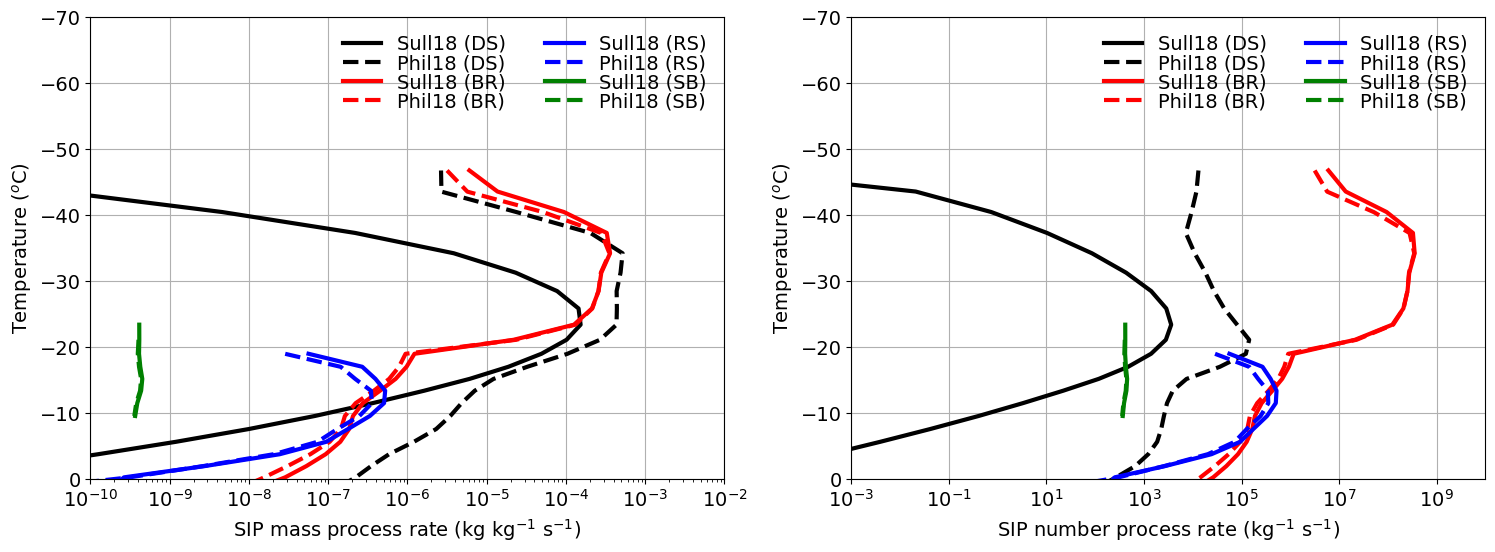

In [30]:

prc_rate_qi_sull_br = xr.where(tempc_avg_sullds_int_ccn > -50., prc_rate_qi_sull_br, np.nan)
prc_rate_qi_phil_debug_br = xr.where(tempc_avg_philds_debug > -50., prc_rate_qi_phil_debug_br, np.nan)

prc_rate_qni_sull_br = xr.where(tempc_avg_sullds_int_ccn > -50., prc_rate_qni_sull_br, np.nan)
prc_rate_qni_phil_debug_br = xr.where(tempc_avg_philds_debug > -50., prc_rate_qni_phil_debug_br, np.nan)

fnt=14;
ln=3;
alp=0.8;
plt.figure(figsize=(18,6))
plt.style.use('default')

plt.subplot(1,2,1)
plt.plot(prc_rate_qi_sull_ds, tempc_avg_sullds_int_ccn, 'k-', linewidth=ln, label='Sull18 (DS)')
plt.plot(prc_rate_qi_phil_debug_ds, tempc_avg_philds_debug, 'k--', linewidth=ln, label='Phil18 (DS)')

plt.plot(prc_rate_qi_sull_br, tempc_avg_sullds_int_ccn, 'r-', linewidth=ln, label='Sull18 (BR)')
plt.plot(prc_rate_qi_phil_debug_br, tempc_avg_philds_debug, 'r--', linewidth=ln, label='Phil18 (BR)')

plt.plot(prc_rate_qi_sull_rs, tempc_avg_sullds_int_ccn, 'b-', linewidth=ln, label='Sull18 (RS)')
plt.plot(prc_rate_qi_phil_debug_rs, tempc_avg_philds_debug, 'b--', linewidth=ln, label='Phil18 (RS)')

plt.plot(prc_rate_qi_sull_tot_sbf, tempc_avg_sullds_int_ccn, 'g-', linewidth=ln, label='Sull18 (SB)')
plt.plot(prc_rate_qi_phil_debug_tot_sbf, tempc_avg_philds_debug, 'g--', linewidth=ln, label='Phil18 (SB)')

plt.xscale('log')
plt.xlim(1.e-10, 1.e-2)
plt.ylim(0,-70)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP mass process rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fnt, ncols=2, loc='best')
plt.grid()
#plt.title('Drop shattering', fontsize=fnt)

plt.subplot(1,2,2)
plt.plot(prc_rate_qni_sull_ds, tempc_avg_sullds_int_ccn, 'k-', linewidth=ln, label='Sull18 (DS)')
plt.plot(prc_rate_qni_phil_debug_ds, tempc_avg_philds_debug, 'k--', linewidth=ln, label='Phil18 (DS)')

plt.plot(prc_rate_qni_sull_br, tempc_avg_sullds_int_ccn, 'r-', linewidth=ln, label='Sull18 (BR)')
plt.plot(prc_rate_qni_phil_debug_br, tempc_avg_philds_debug, 'r--', linewidth=ln, label='Phil18 (BR)')

plt.plot(prc_rate_qni_sull_rs, tempc_avg_sullds_int_ccn, 'b-', linewidth=ln, label='Sull18 (RS)')
plt.plot(prc_rate_qni_phil_debug_rs, tempc_avg_philds_debug, 'b--', linewidth=ln, label='Phil18 (RS)')

plt.plot(prc_rate_qni_sull_tot_sbf, tempc_avg_sullds_int_ccn, 'g-', linewidth=ln, label='Sull18 (SB)')
plt.plot(prc_rate_qni_phil_debug_tot_sbf, tempc_avg_philds_debug, 'g--', linewidth=ln, label='Phil18 (SB)')

plt.xscale('log')
plt.xlim(1.e-3, 1.e10)
plt.ylim(0,-70)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP number process rate (kg$^{-1}$ s$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fnt, ncols=2, loc='best')
plt.grid()
#plt.title('Drop shattering', fontsize=fnt)

plt.show()

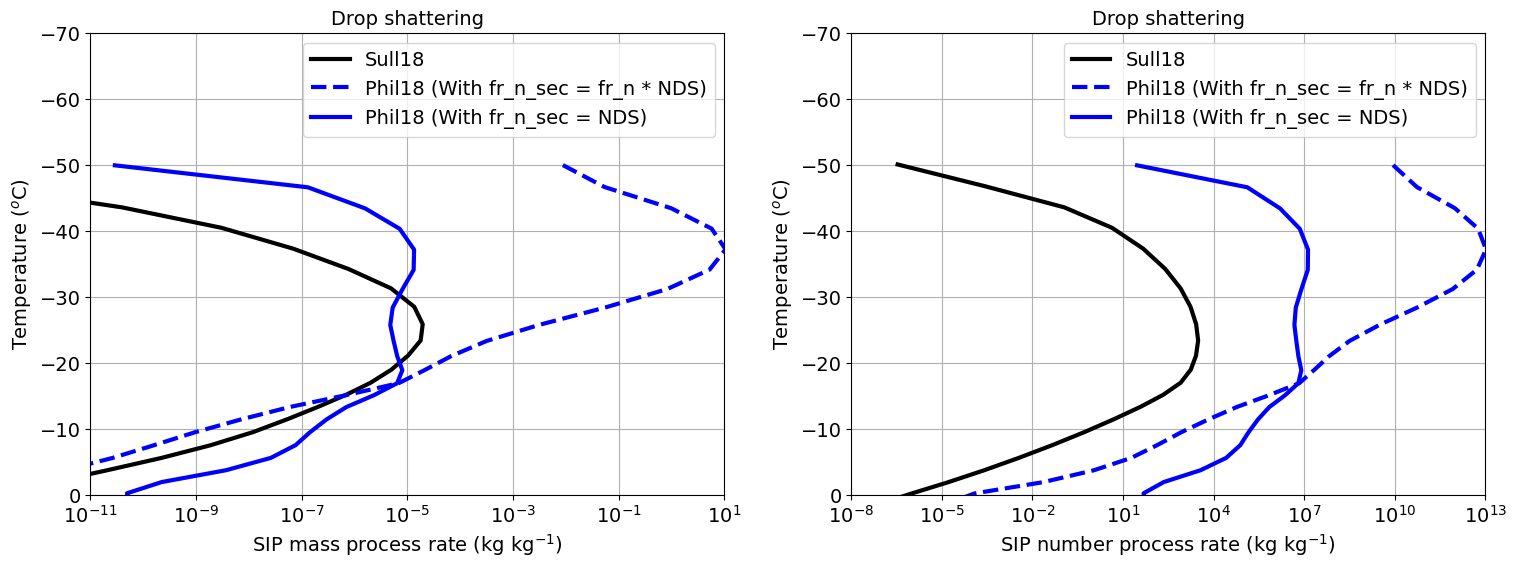

In [26]:



fnt=14;
ln=3;
alp=0.8;
plt.figure(figsize=(18,6))
plt.style.use('default')

plt.subplot(1,2,1)
plt.plot(prc_rate_qi_sull_ds, tempc_avg_sullds_int_ccn, 'k-', linewidth=ln, label='Sull18')
plt.plot(prc_rate_qi_phil_ds, tempc_avg_philds_int_ccn, 'b--', linewidth=ln, label='Phil18 (With fr_n_sec = fr_n * NDS)')
plt.plot(prc_rate_qi_phil_debug_ds, tempc_avg_philds_debug, 'b-', linewidth=ln, label='Phil18 (With fr_n_sec = NDS)')

plt.xscale('log')
plt.xlim(1.e-11, 1.e1)
plt.ylim(0,-70)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP mass process rate (kg kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)
plt.legend(fontsize=fnt)
plt.grid()
plt.title('Drop shattering', fontsize=fnt)

plt.subplot(1,2,2)
plt.plot(prc_rate_qni_sull_ds, tempc_avg_sullds_int_ccn, 'k-', linewidth=ln, label='Sull18')
plt.plot(prc_rate_qni_phil_ds, tempc_avg_philds_int_ccn, 'b--', linewidth=ln, label='Phil18 (With fr_n_sec = fr_n * NDS)')
plt.plot(prc_rate_qni_phil_debug_ds, tempc_avg_philds_debug, 'b-', linewidth=ln, label='Phil18 (With fr_n_sec = NDS)')

plt.xscale('log')
plt.xlim(1.e-8, 1.e13)
plt.ylim(0,-70)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP number process rate (kg kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)
plt.legend(fontsize=fnt)
plt.grid()
plt.title('Drop shattering', fontsize=fnt)

plt.show()

In [28]:

thres_q = 1.e-16

######### With Phillips drop shattering
filt_dqi = xr.where((ds_philds_int_ccn.dqi_ds > thres_q), ds_philds_int_ccn.dqi_ds, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_ds > thres_q), ds_philds_int_ccn.dqni_ds, np.nan)
prc_rate_qi_phil_ds = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_ds = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_rs > thres_q), ds_philds_int_ccn.dqi_rs, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_rs > thres_q), ds_philds_int_ccn.dqni_rs, np.nan)
prc_rate_qi_phil_rs = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_rs = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_br > thres_q), ds_philds_int_ccn.dqi_br, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_br > thres_q), ds_philds_int_ccn.dqni_br, np.nan)
prc_rate_qi_phil_br = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_br = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_snow_sbf > thres_q), ds_philds_int_ccn.dqi_snow_sbf, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_snow_sbf > thres_q), ds_philds_int_ccn.dqni_snow_sbf, np.nan)
prc_rate_qi_phil_snow_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_snow_sbf = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_philds_int_ccn.dqi_graup_sbf > thres_q), ds_philds_int_ccn.dqi_graup_sbf, np.nan)
filt_dqni = xr.where((ds_philds_int_ccn.dqni_graup_sbf > thres_q), ds_philds_int_ccn.dqni_graup_sbf, np.nan)
prc_rate_qi_phil_graup_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_phil_graup_sbf = filt_dqni.mean(dim=('time','ncells'))

prc_rate_qi_phil_tot_sbf  = prc_rate_qi_phil_snow_sbf + prc_rate_qi_phil_graup_sbf
prc_rate_qni_phil_tot_sbf = prc_rate_qni_phil_snow_sbf + prc_rate_qni_phil_graup_sbf



######### With Sullivan drop shattering
filt_dqi = xr.where((ds_sullds_int_ccn.dqi_ds > thres_q), ds_sullds_int_ccn.dqi_ds, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_ds > thres_q), ds_sullds_int_ccn.dqni_ds, np.nan)
prc_rate_qi_sull_ds = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_ds = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_rs > thres_q), ds_sullds_int_ccn.dqi_rs, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_rs > thres_q), ds_sullds_int_ccn.dqni_rs, np.nan)
prc_rate_qi_sull_rs = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_rs = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_br > thres_q), ds_sullds_int_ccn.dqi_br, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_br > thres_q), ds_sullds_int_ccn.dqni_br, np.nan)
prc_rate_qi_sull_br = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_br = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_snow_sbf > thres_q), ds_sullds_int_ccn.dqi_snow_sbf, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_snow_sbf > thres_q), ds_sullds_int_ccn.dqni_snow_sbf, np.nan)
prc_rate_qi_sull_snow_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_snow_sbf = filt_dqni.mean(dim=('time','ncells'))

filt_dqi = xr.where((ds_sullds_int_ccn.dqi_graup_sbf > thres_q), ds_sullds_int_ccn.dqi_graup_sbf, np.nan)
filt_dqni = xr.where((ds_sullds_int_ccn.dqni_graup_sbf > thres_q), ds_sullds_int_ccn.dqni_graup_sbf, np.nan)
prc_rate_qi_sull_graup_sbf = filt_dqi.mean(dim=('time','ncells'))
prc_rate_qni_sull_graup_sbf = filt_dqni.mean(dim=('time','ncells'))

prc_rate_qi_sull_tot_sbf  = prc_rate_qi_sull_snow_sbf + prc_rate_qi_sull_graup_sbf
prc_rate_qni_sull_tot_sbf = prc_rate_qni_sull_snow_sbf + prc_rate_qni_sull_graup_sbf


ht_avg_philds_int_ccn = 1.e-3*ds_philds_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_philds_int_ccn = ds_philds_int_ccn.tempc.mean(dim=('time','ncells'))

ht_avg_nosip_int_ccn = 1.e-3*ds_nosip_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_nosip_int_ccn = ds_nosip_int_ccn.tempc.mean(dim=('time','ncells'))

ht_avg_sullds_int_ccn = 1.e-3*ds_sullds_int_ccn.z_mc.mean(dim=('time','ncells'))
tempc_avg_sullds_int_ccn = ds_sullds_int_ccn.tempc.mean(dim=('time','ncells'))

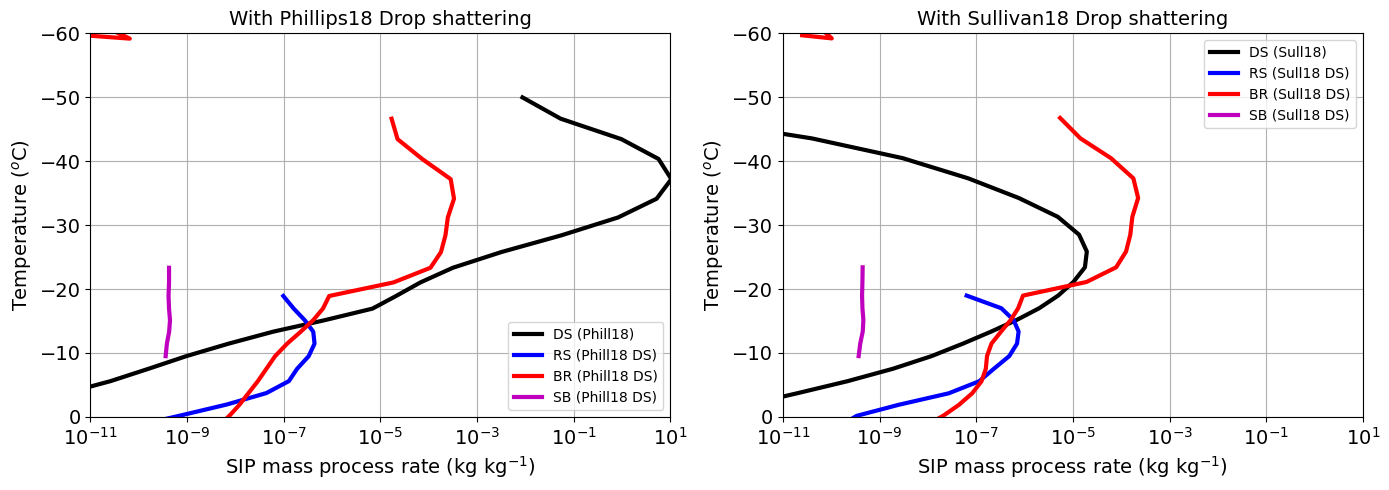

In [40]:

fnt=14;
ln=3;
alp=0.8;

plt.figure(figsize=(14,5))
plt.style.use('default')

plt.subplot(1,2,1)
plt.plot(prc_rate_qi_phil_ds, tempc_avg_philds_int_ccn, 'k-', linewidth=ln, label='DS (Phill18)')
plt.plot(prc_rate_qi_phil_rs, tempc_avg_philds_int_ccn, 'b-', linewidth=ln, label='RS (Phill18 DS)')
plt.plot(prc_rate_qi_phil_br, tempc_avg_philds_int_ccn, 'r-', linewidth=ln, label='BR (Phill18 DS)')
plt.plot(prc_rate_qi_phil_tot_sbf, tempc_avg_philds_int_ccn, 'm-', linewidth=ln, label='SB (Phill18 DS)')

plt.xscale('log')
plt.xlim(1.e-11, 1.e1)
plt.ylim(0,-60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP mass process rate (kg kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)
plt.legend()
plt.grid()
plt.title('With Phillips18 Drop shattering', fontsize=fnt)

plt.subplot(1,2,2)
plt.plot(prc_rate_qi_sull_ds, tempc_avg_sullds_int_ccn, 'k-', linewidth=ln, label='DS (Sull18)')
plt.plot(prc_rate_qi_sull_rs, tempc_avg_sullds_int_ccn, 'b-', linewidth=ln, label='RS (Sull18 DS)')
plt.plot(prc_rate_qi_sull_br, tempc_avg_sullds_int_ccn, 'r-', linewidth=ln, label='BR (Sull18 DS)')
plt.plot(prc_rate_qi_sull_tot_sbf, tempc_avg_sullds_int_ccn, 'm-', linewidth=ln, label='SB (Sull18 DS)')

plt.xscale('log')
plt.xlim(1.e-11, 1.e1)
plt.ylim(0,-60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP mass process rate (kg kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

plt.legend()
plt.grid()
plt.title('With Sullivan18 Drop shattering', fontsize=fnt)

plt.tight_layout()
plt.show()

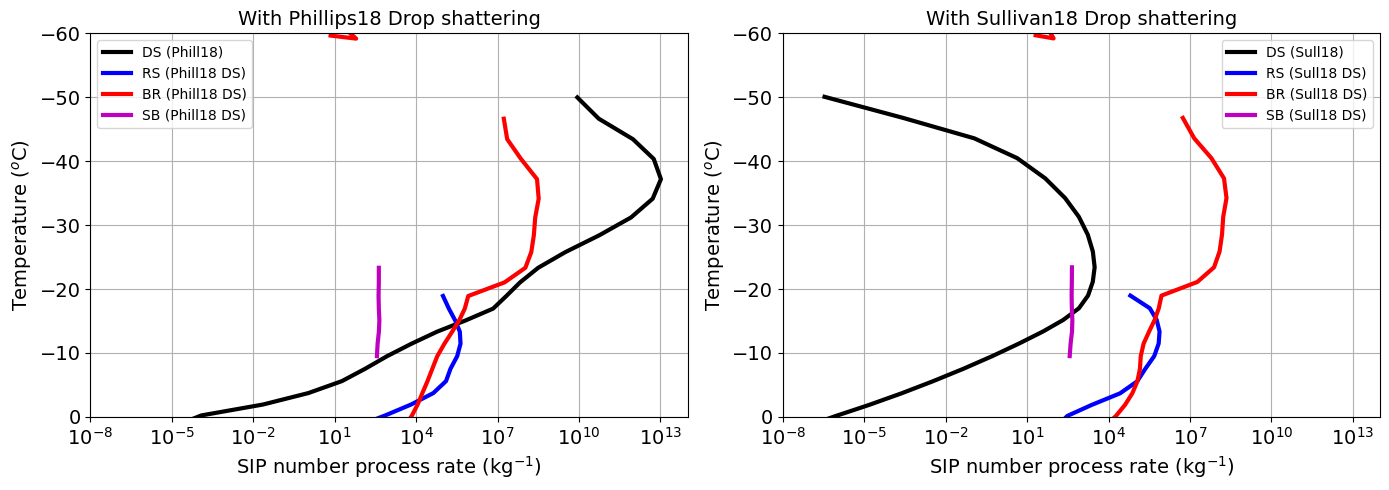

In [43]:

fnt=14;
ln=3;
alp=0.8;

plt.figure(figsize=(14,5))
plt.style.use('default')

plt.subplot(1,2,1)
plt.plot(prc_rate_qni_phil_ds, tempc_avg_philds_int_ccn, 'k-', linewidth=ln, label='DS (Phill18)')
plt.plot(prc_rate_qni_phil_rs, tempc_avg_philds_int_ccn, 'b-', linewidth=ln, label='RS (Phill18 DS)')
plt.plot(prc_rate_qni_phil_br, tempc_avg_philds_int_ccn, 'r-', linewidth=ln, label='BR (Phill18 DS)')
plt.plot(prc_rate_qni_phil_tot_sbf, tempc_avg_philds_int_ccn, 'm-', linewidth=ln, label='SB (Phill18 DS)')

plt.xscale('log')
plt.xlim(1.e-8, 1.e14)
plt.ylim(0,-60)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP number process rate (kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

plt.legend()
plt.grid()
plt.title('With Phillips18 Drop shattering', fontsize=fnt)

plt.subplot(1,2,2)
plt.plot(prc_rate_qni_sull_ds, tempc_avg_sullds_int_ccn, 'k-', linewidth=ln, label='DS (Sull18)')
plt.plot(prc_rate_qni_sull_rs, tempc_avg_sullds_int_ccn, 'b-', linewidth=ln, label='RS (Sull18 DS)')
plt.plot(prc_rate_qni_sull_br, tempc_avg_sullds_int_ccn, 'r-', linewidth=ln, label='BR (Sull18 DS)')
plt.plot(prc_rate_qni_sull_tot_sbf, tempc_avg_sullds_int_ccn, 'm-', linewidth=ln, label='SB (Sull18 DS)')

plt.xscale('log')
plt.xlim(1.e-8, 1.e14)
plt.ylim(0,-60)

plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)

plt.xlabel('SIP number process rate (kg$^{-1}$)', fontsize=fnt)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fnt)

plt.legend()
plt.grid()
plt.title('With Sullivan18 Drop shattering', fontsize=fnt)


plt.tight_layout()
plt.show()